# 1Ìñâ1Ïú†Ï†Ä Î≥ÄÌôò

### ability
- Î≥¥Ïä§ ÌÇ§ÏõåÎìú Ìè¨Ìï® ÌîÑÎ¶¨ÏÖã ÏÑ†ÌÉù

In [ ]:
import pandas as pd

# ability ÌååÏùº Î°úÎìú
ability = pd.read_csv('/content/drive/MyDrive/data/merged/ability_merged.csv')

# Î†àÏ†ÑÎìúÎ¶¨ > Ïú†ÎãàÌÅ¨ Îì±Í∏âÎßå ÌïÑÌÑ∞
ability = ability[ability['preset_grade'].isin(['Î†àÏ†ÑÎìúÎ¶¨', 'Ïú†ÎãàÌÅ¨'])].copy()

# Í∏∞Ï§Ä Ïª¨Îüº
group_keys = ['nickname', 'world', 'level', 'job_group', 'job', 'subclass']

# Ïö∞ÏÑ†ÏàúÏúÑ Îß§Í∏∞Í∏∞ (Î†àÏ†ÑÎìúÎ¶¨ > Ïú†ÎãàÌÅ¨)
grade_priority = {'Î†àÏ†ÑÎìúÎ¶¨': 1, 'Ïú†ÎãàÌÅ¨': 2}
ability['grade_priority'] = ability['ability_grade'].map(grade_priority)

# 1. Î≥¥Í≥µ ÌÇ§ÏõåÎìú Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞
boss_keyword = 'Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ'
has_boss = ability['ability_value'].str.contains(boss_keyword, na=False)

# 2. Î≥¥Í≥µÏù¥ Ìè¨Ìï®Îêú presetÎßå Í≥®ÎùºÎÉÑ
boss_preset = (
    ability[has_boss]
    .sort_values(group_keys + ['grade_priority'])
    .drop_duplicates(subset=group_keys, keep='first')
)

# 3. Î≥¥Í≥µÏù¥ ÏûàÎäî Í≤ΩÏö∞: Í∑∏ presetÎßå Ïú†ÏßÄ
keep_presets_boss = boss_preset[group_keys + ['preset_number']]

# 4. Î≥¥Í≥µÏù¥ ÏïÑÏòà ÏóÜÎäî Ïú†Ï†Ä Ï∞æÍ∏∞
all_users = ability[group_keys].drop_duplicates()
users_with_boss = keep_presets_boss[group_keys].drop_duplicates()

# Î≥¥Í≥µ ÏóÜÎäî Ïú†Ï†Ä
no_boss_users = pd.merge(all_users, users_with_boss, on=group_keys, how='left', indicator=True)
no_boss_users = no_boss_users[no_boss_users['_merge'] == 'left_only'].drop(columns=['_merge'])

# 5. Î≥¥Í≥µ ÏóÜÎäî Ïú†Ï†ÄÎäî preset_number == 1 Îßå ÎÇ®Í∏∞Í∏∞
no_boss_presets = no_boss_users.copy()
no_boss_presets['preset_number'] = 1

# 6. Î≥¥Í≥µ preset + preset1 (Î≥¥Í≥µ ÏóÜÎäî Ïú†Ï†Ä) Ìï©ÏπòÍ∏∞
final_keep_presets = pd.concat([keep_presets_boss, no_boss_presets], ignore_index=True)

# 7. ability Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ (inner join Î∞©Ïãù)
ability_filtered = pd.merge(ability, final_keep_presets, on=group_keys + ['preset_number'], how='inner')

# ÏûÑÏãú Ïª¨Îüº ÏÇ≠Ï†ú
ability_filtered = ability_filtered.drop(columns=['grade_priority'])

In [ ]:
ability_filtered

nickname  world  level  job subclass  preset_number preset_grade  \
0           Î¨∏Ï†úÏù∏     Î£®ÎÇò    295   ÏπºÎ¶¨       ÏπºÎ¶¨              1         Î†àÏ†ÑÎìúÎ¶¨   
1           Î¨∏Ï†úÏù∏     Î£®ÎÇò    295   ÏπºÎ¶¨       ÏπºÎ¶¨              1         Î†àÏ†ÑÎìúÎ¶¨   
2           Î¨∏Ï†úÏù∏     Î£®ÎÇò    295   ÏπºÎ¶¨       ÏπºÎ¶¨              1         Î†àÏ†ÑÎìúÎ¶¨   
3            ÏπºÎ¶¨    ÌÅ¨Î°úÏïÑ    295   ÏπºÎ¶¨       ÏπºÎ¶¨              1         Î†àÏ†ÑÎìúÎ¶¨   
4            ÏπºÎ¶¨    ÌÅ¨Î°úÏïÑ    295   ÏπºÎ¶¨       ÏπºÎ¶¨              1         Î†àÏ†ÑÎìúÎ¶¨   
...         ...    ...    ...  ...      ...            ...          ...   
137836    Í≥∞ÌÉ±Ïù¥Ïπ¥Ïù¥     Î£®ÎÇò    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä              1         Î†àÏ†ÑÎìúÎ¶¨   
137837    Í≥∞ÌÉ±Ïù¥Ïπ¥Ïù¥     Î£®ÎÇò    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä              1         Î†àÏ†ÑÎìúÎ¶¨   
137838      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä              1         Î†àÏ†ÑÎìúÎ¶¨   
137839      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä              1         Î†àÏ†ÑÎìúÎ¶¨   
137840      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä              1         Î†àÏ†ÑÎìúÎ¶¨   

        ability_no ability_grade                  ability_value job_group  
0                1          Î†àÏ†ÑÎìúÎ¶¨  Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 20% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
1                2           Ïú†ÎãàÌÅ¨         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
2                3           Ïú†ÎãàÌÅ¨    ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
3                1          Î†àÏ†ÑÎìúÎ¶¨  Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 20% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
4                2           Ïú†ÎãàÌÅ¨         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
...            ...           ...                            ...       ...  
137836           2           Ïú†ÎãàÌÅ¨            Î≤ÑÌîÑ Ïä§ÌÇ¨Ïùò ÏßÄÏÜç ÏãúÍ∞Ñ 38% Ï¶ùÍ∞Ä     ·Ñå·Ö•·Ü´·Ñâ·Ö°  
137837           3           Ïú†ÎãàÌÅ¨    ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 7% Ï¶ùÍ∞Ä     ·Ñå·Ö•·Ü´·Ñâ·Ö°  
137838           1          Î†àÏ†ÑÎìúÎ¶¨  Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 20% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©     ·Ñå·Ö•·Ü´·Ñâ·Ö°  
137839           3           Ïú†ÎãàÌÅ¨         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä     ·Ñå·Ö•·Ü´·Ñâ·Ö°  
137840           2            ÏóêÌîΩ            Î≤ÑÌîÑ Ïä§ÌÇ¨Ïùò ÏßÄÏÜç ÏãúÍ∞Ñ 20% Ï¶ùÍ∞Ä     ·Ñå·Ö•·Ü´·Ñâ·Ö°  

[137841 rows x 11 columns]

In [ ]:
# ability_filteredÏóêÏÑú Í≥†Ïú† nickname Ïàò ÏÑ∏Í∏∞
unique_nickname_count = ability_filtered['nickname'].nunique()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ability_filteredÏóêÏÑú Í≥†Ïú† nickname Ïàò: {unique_nickname_count}Î™Ö")

ability_filteredÏóêÏÑú Í≥†Ïú† nickname Ïàò: 45947Î™Ö


In [ ]:
# Ïñ¥ÎπåÎ¶¨Ìã∞ Î≥ÄÌôò (ability_value 3Í∞úÎ•º ability1~3Î°ú Î≥ÄÌôò)
ability_filtered['ability_no'] = ability_filtered.groupby(group_keys).cumcount() + 1
ability_filtered = ability_filtered[ability_filtered['ability_no'] <= 3]
ability_pivot = ability_filtered.pivot(index=group_keys, columns='ability_no', values='ability_value')
ability_pivot.columns = [f'ability{i}' for i in ability_pivot.columns]
ability_pivot = ability_pivot.reset_index()

ability_pivot

nickname world  level job_group    job    subclass  \
0         0005   ÌÅ¨Î°úÏïÑ    288     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
1       002Î≤àÏ∂úÍµ¨  ÏóòÎ¶¨ÏãúÏõÄ    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å       Ï∫êÎÖºÎßàÏä§ÌÑ∞   
2          00Ïö∞   ÌÅ¨Î°úÏïÑ    288     ·Ñå·Ö•·Ü´·Ñâ·Ö°    Ï¥àÏõîÏûê          Ï†úÎ°ú   
3      00Ïö∞Ï¶àÌÇ§00  Ïù¥ÎÖ∏ÏãúÏä§    276     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§       ÏôÄÏùºÎìúÌóåÌÑ∞   
4         0101   ÌÅ¨Î°úÏïÑ    277     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§       ÏôÄÏùºÎìúÌóåÌÑ∞   
...        ...   ...    ...       ...    ...         ...   
45942       ÌûùÏßú  Ïä§Ïπ¥ÎãàÏïÑ    292     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
45943       ÌûùÏ±®    Î£®ÎÇò    291     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§      Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥   
45944       ÌûùÌë∏    Î≤†Îùº    287     ·ÑÉ·Ö©·Ñå·Ö•·Ü®     Ìò∏ÏòÅ          Ìò∏ÏòÅ   
45945       ÌûùÌíã   Ïò§Î°úÎùº    286     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§       Îç∞Î™¨Ïñ¥Î≤§Ï†∏   
45946       ÌûùÌûù  Ïä§Ïπ¥ÎãàÏïÑ    290   ·ÑÜ·Ö°·Ñá·Ö•·Ü∏·Ñâ·Ö°    ÎßàÎ≤ïÏÇ¨  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Î∂à,ÎèÖ)   

                                        ability1                     ability2  \
0                         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 20% Ï¶ùÍ∞Ä  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä   
1                         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 20% Ï¶ùÍ∞Ä          Î≤ÑÌîÑ Ïä§ÌÇ¨Ïùò ÏßÄÏÜç ÏãúÍ∞Ñ 34% Ï¶ùÍ∞Ä   
2                         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 20% Ï¶ùÍ∞Ä                    Í≥µÍ≤©Î†• 21 Ï¶ùÍ∞Ä   
3                         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 16% Ï¶ùÍ∞Ä  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 5% Ï¶ùÍ∞Ä   
4                         Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 20% Ï¶ùÍ∞Ä               ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† 16% Ï¶ùÍ∞Ä   
...                                          ...                          ...   
45942              Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 19% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©        Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 9% Ï¶ùÍ∞Ä   
45943              Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 20% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä   
45944  Ìå®ÏãúÎ∏å Ïä§ÌÇ¨ Î†àÎ≤®Ïù¥ 1 Ï¶ùÍ∞Ä (Ïï°Ìã∞Î∏å ÌòºÌï©Ìòï, 5Ï∞®, 6Ï∞® Ïä§ÌÇ¨ Ï†ÅÏö©ÏïàÎê®)  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä   
45945              Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú 20% ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©        Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 9% Ï¶ùÍ∞Ä   
45946                        Î≤ÑÌîÑ Ïä§ÌÇ¨Ïùò ÏßÄÏÜç ÏãúÍ∞Ñ 50% Ï¶ùÍ∞Ä  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä   

                          ability3  
0                   ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† 20% Ï¶ùÍ∞Ä  
1      ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 8% Ï¶ùÍ∞Ä  
2      ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 7% Ï¶ùÍ∞Ä  
3                    ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† 9% Ï¶ùÍ∞Ä  
4      ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 5% Ï¶ùÍ∞Ä  
...                            ...  
45942               ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† 20% Ï¶ùÍ∞Ä  
45943       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä  
45944       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä  
45945  ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 7% Ï¶ùÍ∞Ä  
45946       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ 10% Ï¶ùÍ∞Ä  

[45947 rows x 9 columns]

In [ ]:
save_path = '/content/drive/MyDrive/data/organized/ability_organized.csv'

# Ï†ÄÏû•
ability_pivot.to_csv(save_path, index=False)

print(f"ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {save_path}")

ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/data/organized/ability_organized.csv


------------------
### symbol

In [ ]:
# ÌååÏùº Î°úÎìú
symbol = pd.read_csv('/content/drive/MyDrive/data/organized/symbol_organized.csv')

In [ ]:
symbol

nickname world  level  job subclass      symbol_name  symbol_force  \
0            ÏãúÍ∞Ä   ÌÅ¨Î°úÏïÑ    296  Í∏∞ÏÇ¨Îã®    ÎÇòÏù¥Ìä∏ÏõåÏª§   ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏÜåÎ©∏Ïùò Ïó¨Î°ú           220   
1            ÏãúÍ∞Ä   ÌÅ¨Î°úÏïÑ    296  Í∏∞ÏÇ¨Îã®    ÎÇòÏù¥Ìä∏ÏõåÏª§  ÏïÑÏºÄÏù∏Ïã¨Î≥º : Ï∏ÑÏ∏Ñ ÏïÑÏùºÎûúÎìú           220   
2            ÏãúÍ∞Ä   ÌÅ¨Î°úÏïÑ    296  Í∏∞ÏÇ¨Îã®    ÎÇòÏù¥Ìä∏ÏõåÏª§      ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î†àÌó¨Î•∏           220   
3            ÏãúÍ∞Ä   ÌÅ¨Î°úÏïÑ    296  Í∏∞ÏÇ¨Îã®    ÎÇòÏù¥Ìä∏ÏõåÏª§     ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏïÑÎ•¥Ïπ¥ÎÇò           220   
4            ÏãúÍ∞Ä   ÌÅ¨Î°úÏïÑ    296  Í∏∞ÏÇ¨Îã®    ÎÇòÏù¥Ìä∏ÏõåÏª§      ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î™®ÎùºÏä§           220   
...         ...   ...    ...  ...      ...              ...           ...   
554481       Ìó§Îîî    Î£®ÎÇò    281   Ìï¥Ï†Å       Ï∫°Ìã¥     Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏÑ∏Î•¥ÎãàÏõÄ           110   
554482       Ìó§Îîî    Î£®ÎÇò    281   Ìï¥Ï†Å       Ï∫°Ìã¥     Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÅ¨Ïä§           110   
554483       Ìó§Îîî    Î£®ÎÇò    281   Ìï¥Ï†Å       Ï∫°Ìã¥      Ïñ¥ÏÑºÌã±Ïã¨Î≥º : Ïò§ÎîîÏõÄ           100   
554484       Ìó§Îîî    Î£®ÎÇò    281   Ìï¥Ï†Å       Ï∫°Ìã¥      Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÎèÑÏõêÍ≤Ω           100   
554485       Ìó§Îîî    Î£®ÎÇò    281   Ìï¥Ï†Å       Ï∫°Ìã¥    Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÖåÎ¶¨ÏïÑ            80   

        symbol_level job_group  
0                 20     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
1                 20     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
2                 20     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
3                 20     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
4                 20     ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
...              ...       ...  
554481            11     ·Ñí·Ö¢·Ñå·Ö•·Ü®  
554482            11     ·Ñí·Ö¢·Ñå·Ö•·Ü®  
554483            10     ·Ñí·Ö¢·Ñå·Ö•·Ü®  
554484            10     ·Ñí·Ö¢·Ñå·Ö•·Ü®  
554485             8     ·Ñí·Ö¢·Ñå·Ö•·Ü®  

[554486 rows x 9 columns]

In [ ]:
# Í∏∞Ï§Ä Ïª¨Îüº
group_keys = ['nickname', 'world', 'level', 'job_group', 'job', 'subclass']

# Ïã¨Î≥º Î≥ÄÌôò
symbol_pivot = symbol.pivot_table(index=group_keys, columns='symbol_name', values='symbol_level')
symbol_pivot = symbol_pivot.reset_index()

# group_keys ÏàúÏÑúÎ°ú ÏïûÏúºÎ°ú Ï†ïÎ†¨
symbol_pivot = symbol_pivot[group_keys + [col for col in symbol_pivot.columns if col not in group_keys]]

# Í≤∞Í≥º
symbol_pivot.head()

symbol_name nickname world  level job_group    job subclass  Í∑∏ÎûúÎìú Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÌÉàÎùºÌïòÌä∏  \
0               0005   ÌÅ¨Î°úÏïÑ    288     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò    Ìå®Ïä§ÌååÏù∏Îçî               NaN   
1             002Î≤àÏ∂úÍµ¨  ÏóòÎ¶¨ÏãúÏõÄ    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å    Ï∫êÎÖºÎßàÏä§ÌÑ∞               NaN   
2                00Ïö∞   ÌÅ¨Î°úÏïÑ    288     ·Ñå·Ö•·Ü´·Ñâ·Ö°    Ï¥àÏõîÏûê       Ï†úÎ°ú               NaN   
3            00Ïö∞Ï¶àÌÇ§00  Ïù¥ÎÖ∏ÏãúÏä§    276     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§    ÏôÄÏùºÎìúÌóåÌÑ∞               NaN   
4               0101   ÌÅ¨Î°úÏïÑ    277     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§    ÏôÄÏùºÎìúÌóåÌÑ∞               NaN   

symbol_name  ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î†àÌó¨Î•∏  ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î™®ÎùºÏä§  ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏÜåÎ©∏Ïùò Ïó¨Î°ú  ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏïÑÎ•¥Ïπ¥ÎÇò  \
0                   20.0         20.0            20.0          20.0   
1                   20.0         20.0            20.0          20.0   
2                   20.0         20.0            20.0          20.0   
3                   20.0         20.0            20.0          20.0   
4                   18.0         18.0            19.0          18.0   

symbol_name  ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏóêÏä§ÌéòÎùº  ÏïÑÏºÄÏù∏Ïã¨Î≥º : Ï∏ÑÏ∏Ñ ÏïÑÏùºÎûúÎìú  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÎèÑÏõêÍ≤Ω  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏÑ∏Î•¥ÎãàÏõÄ  \
0                    20.0             20.0          8.0          11.0   
1                    20.0             20.0          7.0          11.0   
2                    20.0             20.0          9.0          11.0   
3                    20.0             20.0          6.0          11.0   
4                    19.0             19.0          NaN           5.0   

symbol_name  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÅ¨Ïä§  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÖåÎ¶¨ÏïÑ  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : Ïò§ÎîîÏõÄ  Ïñ¥ÏÑºÌã±Ïã¨Î≥º : Ïπ¥Î•¥ÏãúÏò®  
0                    10.0            7.0          9.0           6.0  
1                     8.0            6.0          7.0           6.0  
2                    11.0            9.0         10.0           5.0  
3                    10.0            NaN          8.0           NaN  
4                     5.0            NaN          NaN           NaN

In [ ]:
unique_nickname_count = symbol['nickname'].nunique()
print(f"Ï¥ù Ïú†Ï†Ä: {unique_nickname_count}Î™Ö")

Ï¥ù Ïú†Ï†Ä: 45943Î™Ö


In [ ]:
save_path = '/content/drive/MyDrive/data/organized/symbol_organized.csv'

# Ï†ÄÏû•
symbol_pivot.to_csv(save_path, index=False)

print(f"ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {save_path}")

ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/data/organized/symbol_organized.csv


------------------
### hexamatrix

In [ ]:
# ÌååÏùº Î°úÎìú
hexamatrix = pd.read_csv('/content/drive/MyDrive/data/organized/hexamatrix_organized.csv')

In [ ]:
# Í∏∞Ï§Ä Ïª¨Îüº
group_keys = ['nickname', 'world', 'level', 'job_group', 'job', 'subclass']
core_types = ['Í∞ïÌôî ÏΩîÏñ¥', 'Í≥µÏö© ÏΩîÏñ¥', 'ÎßàÏä§ÌÑ∞Î¶¨ ÏΩîÏñ¥', 'Ïä§ÌÇ¨ ÏΩîÏñ¥']

# ÌäúÌîå ÏÉùÏÑ±
hexamatrix['skill_tuple'] = list(zip(hexamatrix['hexa_skill_id'], hexamatrix['hexa_core_level']))

# Í∞Å ÏΩîÏñ¥ Ïú†ÌòïÎ≥ÑÎ°ú Ïú†Ï†Ä-Ïä§ÌÇ¨ Î¶¨Ïä§Ìä∏ Íµ¨ÏÑ±
core_type_dfs = []

for core in core_types:
    temp = hexamatrix[hexamatrix['hexa_core_type'] == core].copy()
    temp_grouped = temp.groupby(group_keys)['skill_tuple'].apply(list).reset_index()
    temp_grouped.rename(columns={'skill_tuple': core}, inplace=True)
    core_type_dfs.append(temp_grouped)

# ÏàúÏ∞®Ï†ÅÏúºÎ°ú merge (outer join)
from functools import reduce
hexamatrix_merged = reduce(lambda left, right: pd.merge(left, right, on=group_keys, how='outer'), core_type_dfs)

hexamatrix_merged

nickname world  level job_group    job    subclass  \
0         0005   ÌÅ¨Î°úÏïÑ    288     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
1       002Î≤àÏ∂úÍµ¨  ÏóòÎ¶¨ÏãúÏõÄ    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å       Ï∫êÎÖºÎßàÏä§ÌÑ∞   
2          00Ïö∞   ÌÅ¨Î°úÏïÑ    288     ·Ñå·Ö•·Ü´·Ñâ·Ö°    Ï¥àÏõîÏûê          Ï†úÎ°ú   
3      00Ïö∞Ï¶àÌÇ§00  Ïù¥ÎÖ∏ÏãúÏä§    276     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§       ÏôÄÏùºÎìúÌóåÌÑ∞   
4         0101   ÌÅ¨Î°úÏïÑ    277     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§       ÏôÄÏùºÎìúÌóåÌÑ∞   
...        ...   ...    ...       ...    ...         ...   
45920       ÌûùÏßú  Ïä§Ïπ¥ÎãàÏïÑ    292     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
45921       ÌûùÏ±®    Î£®ÎÇò    291     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§      Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥   
45922       ÌûùÌë∏    Î≤†Îùº    287     ·ÑÉ·Ö©·Ñå·Ö•·Ü®     Ìò∏ÏòÅ          Ìò∏ÏòÅ   
45923       ÌûùÌíã   Ïò§Î°úÎùº    286     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§       Îç∞Î™¨Ïñ¥Î≤§Ï†∏   
45924       ÌûùÌûù  Ïä§Ïπ¥ÎãàÏïÑ    290   ·ÑÜ·Ö°·Ñá·Ö•·Ü∏·Ñâ·Ö°    ÎßàÎ≤ïÏÇ¨  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Î∂à,ÎèÖ)   

                                                   Í∞ïÌôî ÏΩîÏñ¥  \
0      [(ÏñºÌã∞Î∞ã Î∏îÎûòÏä§Ìä∏ Í∞ïÌôî, 1), (Î†àÏù¥Î∏ê ÌÖúÌéòÏä§Ìä∏/Ïù¥Î≥ºÎ∏å ÌÖúÌéòÏä§Ìä∏ Í∞ïÌôî, 3), ...   
1      [(ÎπÖ Ìú¥Ï¶à Í∏∞Í∞ÑÌã± Ï∫êÎÖºÎ≥º Í∞ïÌôî, 21), (ICBM Í∞ïÌôî, 2), (Ïä§ÌéòÏÖú Î™ΩÌÇ§ ...   
2      [(Î¶¨ÎØ∏Ìä∏ Î∏åÎ†àÏù¥ÌÅ¨ Í∞ïÌôî, 25), (Ï°∞Ïù∏Ìä∏ Ïñ¥ÌÉù Í∞ïÌôî, 10), (ÏâêÎèÑÏö∞ ÌîåÎûòÏãú ...   
3      [(Ïû¨Í∑úÏñ¥ Ïä§ÌÜ∞ Í∞ïÌôî, 4), (ÏôÄÏùºÎìú Í∑∏Î†àÎÑ§Ïù¥Îìú Í∞ïÌôî, 3), (ÏôÄÏùºÎìú Î∞úÏπ∏ Ty...   
4                                                    NaN   
...                                                  ...   
45920  [(ÏñºÌã∞Î∞ã Î∏îÎûòÏä§Ìä∏ Í∞ïÌôî, 30), (Î†àÏù¥Î∏ê ÌÖúÌéòÏä§Ìä∏/Ïù¥Î≥ºÎ∏å ÌÖúÌéòÏä§Ìä∏ Í∞ïÌôî, 30)...   
45921  [(Îç∞Î™¨ Ïñ¥Ïõ®Ïù¥ÌÅ¨Îãù Í∞ïÌôî, 30), (ÏöîÎ•¥Î¨∏Í∞ÑÎìú Í∞ïÌôî, 30), (Ïò§Î•¥Ìä∏Î°úÏä§ Í∞ïÌôî,...   
45922  [(ÏÑ†Í∏∞ : Í∑πÎåÄ Î∂ÑÏã†ÎÇúÎ¨¥ Í∞ïÌôî, 15), (Í∂åÏà† : ÏÇ∞Î†πÏÜåÌôò Í∞ïÌôî, 1), (ÏÑ†Í∏∞...   
45923  [(Îç∞Î™¨ ÌîÑÎ†åÏßÄ Í∞ïÌôî, 15), (Î∏îÎü¨Îìú ÌîºÏä§Ìä∏ Í∞ïÌôî, 1), (ÎîîÎ©òÏÖò ÏÜåÎìú Í∞ïÌôî,...   
45924  [(ÎèÑÌä∏ ÌçºÎãàÏÖî Í∞ïÌôî, 30), (Ìè¨Ïù¥Ï¶å ÎÖ∏Î∞î Í∞ïÌôî, 30), (Ìì®Î¶¨ Ïò§Î∏å Ïù¥ÌîÑÎ¶¨Ìä∏...   

                                                   Í≥µÏö© ÏΩîÏñ¥  \
0                                           [(ÏÜî ÏïºÎàÑÏä§, 1)]   
1      [(ÏÜî ÏïºÎàÑÏä§, 10), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 10), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 10)]   
2      [(ÏÜî ÏïºÎàÑÏä§, 10), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 10), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 10)]   
3         [(ÏÜî ÏïºÎàÑÏä§, 1), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 1), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 1)]   
4         [(ÏÜî ÏïºÎàÑÏä§, 1), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 1), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 1)]   
...                                                  ...   
45920  [(ÏÜî ÏïºÎàÑÏä§, 30), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 30), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 30)]   
45921  [(ÏÜî ÏïºÎàÑÏä§, 30), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 30), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 30)]   
45922  [(ÏÜî ÏïºÎàÑÏä§, 20), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 20), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 20)]   
45923     [(ÏÜî ÏïºÎàÑÏä§, 1), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 1), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 1)]   
45924     [(ÏÜî ÏïºÎàÑÏä§, 9), (ÏÜî ÏïºÎàÑÏä§ : ÏÉàÎ≤Ω, 9), (ÏÜî ÏïºÎàÑÏä§ : Ìô©Ìòº, 9)]   

                                                 ÎßàÏä§ÌÑ∞Î¶¨ ÏΩîÏñ¥               Ïä§ÌÇ¨ ÏΩîÏñ¥  
0      [(Ïπ¥ÎîîÎÑê Î∏îÎûòÏä§Ìä∏ VI, 9), (ÏóêÎîîÏÖîÎÑê Î∏îÎûòÏä§Ìä∏ VI, 9), (Ïπ¥ÎîîÎÑê ÎîîÏä§Ï∞®...      [(Ìè¨ÏÑ∏Ïù¥ÌÅ∞ Î†êÎ¶≠, 4)]  
1      [(Ï∫êÎÖº Î≤ÑÏä§ÌÑ∞ VI, 19), (ÎØ∏Îãà Ï∫êÎÖºÎ≥º VI, 10), (Ï∫êÎÖº Î∞îÏ£ºÏπ¥ VI,...  [(ÏäàÌçº Ï∫êÎÖº ÏùµÏä§ÌîåÎ°úÏ†º, 9)]  
2      [(ÏúàÎìú Ïª§ÌÑ∞ VI, 30), (ÏúàÎìú Ïä§Ìä∏ÎùºÏù¥ÌÅ¨ VI, 30), (Ïä§ÌÜ∞ Î∏åÎ†àÏù¥ÌÅ¨ V...     [(ÌÅ¨Î°úÎÖ∏ Ìä∏Î¶¨Í±∞, 20)]  
3      [(ÏôÄÏùºÎìú Î∞úÏπ∏ VI, 12), (ÌÅ¥Î°úÏö∞ Ïª∑ VI, 7), (ÌîÑÎ°úÎ≥¥ÌÅ¨ VI, 7),...     [(ÎÑ§Ïù¥Ï≥êÏä§ ÎπåÎ¶¨ÌîÑ, 7)]  
4      [(ÏôÄÏùºÎìú Î∞úÏπ∏ VI, 9), (ÌÅ¥Î°úÏö∞ Ïª∑ VI, 1), (ÌîÑÎ°úÎ≥¥ÌÅ¨ VI, 1), ...     [(ÎÑ§Ïù¥Ï≥êÏä§ ÎπåÎ¶¨ÌîÑ, 1)]  
...                                            

In [ ]:
save_path = '/content/drive/MyDrive/data/organized/hexamatrix_organized.csv'

# Ï†ÄÏû•
hexamatrix_merged.to_csv(save_path, index=False)

print(f"ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {save_path}")

ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/data/organized/hexamatrix_organized.csv


------------------
### hexamatrix_stat

#### ÏàòÏ†ïÏ†Ñ

In [ ]:
# ÌååÏùº Î°úÎìú
hexamatrix_stat = pd.read_csv('/content/drive/MyDrive/data/merged/hexamatrix_stat_merged.csv')

In [ ]:
hexamatrix_stat

nickname  world  level  job subclass core_set  core_index  slot_id  \
0           ÏãúÎàôÏãù     Î£®ÎÇò    297   Ìò∏ÏòÅ       Ìò∏ÏòÅ     main          1         0   
1           ÏãúÎàôÏãù     Î£®ÎÇò    297   Ìò∏ÏòÅ       Ìò∏ÏòÅ     main          2         0   
2           ÏãúÎàôÏãù     Î£®ÎÇò    297   Ìò∏ÏòÅ       Ìò∏ÏòÅ     main          3         0   
3           ÏãúÎàôÏãù     Î£®ÎÇò    297   Ìò∏ÏòÅ       Ìò∏ÏòÅ   preset          1         0   
4           ÏãúÎàôÏãù     Î£®ÎÇò    297   Ìò∏ÏòÅ       Ìò∏ÏòÅ   preset          1         1   
...         ...    ...    ...  ...      ...      ...        ...       ...   
323833      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä     main          2         0   
323834      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä   preset          1         0   
323835      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä   preset          1         1   
323836      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä   preset          2         0   
323837      ÎïÖÏõêÏòÅ  Ï±åÎ¶∞Ï†ÄÏä§2    282  Ïπ¥Ïù¥Ï†Ä      Ïπ¥Ïù¥Ï†Ä   preset          2         1   

       main_stat_name sub_stat_name_1 sub_stat_name_2  main_stat_level  \
0          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä      ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä               5         
1       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä       Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä               4         
2       Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä      ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä               3         
3          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä      ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä               5         
4          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä      ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä               5         
...           ...            ...             ...             ...         
323833  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä               5         
323834  Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä        Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä               2         
323835  Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä        Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä               2         
323836  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä               5         
323837  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä          Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä               5         

        sub_stat_level_1  sub_stat_level_2  stat_grade job_group  
0               9                 6                20      ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
1               8                 8                20      ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
2              10                 7                20      ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
3               9                 6                20      ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
4               9                 6                20      ·ÑÉ·Ö©·Ñå·Ö•·Ü®  
...           ...               ...               ...        ...  
323833          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
323834          8                10                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
323835          8                10                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
323836          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
323837          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  

[323838 rows x 16 columns]

In [ ]:
# Í∏∞Ï§Ä Ïª¨Îüº
user_keys = ['nickname', 'world', 'level', 'job_group', 'job', 'subclass']

# presetÎßå ÌïÑÌÑ∞ÎßÅ
hexamatrix_preset = hexamatrix_stat[hexamatrix_stat['core_set'] == 'preset'].copy()

# ÌäúÌîåÎ°ú Î≥ÄÌôò
hexamatrix_preset['main_stat'] = list(zip(hexamatrix_preset['main_stat_name'], hexamatrix_preset['main_stat_level']))
hexamatrix_preset['sub_stat_1'] = list(zip(hexamatrix_preset['sub_stat_name_1'], hexamatrix_preset['sub_stat_level_1']))
hexamatrix_preset['sub_stat_2'] = list(zip(hexamatrix_preset['sub_stat_name_2'], hexamatrix_preset['sub_stat_level_2']))

# core_indexÎ≥Ñ reshape
preset_grouped = hexamatrix_preset.groupby(user_keys + ['core_index']).agg({
    'main_stat': 'first',
    'sub_stat_1': 'first',
    'sub_stat_2': 'first'
}).reset_index()

# Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÌôò: pre1_main_stat, pre1_sub_stat_1, ...
def rename_for_preset(df):
    renamed = []
    for i in range(1, 7):
        temp = df[df['core_index'] == i].copy()
        if not temp.empty:
            temp = temp.drop(columns=['core_index'])
            temp.columns = user_keys + [
                f'pre{i}_main_stat',
                f'pre{i}_sub_stat_1',
                f'pre{i}_sub_stat_2'
            ]
            renamed.append(temp)
    return renamed

# ÌîÑÎ¶¨ÏÖãÎ≥Ñ ÎÇòÎàÑÍ∏∞ Î∞è merge (reduce Î∞©Ïãù)
from functools import reduce

preset_dfs = rename_for_preset(preset_grouped)
merged = reduce(lambda left, right: pd.merge(left, right, on=user_keys, how='outer'), preset_dfs)

# Ï§ëÏ≤© Ïó¨Î∂Ä ÌåêÎã®: slot_id == 1Ïùò main_stat_name Ïù¥ Í≤∞Ï∏°Ïù∏ÏßÄ Ïó¨Î∂ÄÎ°ú ÌåêÎã®
slot1 = hexamatrix_preset[hexamatrix_preset['slot_id'] == 1]
slot1_check = slot1[user_keys + ['core_index', 'main_stat_name']].copy()
slot1_check['Ï§ëÏ≤©Ïó¨Î∂Ä'] = slot1_check['main_stat_name'].apply(lambda x: 'y' if pd.notna(x) else 'n')

# Ïú†Ï†Ä Îã®ÏúÑÎ°ú ÏµúÎåÄÍ∞í (ÌïòÎÇòÎùºÎèÑ y ÏûàÏúºÎ©¥ y)
Ï§ëÏ≤©Í≤∞Í≥º = slot1_check.groupby(user_keys)['Ï§ëÏ≤©Ïó¨Î∂Ä'].max().reset_index()

# ÏµúÏ¢Ö Î≥ëÌï©
final_df = pd.merge(merged, Ï§ëÏ≤©Í≤∞Í≥º, on=user_keys, how='left')

final_df

nickname world  level job_group    job    subclass  \
0             0005   ÌÅ¨Î°úÏïÑ    288     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
1           002Î≤àÏ∂úÍµ¨  ÏóòÎ¶¨ÏãúÏõÄ    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å       Ï∫êÎÖºÎßàÏä§ÌÑ∞   
2              00Ïö∞   ÌÅ¨Î°úÏïÑ    288     ·Ñå·Ö•·Ü´·Ñâ·Ö°    Ï¥àÏõîÏûê          Ï†úÎ°ú   
3          00Ïö∞Ï¶àÌÇ§00  Ïù¥ÎÖ∏ÏãúÏä§    276     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§       ÏôÄÏùºÎìúÌóåÌÑ∞   
4      01077307346    Î£®ÎÇò    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å         Î∞îÏù¥Ìçº   
...            ...   ...    ...       ...    ...         ...   
45388           ÌûùÏßú  Ïä§Ïπ¥ÎãàÏïÑ    292     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò       Ìå®Ïä§ÌååÏù∏Îçî   
45389           ÌûùÏ±®    Î£®ÎÇò    291     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§      Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥   
45390           ÌûùÌë∏    Î≤†Îùº    287     ·ÑÉ·Ö©·Ñå·Ö•·Ü®     Ìò∏ÏòÅ          Ìò∏ÏòÅ   
45391           ÌûùÌíã   Ïò§Î°úÎùº    286     ·Ñå·Ö•·Ü´·Ñâ·Ö°  Î†àÏßÄÏä§ÌÉïÏä§       Îç∞Î™¨Ïñ¥Î≤§Ï†∏   
45392           ÌûùÌûù  Ïä§Ïπ¥ÎãàÏïÑ    290   ·ÑÜ·Ö°·Ñá·Ö•·Ü∏·Ñâ·Ö°    ÎßàÎ≤ïÏÇ¨  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Î∂à,ÎèÖ)   

         pre1_main_stat   pre1_sub_stat_1   pre1_sub_stat_2    pre2_main_stat  \
0           (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 6)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 9)    (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 5)               NaN   
1      (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 4)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 9)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)   
2           (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 6)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 7)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)   
3           (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 6)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 6)    (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 8)               NaN   
4           (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 8)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 7)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)   
...                 ...               ...               ...               ...   
45388    (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 0)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 0)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 0)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 9)   
45389  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 7)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 8)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 9)   
45390     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 6)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 8)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 7)   
45391  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 7)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)               NaN   
45392  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 8)        (ÎßàÎ†• Ï¶ùÍ∞Ä, 8)    (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 4)        (ÎßàÎ†• Ï¶ùÍ∞Ä, 9)   

        pre2_sub_stat_1   pre2_sub_stat_2    pre3_main_stat  \
0                   NaN               NaN               NaN   
1      (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 3)      (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 10)               NaN   
2           (Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 7)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 8)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 5)   
3                   NaN               NaN               NaN   
4           (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 7)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)   
...                 ...               ...               ...   
45388  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 5)    (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)       (Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 2)   
45389     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 8)   
45390     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 8)       (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 5)               NaN   
45391               NaN               NaN               NaN   
45392  (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 6)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 5)     (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 9)   

         pre3_sub_stat_1 pre3_sub_stat_2 Ï§ëÏ≤©Ïó¨Î∂Ä  
0                    NaN             NaN    n  
1                    NaN             NaN    y  
2            (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 8)   (Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä, 7)    y  
3                    NaN             NaN    n  
4      (ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä, 10)     (Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä, 5)    y  
...                  ...             ...  ...  
45388     (Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ

In [ ]:
save_path = '/content/drive/MyDrive/data/organized/hexamatrix_stat_organized.csv'

# Ï†ÄÏû•
final_df.to_csv(save_path, index=False)

print(f"ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {save_path}")

ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/data/organized/hexamatrix_stat_organized.csv


#### ÏàòÏ†ïÌõÑ

In [ ]:
import pandas as pd

# ÌååÏùº Î°úÎìú
hexamatrix_stat = pd.read_csv('/content/drive/MyDrive/data/merged/hexamatrix_stat_merged.csv')

# Í∏∞Ï§Ä Ïª¨Îüº
user_keys = ['nickname', 'world', 'level', 'job_group', 'job', 'subclass']

# presetÎßå ÌïÑÌÑ∞ÎßÅ
hexamatrix_preset = hexamatrix_stat[hexamatrix_stat['core_set'] == 'preset'].copy()

# Ïä§ÌÉØ Îß§Ìïë
stat_mapping = {
    'ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä': 'hexa_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ',
    'Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä': 'hexa_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ',
    'Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä': 'hexa_Î∞©Ïñ¥Ïú® Î¨¥Ïãú',
    'Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä': 'hexa_Îç∞ÎØ∏ÏßÄ',
    'Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä': 'hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•',
    'ÎßàÎ†• Ï¶ùÍ∞Ä': 'hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•',
    'Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä': 'hexa_Ï£ºÏä§ÌÉØ'
}

# ÌÉÄÍ≤ü Ïª¨Îüº Ï†ïÏùò
base_cols = list(set(stat_mapping.values()))
main_cols = [f"{col}_main" for col in base_cols]
sub_cols = [f"{col}_sub" for col in base_cols]
all_target_cols = main_cols + sub_cols

# ÏßëÍ≥Ñ
records = []
grouped = hexamatrix_preset.groupby(user_keys)

for keys, group in grouped:
    count = dict.fromkeys(all_target_cols, 0)
    for _, row in group.iterrows():
        for prefix, name, lvl in [
            ("main", row['main_stat_name'], row['main_stat_level']),
            ("sub", row['sub_stat_name_1'], row['sub_stat_level_1']),
            ("sub", row['sub_stat_name_2'], row['sub_stat_level_2'])
        ]:
            if pd.notna(name) and pd.notna(lvl):
                mapped = stat_mapping.get(name)
                if mapped:
                    count[f"{mapped}_{prefix}"] += lvl
    record = dict(zip(user_keys, keys))
    record.update(count)
    records.append(record)

# Í≤∞Í≥º
final_df_split = pd.DataFrame(records)
final_df_split.head()

nickname world  level job_group    job subclass  hexa_Îç∞ÎØ∏ÏßÄ_main  \
0       0005   ÌÅ¨Î°úÏïÑ    288     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ     Í∂ÅÏàò    Ìå®Ïä§ÌååÏù∏Îçî          0       
1     002Î≤àÏ∂úÍµ¨  ÏóòÎ¶¨ÏãúÏõÄ    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å    Ï∫êÎÖºÎßàÏä§ÌÑ∞          0       
2        00Ïö∞   ÌÅ¨Î°úÏïÑ    288     ·Ñå·Ö•·Ü´·Ñâ·Ö°    Ï¥àÏõîÏûê       Ï†úÎ°ú          0       
3    00Ïö∞Ï¶àÌÇ§00  Ïù¥ÎÖ∏ÏãúÏä§    276     ·ÑÄ·ÖÆ·Üº·Ñâ·ÖÆ  Î†àÏßÄÏä§ÌÉïÏä§    ÏôÄÏùºÎìúÌóåÌÑ∞          0       
4  010773...    Î£®ÎÇò    286     ·Ñí·Ö¢·Ñå·Ö•·Ü®     Ìï¥Ï†Å      Î∞îÏù¥Ìçº          0       

   hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•_main  hexa_Ï£ºÏä§ÌÉØ_main  hexa_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ_main  hexa_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ_main  \
0          6                 0              0                 0            
1          0                14              0                 8            
2         12                10              0                10            
3          6                 0              0                 0            
4         16                 5              0                12            

   hexa_Î∞©Ïñ¥Ïú® Î¨¥Ïãú_main  hexa_Îç∞ÎØ∏ÏßÄ_sub  hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•_sub  hexa_Ï£ºÏä§ÌÉØ_sub  \
0          0                 0             0                9      
1          0                 0            38               14      
2          0                14            16               28      
3          0                 0             0                6      
4          0                 0            19               24      

   hexa_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ_sub  hexa_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ_sub  hexa_Î∞©Ïñ¥Ïú® Î¨¥Ïãú_sub  
0          5                0                  0        
1          0                6                  0        
2          0               30                  0        
3          8                0                  0        
4          0               24                  0

In [ ]:
hexamatrix_stat[hexamatrix_stat['nickname'] == '00Ïö∞']

nickname world  level  job subclass core_set  core_index  slot_id  \
312621      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú     main          1         0   
312622      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú     main          2         0   
312623      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú     main          3         0   
312624      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          1         0   
312625      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          1         1   
312626      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          2         0   
312627      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          2         1   
312628      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          3         0   
312629      00Ïö∞   ÌÅ¨Î°úÏïÑ    288  Ï¥àÏõîÏûê       Ï†úÎ°ú   preset          3         1   

       main_stat_name sub_stat_name_1 sub_stat_name_2  main_stat_level  \
312621     Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               6         
312622   Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä         Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               5         
312623  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä        Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä               5         
312624     Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               6         
312625     Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä       Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               6         
312626   Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä         Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               5         
312627   Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä         Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä       ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...               5         
312628  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä        Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä               5         
312629  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞...         Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä        Ï£ºÎ†• Ïä§ÌÉØ Ï¶ùÍ∞Ä               5         

        sub_stat_level_1  sub_stat_level_2  stat_grade job_group  
312621          7                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312622          7                 8                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312623          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312624          7                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312625          7                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312626          7                 8                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312627          7                 8                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312628          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°  
312629          8                 7                20      ·Ñå·Ö•·Ü´·Ñâ·Ö°

# **Ï†ÑÏ≤òÎ¶¨**

## item_excluded

In [ ]:
# ÌååÏùº Î°úÎìú
ex_item = pd.read_csv('/content/drive/MyDrive/data/preprocessing/item_excluded.csv')
ex_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44900 entries, 0 to 44899
Data columns (total 82 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   nickname                                                 44900 non-null  object 
 1   level                                                    44900 non-null  int64  
 2   subclass                                                 44900 non-null  object 
 3   union_level                                              44900 non-null  float64
 4   union_artifact_level                                     44900 non-null  float64
 5   artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä                                   41000 non-null  float64
 6   artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä                                42401 non-null  float64
 7   artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä                                   42868 non-null  float

In [ ]:
import ast

# 1. crystal_1~8_opt1~3 Ïª¨Îüº Ï†úÍ±∞
crystal_cols = [f"crystal_{i}_opt{j}" for i in range(1, 9) for j in range(1, 4)]
ex_item = ex_item.drop(columns=crystal_cols)

# 2. champion_preset_1~3_badges ‚Üí 'champion_badges'Î°ú Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
badge_cols = [f'champion_preset_{i}_badges' for i in range(1, 4)]
champion_badge_flag = ex_item[badge_cols].apply(
    lambda row: 'Y' if row.notna().any() and row.astype(str).str.strip().any() else 'N',
    axis=1
)
ex_item = ex_item.drop(columns=badge_cols)

# 3. 'hyper_stat' Ïù¥Ï†Ñ Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í∏∞
start_idx = ex_item.columns.get_loc("hyper_stat")
ex_item = ex_item.iloc[:, :start_idx+1]

# 4. 'champion_badges' Îã§Ïãú Î∂ôÏù¥Í∏∞
ex_item['champion_badges'] = champion_badge_flag

# 5. float64 Ïª¨ÎüºÏùò Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú ÎåÄÏ≤¥
float_cols = ex_item.select_dtypes(include=['float64']).columns
ex_item[float_cols] = ex_item[float_cols].fillna(0)

# 6. hyper_stat Î¨∏ÏûêÏó¥ ‚Üí dict ‚Üí DataFrame Î≥ÄÌôò(ÌååÏã±)
def parse_hyper_stat(row):
    try:
        parsed = ast.literal_eval(row)
        return dict(parsed)
    except Exception:
        return {}

hyper_stat_dicts = ex_item['hyper_stat'].apply(parse_hyper_stat)
hyper_stat_df = pd.DataFrame(hyper_stat_dicts.tolist())
hyper_stat_df.columns = [f'hyper_{col}' for col in hyper_stat_df.columns]

# Í∏∞Ï°¥ 'hyper_stat' Ï†úÍ±∞ÌïòÍ≥† ÌååÏã± Í≤∞Í≥º Î≥ëÌï©
ex_item = pd.concat([ex_item.drop(columns=['hyper_stat']), hyper_stat_df], axis=1)

# 7. final_df_split Î≥ëÌï© (nickname, level, subclass Í∏∞Ï§Ä)
merge_keys = ['nickname', 'level', 'subclass']
ex_item = pd.merge(ex_item, final_df_split, on=merge_keys, how='left')

# 8. Î≥ëÌï© ÌõÑ Î∂àÌïÑÏöî Ïª¨Îüº Ï†úÍ±∞
cols_to_drop = [
    'world', 'job_group', 'job', 'skill_name', 'set_info'
]
ex_item = ex_item.drop(columns=cols_to_drop)

# 9. ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print("Ï≤òÎ¶¨ ÏôÑÎ£å. ÏµúÏ¢Ö shape:", ex_item.shape)
ex_item.head()

Ï≤òÎ¶¨ ÏôÑÎ£å. ÏµúÏ¢Ö shape: (44900, 67)


nickname  level subclass  union_level  union_artifact_level  \
0       Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1       Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2       Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3     ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4       ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              

   artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä  artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä  artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  \
0       10.0                    10.0                       10.0                
1       10.0                    10.0                       10.0                
2       10.0                    10.0                       10.0                
3        9.0                     9.0                       10.0                
4       10.0                    10.0                       10.0                

   artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä  \
0       10.0                                10.0                       
1       10.0                                10.0                       
2       10.0                                10.0                       
3       10.0                                10.0                       
4       10.0                                10.0                       

   artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä  \
0       10.0                        10.0                            
1       10.0                        10.0                            
2        0.0                        10.0                            
3        9.0                        10.0                            
4       10.0                        10.0                            

   artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä  artifact_effect_ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•† Ï¶ùÍ∞Ä  \
0       10.0                       10.0                    
1       10.0                       10.0                    
2       10.0                       10.0                    
3       10.0                       10.0                    
4       10.0                       10.0                    

   artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† Ï¶ùÍ∞Ä  artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  \
0       10.0                        10.0                     
1       10.0                        10.0                     
2       10.0                        10.0                     
3       10.0                        10.0                     
4       10.0                        10.0                     

   artifact_effect_Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù Ï¶ùÍ∞Ä Îã§Ïàò Í≥µÍ≤© Ïä§ÌÇ¨Ïùò ÏµúÎåÄ Í≥µÍ≤© Í∞ÄÎä• ÎåÄÏÉÅ Ïàò Ï¶ùÍ∞Ä  \
0       10.0                                                 
1       10.0                                                 
2       10.0                                                 
3       10.0                                                 
4       10.0                                                 

   artifact_effect_ÌååÏù¥ÎÑê Ïñ¥ÌÉùÎ•ò Ïä§ÌÇ¨Ïùò Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  artifact_effect_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ± Ï¶ùÍ∞Ä  \
0        0.0                                 0.0                     
1        0.0                                 0.0                     
2       10.0                                 0.0                     
3        0.0                                 0.0                     
4        0.0                                 0.0                     

   artifact_effect_ÏÜåÌôòÏàò ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  artifact_effect_ÏµúÎåÄ HP ÏµúÎåÄ MP Ï¶ùÍ∞Ä   ability1  \
0        0.0                          0.0                       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞...   
1        0.0                          0.0                       Ïä§ÌÇ¨ ÏÇ¨Ïö© ...   
2        0.0                          0.0                       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞...   
3        0.0                          0.0       

In [ ]:
# Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
save_path = '/content/drive/MyDrive/ex_item_final.csv'

# CSVÎ°ú Ï†ÄÏû•
ex_item.to_csv(save_path, index=False)

print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å:", save_path)

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/ex_item_final.csv


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10)

# ÌååÏùº Î°úÎìú
ex_item_final = pd.read_csv('/content/drive/MyDrive/ex_item_final.csv')
ex_item_final

nickname  level subclass  union_level  union_artifact_level  \
0             Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1             Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2             Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3           ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4             ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              
...          ...    ...      ...        ...          ...              
44895        ÍπÄÍπúÎ™¨    282     Î£®ÎØ∏ÎÑàÏä§     8797.0         46.0              
44896       Ìä∏Î¶¨Ìä∏ÎØº    282     Î£®ÎØ∏ÎÑàÏä§     8799.0         45.0              
44897      ÎÖ∏Î•∏ÌåêÌÉÄÏßÄ    282     Î£®ÎØ∏ÎÑàÏä§     8917.0         49.0              
44898         Ïë§Ïüê    282     Î£®ÎØ∏ÎÑàÏä§     9905.0         50.0              
44899  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     8260.0         42.0              

       artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä  artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä  \
0           10.0                    10.0                   
1           10.0                    10.0                   
2           10.0                    10.0                   
3            9.0                     9.0                   
4           10.0                    10.0                   
...          ...                     ...                   
44895       10.0                    10.0                   
44896       10.0                    10.0                   
44897        5.0                    10.0                   
44898       10.0                    10.0                   
44899        2.0                    10.0                   

       artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  \
0           10.0                    10.0                            
1           10.0                    10.0                            
2           10.0                    10.0                            
3           10.0                    10.0                            
4           10.0                    10.0                            
...          ...                     ...                            
44895       10.0                    10.0                            
44896       10.0                    10.0                            
44897       10.0                    10.0                            
44898       10.0                    10.0                            
44899       10.0                    10.0                            

       artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä  artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  \
0           10.0                           10.0                    
1           10.0                           10.0                    
2           10.0                            0.0                    
3           10.0                            9.0                    
4           10.0                           10.0                    
...          ...                            ...                    
44895       10.0                            4.0                    
44896       10.0                            4.0                    
44897       10.0                           10.0                    
44898       10.0                           10.0                    
44899       10.0                           10.0                    

       artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä  artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä  \
0           10.0                                10.0                   
1           10.0                                10.0                   
2           10.0                                10.0                   
3           10.0                                10.0                   
4           10.0                                10.0                   
...          ...                                 ...                   
44895        0.0        

üßæ Ïñ¥ÎπåÎ¶¨Ìã∞ Ìö®Í≥º Í≥†Ïú†Í∞í 37Í∞ú <br>

APÎ•º ÏßÅÏ†ë Ìà¨ÏûêÌïú DEXÏùò ÎßåÌÅº STR Ï¶ùÍ∞Ä

APÎ•º ÏßÅÏ†ë Ìà¨ÏûêÌïú INTÏùò ÎßåÌÅº LUK Ï¶ùÍ∞Ä

APÎ•º ÏßÅÏ†ë Ìà¨ÏûêÌïú LUKÏùò ÎßåÌÅº DEX Ï¶ùÍ∞Ä

APÎ•º ÏßÅÏ†ë Ìà¨ÏûêÌïú STRÏùò ÎßåÌÅº DEX Ï¶ùÍ∞Ä

DEX Ï¶ùÍ∞Ä

DEX Ï¶ùÍ∞Ä, INT Ï¶ùÍ∞Ä

DEX Ï¶ùÍ∞Ä, LUK Ï¶ùÍ∞Ä

DEX Ï¶ùÍ∞Ä, STR Ï¶ùÍ∞Ä

INT Ï¶ùÍ∞Ä

INT Ï¶ùÍ∞Ä, DEX Ï¶ùÍ∞Ä

INT Ï¶ùÍ∞Ä, LUK Ï¶ùÍ∞Ä

INT Ï¶ùÍ∞Ä, STR Ï¶ùÍ∞Ä

LUK Ï¶ùÍ∞Ä

LUK Ï¶ùÍ∞Ä, DEX Ï¶ùÍ∞Ä

LUK Ï¶ùÍ∞Ä, INT Ï¶ùÍ∞Ä

LUK Ï¶ùÍ∞Ä, STR Ï¶ùÍ∞Ä

STR Ï¶ùÍ∞Ä

STR Ï¶ùÍ∞Ä, DEX Ï¶ùÍ∞Ä

STR Ï¶ùÍ∞Ä, INT Ï¶ùÍ∞Ä

STR Ï¶ùÍ∞Ä, LUK Ï¶ùÍ∞Ä

Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä

Î†àÎ≤®ÎßàÎã§ Í≥µÍ≤©Î†• Ï¶ùÍ∞Ä

Î†àÎ≤®ÎßàÎã§ ÎßàÎ†• Ï¶ùÍ∞Ä

ÎßàÎ†• Ï¶ùÍ∞Ä

Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä

Î™®Îì† Îä•Î†•Ïπò Ï¶ùÍ∞Ä

Î∞©Ïñ¥Î†•Ïùò ÎßåÌÅº Îç∞ÎØ∏ÏßÄ Í≥†Ï†ïÍ∞í Ï¶ùÍ∞Ä

Î≤ÑÌîÑ Ïä§ÌÇ¨Ïùò ÏßÄÏÜç ÏãúÍ∞Ñ Ï¶ùÍ∞Ä

Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä

ÏÉÅÌÉú Ïù¥ÏÉÅÏóê Í±∏Î¶∞ ÎåÄÏÉÅ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä

Ïä§ÌÇ¨ ÏÇ¨Ïö© Ïãú ÌôïÎ•†Î°ú Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞ÑÏù¥ ÎØ∏Ï†ÅÏö©

ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•† Ï¶ùÍ∞Ä

ÏùºÎ∞ò Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä

ÏµúÎåÄ HP Ï¶ùÍ∞Ä

ÏµúÎåÄ MP Ï¶ùÍ∞Ä

ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† Ï¶ùÍ∞Ä

Ìå®ÏãúÎ∏å Ïä§ÌÇ¨ Î†àÎ≤®Ïù¥ Ï¶ùÍ∞Ä

‚Äî> Ïñ¥ÎπåÎ¶¨Ìã∞Î•º Ï£º/ÌäπÏàòÏä§ÌÉØÏúºÎ°ú Î∂ÑÎ•òÌïòÏó¨ count

In [ ]:
# ÌäπÏàòÏä§ÌÉØ ÌÇ§ÏõåÎìú Ï†ïÏùò
special_keywords = [
    "Î≥¥Ïä§", "Î≤ÑÌîÑ", "ÎìúÎ°≠Î•†", "Î©îÏÜå", "ÏÉÅÌÉú Ïù¥ÏÉÅ", "Ïû¨ÏÇ¨Ïö©",
    "Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ", "ÌÅ¨Î¶¨Ìã∞Ïª¨", "Í≥†Ï†ïÍ∞í", "Ìå®ÏãúÎ∏å", "ÏùºÎ∞ò Î™¨Ïä§ÌÑ∞",
    "Î†àÎ≤®ÎßàÎã§", "Î™®Îì† Îä•Î†•Ïπò", "Í≥µÍ≤©Î†•", "ÎßàÎ†•"
]

# Ï†ÑÎûµ/Í∏∞Î≥∏ Ïä§ÌÉØ ÏàòÏπò Ïπ¥Ïö¥Ìä∏ Ìï®Ïàò
def count_ability_types(row):
    special_count = 0
    basic_count = 0
    for i in range(1, 4):
        effect = row.get(f'ability{i}')
        if pd.isna(effect):
            continue
        effect = str(effect)
        if any(keyword in effect for keyword in special_keywords):
            special_count += 1
        else:
            basic_count += 1
    return pd.Series([special_count, basic_count], index=["ability_special", "ability_basic"])

# Ï†ÅÏö©
ability_counts = ex_item_final.apply(count_ability_types, axis=1)
ex_item_final = pd.concat([ex_item_final.drop(columns=['ability1', 'ability2', 'ability3']), ability_counts], axis=1)

ex_item_final

nickname  level subclass  union_level  union_artifact_level  \
0             Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1             Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2             Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3           ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4             ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              
...          ...    ...      ...        ...          ...              
44895        ÍπÄÍπúÎ™¨    282     Î£®ÎØ∏ÎÑàÏä§     8797.0         46.0              
44896       Ìä∏Î¶¨Ìä∏ÎØº    282     Î£®ÎØ∏ÎÑàÏä§     8799.0         45.0              
44897      ÎÖ∏Î•∏ÌåêÌÉÄÏßÄ    282     Î£®ÎØ∏ÎÑàÏä§     8917.0         49.0              
44898         Ïë§Ïüê    282     Î£®ÎØ∏ÎÑàÏä§     9905.0         50.0              
44899  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     8260.0         42.0              

       artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä  artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä  \
0           10.0                    10.0                   
1           10.0                    10.0                   
2           10.0                    10.0                   
3            9.0                     9.0                   
4           10.0                    10.0                   
...          ...                     ...                   
44895       10.0                    10.0                   
44896       10.0                    10.0                   
44897        5.0                    10.0                   
44898       10.0                    10.0                   
44899        2.0                    10.0                   

       artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  \
0           10.0                    10.0                            
1           10.0                    10.0                            
2           10.0                    10.0                            
3           10.0                    10.0                            
4           10.0                    10.0                            
...          ...                     ...                            
44895       10.0                    10.0                            
44896       10.0                    10.0                            
44897       10.0                    10.0                            
44898       10.0                    10.0                            
44899       10.0                    10.0                            

       artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä  artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  \
0           10.0                           10.0                    
1           10.0                           10.0                    
2           10.0                            0.0                    
3           10.0                            9.0                    
4           10.0                           10.0                    
...          ...                            ...                    
44895       10.0                            4.0                    
44896       10.0                            4.0                    
44897       10.0                           10.0                    
44898       10.0                           10.0                    
44899       10.0                           10.0                    

       artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä  artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä  \
0           10.0                                10.0                   
1           10.0                                10.0                   
2           10.0                                10.0                   
3           10.0                                10.0                   
4           10.0                                10.0                   
...          ...                                 ...                   
44895        0.0        

In [ ]:
ex_item_final.columns.tolist()

['nickname',
 'level',
 'subclass',
 'union_level',
 'union_artifact_level',
 'artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä',
 'artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä',
 'artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
 'artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
 'artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä',
 'artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä',
 'artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä',
 'artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä',
 'artifact_effect_ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•† Ï¶ùÍ∞Ä',
 'artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† Ï¶ùÍ∞Ä',
 'artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
 'artifact_effect_Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù Ï¶ùÍ∞Ä Îã§Ïàò Í≥µÍ≤© Ïä§ÌÇ¨Ïùò ÏµúÎåÄ Í≥µÍ≤© Í∞ÄÎä• ÎåÄÏÉÅ Ïàò Ï¶ùÍ∞Ä',
 'artifact_effect_ÌååÏù¥ÎÑê Ïñ¥ÌÉùÎ•ò Ïä§ÌÇ¨Ïùò Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
 'artifact_effect_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ± Ï¶ùÍ∞Ä',
 'artifact_effect_ÏÜåÌôòÏàò ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä',
 'artifact_effect_ÏµúÎåÄ HP ÏµúÎåÄ MP Ï¶ùÍ∞Ä',
 'Í∑∏ÎûúÎìú Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÌÉàÎùºÌïòÌä∏',
 'ÏïÑÏºÄÏù∏Ïã

1. 'champion_badges' Ïª¨Îüº: 'Y' ‚Üí 1, 'N' ‚Üí 0 <br>
2. Î™®Îì† Ïã¨Î≥º Î†àÎ≤®ÏùÑ Ìï©Ìïú 'symbol' Ïª¨Îüº ÏÉùÏÑ±

In [ ]:
# 1. 'champion_badges' Í∞íÏùÑ 1Í≥º 0ÏúºÎ°ú Î≥ÄÌôò
ex_item_final['champion_badges'] = ex_item_final['champion_badges'].map({'Y': 1, 'N': 0})

# 2. Ïã¨Î≥º Ïª¨Îüº Ìï©ÏÇ∞ ‚Üí 'symbol' Ïª¨Îüº ÏÉùÏÑ± ÌõÑ Í∏∞Ï°¥ Ïã¨Î≥º Ïª¨Îüº Ï†úÍ±∞
symbol_cols = [
    'Í∑∏ÎûúÎìú Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÌÉàÎùºÌïòÌä∏',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î†àÌó¨Î•∏',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : Î™®ÎùºÏä§',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏÜåÎ©∏Ïùò Ïó¨Î°ú',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏïÑÎ•¥Ïπ¥ÎÇò',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : ÏóêÏä§ÌéòÎùº',
    'ÏïÑÏºÄÏù∏Ïã¨Î≥º : Ï∏ÑÏ∏Ñ ÏïÑÏùºÎûúÎìú',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÎèÑÏõêÍ≤Ω',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏÑ∏Î•¥ÎãàÏõÄ',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÅ¨Ïä§',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : ÏïÑÎ•¥ÌÖåÎ¶¨ÏïÑ',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : Ïò§ÎîîÏõÄ',
    'Ïñ¥ÏÑºÌã±Ïã¨Î≥º : Ïπ¥Î•¥ÏãúÏò®'
]

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Ìï©ÏÇ∞
ex_item_final['symbol_level'] = ex_item_final[symbol_cols].fillna(0).sum(axis=1)

# Í∏∞Ï°¥ Ïã¨Î≥º Ïª¨Îüº Ï†úÍ±∞
ex_item_final = ex_item_final.drop(columns=symbol_cols)

ex_item_final

nickname  level subclass  union_level  union_artifact_level  \
0             Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1             Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2             Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3           ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4             ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              
...          ...    ...      ...        ...          ...              
44895        ÍπÄÍπúÎ™¨    282     Î£®ÎØ∏ÎÑàÏä§     8797.0         46.0              
44896       Ìä∏Î¶¨Ìä∏ÎØº    282     Î£®ÎØ∏ÎÑàÏä§     8799.0         45.0              
44897      ÎÖ∏Î•∏ÌåêÌÉÄÏßÄ    282     Î£®ÎØ∏ÎÑàÏä§     8917.0         49.0              
44898         Ïë§Ïüê    282     Î£®ÎØ∏ÎÑàÏä§     9905.0         50.0              
44899  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     8260.0         42.0              

       artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä  artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä  \
0           10.0                    10.0                   
1           10.0                    10.0                   
2           10.0                    10.0                   
3            9.0                     9.0                   
4           10.0                    10.0                   
...          ...                     ...                   
44895       10.0                    10.0                   
44896       10.0                    10.0                   
44897        5.0                    10.0                   
44898       10.0                    10.0                   
44899        2.0                    10.0                   

       artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  \
0           10.0                    10.0                            
1           10.0                    10.0                            
2           10.0                    10.0                            
3           10.0                    10.0                            
4           10.0                    10.0                            
...          ...                     ...                            
44895       10.0                    10.0                            
44896       10.0                    10.0                            
44897       10.0                    10.0                            
44898       10.0                    10.0                            
44899       10.0                    10.0                            

       artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä  artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  \
0           10.0                           10.0                    
1           10.0                           10.0                    
2           10.0                            0.0                    
3           10.0                            9.0                    
4           10.0                           10.0                    
...          ...                            ...                    
44895       10.0                            4.0                    
44896       10.0                            4.0                    
44897       10.0                           10.0                    
44898       10.0                           10.0                    
44899       10.0                           10.0                    

       artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä  artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä  \
0           10.0                                10.0                   
1           10.0                                10.0                   
2           10.0                                10.0                   
3           10.0                                10.0                   
4           10.0                                10.0                   
...          ...                                 ...                   
44895        0.0        

Ï£º/ÌäπÏàòÏä§ÌÉØÏúºÎ°ú Î∂ÑÎ•ò

| ÏöîÏïΩ Ïª¨Îüº Ïù¥Î¶Ñ                | Ìè¨Ìï®ÎêòÎäî Í∏∞Ï°¥ Ïª¨Îüº Î™©Î°ù                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **artifact\_special**   | ‚Ä¢ artifact\_effect\_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•† Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÌååÏù¥ÎÑê Ïñ¥ÌÉùÎ•ò Ïä§ÌÇ¨Ïùò Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ± Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù Ï¶ùÍ∞Ä Îã§Ïàò Í≥µÍ≤© Ïä§ÌÇ¨Ïùò ÏµúÎåÄ Í≥µÍ≤© Í∞ÄÎä• ÎåÄÏÉÅ Ïàò Ï¶ùÍ∞Ä  <br>‚Ä¢ artifact\_effect\_ÏÜåÌôòÏàò ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä |
| **artifact\_basic**     | ‚Ä¢ artifact\_effect\_ÏµúÎåÄ HP ÏµúÎåÄ MP Ï¶ùÍ∞Ä                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **hyper\_special**      | ‚Ä¢ hyper\_DF/TF/PP  <br>‚Ä¢ hyper\_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•†  <br>‚Ä¢ hyper\_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ  <br>‚Ä¢ hyper\_Î∞©Ïñ¥Ïú® Î¨¥Ïãú  <br>‚Ä¢ hyper\_Îç∞ÎØ∏ÏßÄ  <br>‚Ä¢ hyper\_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä  <br>‚Ä¢ hyper\_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ±  <br>‚Ä¢ hyper\_Í≥µÍ≤©Î†•/ÎßàÎ†•  <br>‚Ä¢ hyper\_ÌöçÎìù Í≤ΩÌóòÏπò  <br>‚Ä¢ hyper\_ÏïÑÏºÄÏù∏Ìè¨Ïä§  <br>‚Ä¢ hyper\_ÏùºÎ∞ò Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä                                                                                                                                                                                                                                                                                                                                            |
| **hyper\_basic**        | ‚Ä¢ hyper\_STR  <br>‚Ä¢ hyper\_DEX  <br>‚Ä¢ hyper\_INT  <br>‚Ä¢ hyper\_LUK  <br>‚Ä¢ hyper\_HP  <br>‚Ä¢ hyper\_MP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| **hexa\_main\_special** | ‚Ä¢ hexa\_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ\_main  <br>‚Ä¢ hexa\_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ\_main  <br>‚Ä¢ hexa\_Í≥µÍ≤©Î†•/ÎßàÎ†•\_main  <br>‚Ä¢ hexa\_Îç∞ÎØ∏ÏßÄ\_main  <br>‚Ä¢ hexa\_Î∞©Ïñ¥Ïú® Î¨¥Ïãú\_main                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **hexa\_main\_basic**   | ‚Ä¢ hexa\_Ï£ºÏä§ÌÉØ\_main                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| **hexa\_sub\_special**  | ‚Ä¢ hexa\_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ\_sub  <br>‚Ä¢ hexa\_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ\_sub  <br>‚Ä¢ hexa\_Í≥µÍ≤©Î†•/ÎßàÎ†•\_sub  <br>‚Ä¢ hexa\_Îç∞ÎØ∏ÏßÄ\_sub  <br>‚Ä¢ hexa\_Î∞©Ïñ¥Ïú® Î¨¥Ïãú\_sub                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| **hexa\_sub\_basic**    | ‚Ä¢ hexa\_Ï£ºÏä§ÌÉØ\_sub                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |


In [ ]:
# 1. ÏöîÏïΩ Ïª¨Îüº Ï†ïÏùò
artifact_special_cols = [
    'artifact_effect_Í≥µÍ≤©Î†• ÎßàÎ†• Ï¶ùÍ∞Ä', 'artifact_effect_Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
    'artifact_effect_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä', 'artifact_effect_Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä',
    'artifact_effect_Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö© ÌôïÎ•† Ï¶ùÍ∞Ä', 'artifact_effect_Î©îÏÜå ÌöçÎìùÎüâ Ï¶ùÍ∞Ä',
    'artifact_effect_ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•† Ï¶ùÍ∞Ä', 'artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•† Ï¶ùÍ∞Ä',
    'artifact_effect_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä', 'artifact_effect_ÌååÏù¥ÎÑê Ïñ¥ÌÉùÎ•ò Ïä§ÌÇ¨Ïùò Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
    'artifact_effect_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ± Ï¶ùÍ∞Ä', 'artifact_effect_Ïò¨Ïä§ÌÉØ Ï¶ùÍ∞Ä',
    'artifact_effect_Î™¨Ïä§ÌÑ∞ Î∞©Ïñ¥Ïú® Î¨¥Ïãú Ï¶ùÍ∞Ä',
    'artifact_effect_Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù Ï¶ùÍ∞Ä Îã§Ïàò Í≥µÍ≤© Ïä§ÌÇ¨Ïùò ÏµúÎåÄ Í≥µÍ≤© Í∞ÄÎä• ÎåÄÏÉÅ Ïàò Ï¶ùÍ∞Ä',
    'artifact_effect_ÏÜåÌôòÏàò ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä'
]
artifact_basic_cols = ['artifact_effect_ÏµúÎåÄ HP ÏµúÎåÄ MP Ï¶ùÍ∞Ä']

hyper_special_cols = [
    'hyper_DF/TF/PP', 'hyper_ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•†', 'hyper_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ',
    'hyper_Î∞©Ïñ¥Ïú® Î¨¥Ïãú', 'hyper_Îç∞ÎØ∏ÏßÄ', 'hyper_Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä',
    'hyper_ÏÉÅÌÉú Ïù¥ÏÉÅ ÎÇ¥ÏÑ±', 'hyper_Í≥µÍ≤©Î†•/ÎßàÎ†•', 'hyper_ÌöçÎìù Í≤ΩÌóòÏπò',
    'hyper_ÏïÑÏºÄÏù∏Ìè¨Ïä§', 'hyper_ÏùºÎ∞ò Î™¨Ïä§ÌÑ∞ Í≥µÍ≤© Ïãú Îç∞ÎØ∏ÏßÄ Ï¶ùÍ∞Ä'
]
hyper_basic_cols = [
    'hyper_STR', 'hyper_DEX', 'hyper_INT', 'hyper_LUK', 'hyper_HP', 'hyper_MP'
]

hexa_main_special_cols = [
    'hexa_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ_main', 'hexa_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ_main',
    'hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•_main', 'hexa_Îç∞ÎØ∏ÏßÄ_main', 'hexa_Î∞©Ïñ¥Ïú® Î¨¥Ïãú_main'
]
hexa_main_basic_cols = ['hexa_Ï£ºÏä§ÌÉØ_main']

hexa_sub_special_cols = [
    'hexa_Î≥¥Ïä§ Îç∞ÎØ∏ÏßÄ_sub', 'hexa_ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ_sub',
    'hexa_Í≥µÍ≤©Î†•/ÎßàÎ†•_sub', 'hexa_Îç∞ÎØ∏ÏßÄ_sub', 'hexa_Î∞©Ïñ¥Ïú® Î¨¥Ïãú_sub'
]
hexa_sub_basic_cols = ['hexa_Ï£ºÏä§ÌÉØ_sub']

# 2. Ïª¨ÎüºÎ≥Ñ Ìï©ÏÇ∞
ex_item_final['artifact_special'] = ex_item_final[artifact_special_cols].sum(axis=1)
ex_item_final['artifact_basic']   = ex_item_final[artifact_basic_cols].sum(axis=1)

ex_item_final['hyper_special'] = ex_item_final[hyper_special_cols].sum(axis=1)
ex_item_final['hyper_basic']   = ex_item_final[hyper_basic_cols].sum(axis=1)

ex_item_final['hexa_main_special'] = ex_item_final[hexa_main_special_cols].sum(axis=1)
ex_item_final['hexa_main_basic']   = ex_item_final[hexa_main_basic_cols].sum(axis=1)

ex_item_final['hexa_sub_special'] = ex_item_final[hexa_sub_special_cols].sum(axis=1)
ex_item_final['hexa_sub_basic']   = ex_item_final[hexa_sub_basic_cols].sum(axis=1)

# 3. Í∏∞Ï°¥ Ïª¨Îüº Ï†úÍ±∞
cols_to_drop = (
    artifact_special_cols + artifact_basic_cols +
    hyper_special_cols + hyper_basic_cols +
    hexa_main_special_cols + hexa_main_basic_cols +
    hexa_sub_special_cols + hexa_sub_basic_cols
)

ex_item_final = ex_item_final.drop(columns=cols_to_drop)
ex_item_final

nickname  level subclass  union_level  union_artifact_level  \
0             Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1             Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2             Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3           ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4             ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              
...          ...    ...      ...        ...          ...              
44895        ÍπÄÍπúÎ™¨    282     Î£®ÎØ∏ÎÑàÏä§     8797.0         46.0              
44896       Ìä∏Î¶¨Ìä∏ÎØº    282     Î£®ÎØ∏ÎÑàÏä§     8799.0         45.0              
44897      ÎÖ∏Î•∏ÌåêÌÉÄÏßÄ    282     Î£®ÎØ∏ÎÑàÏä§     8917.0         49.0              
44898         Ïë§Ïüê    282     Î£®ÎØ∏ÎÑàÏä§     9905.0         50.0              
44899  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     8260.0         42.0              

       champion_badges  ability_special  ability_basic  symbol_level  \
0              1                3                0          191.0      
1              1                3                0          195.0      
2              1                3                0          195.0      
3              1                3                0          195.0      
4              1                3                0          195.0      
...          ...              ...              ...            ...      
44895          0                3                0          149.0      
44896          0                3                0          149.0      
44897          1                3                0          161.0      
44898          1                3                0          145.0      
44899          0                3                0          160.0      

       artifact_special  artifact_basic  hyper_special  hyper_basic  \
0          120.0               0.0            58.0            3.0     
1          120.0               0.0            62.0            5.0     
2          120.0               0.0            60.0            8.0     
3          117.0               0.0            58.0            4.0     
4          120.0               0.0            59.0            6.0     
...          ...               ...             ...            ...     
44895      102.0               0.0            57.0            8.0     
44896      102.0               0.0            61.0            5.0     
44897      100.0               5.0            57.0           10.0     
44898      114.0               0.0            52.0            4.0     
44899       96.0               0.0            59.0            0.0     

       hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  
0             18                  0               25                22       
1             28                  8               52                32       
2             37                  0               63                 0       
3             30                 10               80                 0       
4             22                 12               53                23       
...          ...                ...              ...               ...       
44895          7                  0               13                 0       
44896          6                  0                8                 6       
44897          3                  0               11                 0       
44898          0                  3                5                 0       
44899          0                  0                1                 0       

[44900 rows x 17 columns]

---
## item

In [ ]:
# ÌååÏùº Î°úÎìú
item = pd.read_csv('/content/drive/MyDrive/data/preprocessing/item.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10)

item.head()

nickname world  level  job subclass  preset_number equipment_part  \
0       Î≥ÑÏôï   ÌÅ¨Î°úÏïÑ    296  Ïπ¥Îç∞ÎÇò      Ïπ¥Îç∞ÎÇò          1             Î™®Ïûê       
1       Î≥ÑÏôï   ÌÅ¨Î°úÏïÑ    296  Ïπ¥Îç∞ÎÇò      Ïπ¥Îç∞ÎÇò          1             ÏÉÅÏùò       
2       Î≥ÑÏôï   ÌÅ¨Î°úÏïÑ    296  Ïπ¥Îç∞ÎÇò      Ïπ¥Îç∞ÎÇò          1             ÌïòÏùò       
3       Î≥ÑÏôï   ÌÅ¨Î°úÏïÑ    296  Ïπ¥Îç∞ÎÇò      Ïπ¥Îç∞ÎÇò          1             Ïã†Î∞ú       
4       Î≥ÑÏôï   ÌÅ¨Î°úÏïÑ    296  Ïπ¥Îç∞ÎÇò      Ïπ¥Îç∞ÎÇò          1             Ïû•Í∞ë       

  equipment_slot  item_name  str_total  dex_total  int_total  luk_total  \
0         Î™®Ïûê      ÏóêÌÖåÎ•¥ÎÑ¨ Ïãú...        157        283          0        488   
1         ÏÉÅÏùò      ÏóêÌÖåÎ•¥ÎÑ¨ ÏãúÌîÑÏÖîÏ∏†        132        262        175        387   
2         ÌïòÏùò      ÏóêÌÖåÎ•¥ÎÑ¨ ÏãúÌîÑÌå¨Ï∏†        128        275         35        371   
3         Ïã†Î∞ú      ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú...          0        223        137        373   
4         Ïû•Í∞ë      ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú...        116        232          0        299   

   max_hp_total  max_mp_total  attack_power_total  magic_power_total  \
0       2125             0           137                 120           
1        305             0           172                 120           
2        255             0           174                 120           
3       1020             0           123                 106           
4          0             0           175                 106           

   armor_total  speed_total  jump_total  boss_damage_total  \
0       2696            0            4           0           
1        996           15            0           0           
2       1005            0            0           0           
3       1013           29           29           0           
4        786            0           14           0           

   ignore_monster_armor_total  all_stat_total  damage_total  \
0         15                           4               0      
1          5                           6               0      
2          5                           6               0      
3          0                           5               0      
4          0                           6               0      

   equipment_level_decrease_total  max_hp_rate_total  max_mp_rate_total  \
0          0                               0                  0           
1          0                               0                  0           
2          0                               0                  0           
3          0                               0                  0           
4          0                               0                  0           

   str_base  dex_base  int_base  luk_base  max_hp_base  max_mp_base  \
0         0        80         0        80          0            0     
1         0        50         0        50          0            0     
2         0        50         0        50          0            0     
3         0        40         0        40          0            0     
4         0        40         0        40          0            0     

   attack_power_base  magic_power_base  armor_base  speed_base  jump_base  \
0         10                  0               750           0           0   
1          6                  0               325           0           0   
2          6                  0               325           0           0   
3          9                  0               250          10           7   
4          9                  0               250           0           0   

   boss_damage_base  ignore_monster_armor_base  all_stat_base  \
0          0                15                          0       
1          0                 5                          0       
2          0                 5                          0       
3          0                 0                          0       
4          0                 0                          0

In [ ]:
# Ïª¨Îüº Ï†úÍ±∞ Î¶¨Ïä§Ìä∏
cols_to_drop = [
    "growth_exp",
    "growth_level",
    "scroll_upgrade",
    "cuttable_count",
    "golden_hammer_flag",
    "scroll_resilience_count",
    "scroll_upgradeable_count",
    "soul_name",
    "soul_option",
    "special_ring_level",
    "exceptional_upgrade",
    "main_stat_type",
    "bonus_stat_total",
    "world",
    "job",
    "preset_number",
    "equipment_slot",
    "equipment_level_decrease_total",
    "base_equipment_level_base",
    "potential_option_1",
    "potential_option_2",
    "potential_option_3",
    "additional_potential_option_1",
    "additional_potential_option_2",
    "additional_potential_option_3",
    "equipment_level_increase",
    "starforce_scroll_flag"
]

item = item.drop(columns=cols_to_drop)

item.columns.tolist()

['nickname',
 'level',
 'subclass',
 'equipment_part',
 'item_name',
 'str_total',
 'dex_total',
 'int_total',
 'luk_total',
 'max_hp_total',
 'max_mp_total',
 'attack_power_total',
 'magic_power_total',
 'armor_total',
 'speed_total',
 'jump_total',
 'boss_damage_total',
 'ignore_monster_armor_total',
 'all_stat_total',
 'damage_total',
 'max_hp_rate_total',
 'max_mp_rate_total',
 'str_base',
 'dex_base',
 'int_base',
 'luk_base',
 'max_hp_base',
 'max_mp_base',
 'attack_power_base',
 'magic_power_base',
 'armor_base',
 'speed_base',
 'jump_base',
 'boss_damage_base',
 'ignore_monster_armor_base',
 'all_stat_base',
 'max_hp_rate_base',
 'max_mp_rate_base',
 'potential_option_grade',
 'additional_potential_option_grade',
 'str_exceptional',
 'dex_exceptional',
 'int_exceptional',
 'luk_exceptional',
 'max_hp_exceptional',
 'max_mp_exceptional',
 'attack_power_exceptional',
 'magic_power_exceptional',
 'str_add',
 'dex_add',
 'int_add',
 'luk_add',
 'max_hp_add',
 'max_mp_add',
 'attack

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
item.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

additional_potential_option_grade    205289
potential_option_grade               181615
dtype: int64

In [ ]:
print("Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:")
print(item['potential_option_grade'].unique())

print("\nÏóêÎîîÏÖîÎÑê Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:")
print(item['additional_potential_option_grade'].unique())

Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:
['Î†àÏ†ÑÎìúÎ¶¨' nan 'Ïú†ÎãàÌÅ¨' 'ÏóêÌîΩ' 'Î†àÏñ¥']

ÏóêÎîîÏÖîÎÑê Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:
['Î†àÏ†ÑÎìúÎ¶¨' nan 'ÏóêÌîΩ' 'Ïú†ÎãàÌÅ¨' 'Î†àÏñ¥']


In [ ]:
# Îì±Í∏â Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ Ï†ïÏùò
grade_map = {
    'Î†àÏñ¥': 1,
    'ÏóêÌîΩ': 2,
    'Ïú†ÎãàÌÅ¨': 3,
    'Î†àÏ†ÑÎìúÎ¶¨': 4
}

# Îëê Ïª¨ÎüºÏóê Îß§Ìïë Ï†ÅÏö©, Í≤∞Ï∏°Í∞íÏùÄ 0ÏúºÎ°ú Î≥ÄÌôò
item['potential_option_grade'] = item['potential_option_grade'].map(grade_map).fillna(0).astype(int)
item['additional_potential_option_grade'] = item['additional_potential_option_grade'].map(grade_map).fillna(0).astype(int)

In [ ]:
print("Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:")
print(item['potential_option_grade'].unique())

print("\nÏóêÎîîÏÖîÎÑê Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:")
print(item['additional_potential_option_grade'].unique())

Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:
[4 0 3 2 1]

ÏóêÎîîÏÖîÎÑê Ïû†Ïû¨ÏòµÏÖò Îì±Í∏â Í≥†Ïú†Í∞í:
[4 0 2 3 1]


In [ ]:
# 1. Ï£ºÏä§ÌÉØ Î∞è ÌäπÏàòÏä§ÌÉØ Î∂ÑÎ•ò Í∏∞Ï§Ä Ïª¨Îüº Î¶¨Ïä§Ìä∏ Ï†ïÏùò

# Base
base_basic_cols = [
    'str_base', 'dex_base', 'int_base', 'luk_base',
    'max_hp_base', 'max_mp_base', 'max_hp_rate_base', 'max_mp_rate_base'
]
base_special_cols = [
    'attack_power_base', 'magic_power_base', 'armor_base', 'speed_base',
    'jump_base', 'boss_damage_base', 'ignore_monster_armor_base', 'all_stat_base'
]

# Exceptional
exceptional_basic_cols = [
    'str_exceptional', 'dex_exceptional', 'int_exceptional', 'luk_exceptional',
    'max_hp_exceptional', 'max_mp_exceptional'
]
exceptional_special_cols = ['attack_power_exceptional', 'magic_power_exceptional']

# Add
add_basic_cols = [
    'str_add', 'dex_add', 'int_add', 'luk_add', 'max_hp_add', 'max_mp_add'
]
add_special_cols = [
    'attack_power_add', 'magic_power_add', 'armor_add', 'speed_add', 'jump_add',
    'boss_damage_add', 'damage_add', 'all_stat_add'
]

# Etc
etc_basic_cols = [
    'str_etc', 'dex_etc', 'int_etc', 'luk_etc', 'max_hp_etc', 'max_mp_etc'
]
etc_special_cols = [
    'attack_power_etc', 'magic_power_etc', 'armor_etc', 'speed_etc', 'jump_etc'
]

# Starforce
star_basic_cols = [
    'str_starforce', 'dex_starforce', 'int_starforce', 'luk_starforce',
    'max_hp_starforce', 'max_mp_starforce'
]
star_special_cols = [
    'attack_power_starforce', 'magic_power_starforce', 'armor_starforce',
    'speed_starforce', 'jump_starforce'
]

# 2. ÏöîÏïΩ Ïª¨Îüº ÏÉùÏÑ±
item['base_basic_score'] = item[base_basic_cols].sum(axis=1)
item['base_special_score'] = item[base_special_cols].sum(axis=1)

item['exceptional_basic_score'] = item[exceptional_basic_cols].sum(axis=1)
item['exceptional_special_score'] = item[exceptional_special_cols].sum(axis=1)

item['add_basic_score'] = item[add_basic_cols].sum(axis=1)
item['add_special_score'] = item[add_special_cols].sum(axis=1)

item['etc_basic_score'] = item[etc_basic_cols].sum(axis=1)
item['etc_special_score'] = item[etc_special_cols].sum(axis=1)

item['star_basic_score'] = item[star_basic_cols].sum(axis=1)
item['star_special_score'] = item[star_special_cols].sum(axis=1)

# 3. Í∏∞Ï°¥ Ïª¨Îüº Ï†úÍ±∞
cols_to_drop = (
    base_basic_cols + base_special_cols +
    exceptional_basic_cols + exceptional_special_cols +
    add_basic_cols + add_special_cols +
    etc_basic_cols + etc_special_cols +
    star_basic_cols + star_special_cols
)
item = item.drop(columns=cols_to_drop)

In [ ]:
item

nickname  level subclass equipment_part  item_name  str_total  \
0               Î≥ÑÏôï    296      Ïπ¥Îç∞ÎÇò         Î™®Ïûê      ÏóêÌÖåÎ•¥ÎÑ¨ Ïãú...        157   
1               Î≥ÑÏôï    296      Ïπ¥Îç∞ÎÇò         ÏÉÅÏùò      ÏóêÌÖåÎ•¥ÎÑ¨ ÏãúÌîÑÏÖîÏ∏†        132   
2               Î≥ÑÏôï    296      Ïπ¥Îç∞ÎÇò         ÌïòÏùò      ÏóêÌÖåÎ•¥ÎÑ¨ ÏãúÌîÑÌå¨Ï∏†        128   
3               Î≥ÑÏôï    296      Ïπ¥Îç∞ÎÇò         Ïã†Î∞ú      ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú...          0   
4               Î≥ÑÏôï    296      Ïπ¥Îç∞ÎÇò         Ïû•Í∞ë      ÏïÑÏºÄÏù∏ÏÖ∞Ïù¥Îìú...        116   
...            ...    ...      ...        ...            ...        ...   
1063719  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     Ìè¨Ïºì ÏïÑÏù¥ÌÖú         ÌïëÌÅ¨Îπõ ÏÑ±Î∞∞         41   
1063720  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§      Í∏∞Í≥Ñ Ïã¨Ïû•         ÌéòÏñ¥Î¶¨ ÌïòÌä∏         19   
1063721  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§         Î±ÉÏßÄ      ÌÅ¨Î¶¨Ïä§ÌÉà Ïõ¨...         10   
1063722  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§        Ïó†Î∏îÎ†ò      Í≥®Îìú ÌûàÏñ¥Î°ú...         10   
1063723  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§        ÌéúÎçòÌä∏      ÎèÑÎØ∏ÎÑ§Ïù¥ÌÑ∞ ÌéúÎçòÌä∏         72   

         dex_total  int_total  luk_total  max_hp_total  max_mp_total  \
0              283          0        488       2125             0      
1              262        175        387        305             0      
2              275         35        371        255             0      
3              223        137        373       1020             0      
4              232          0        299          0             0      
...            ...        ...        ...        ...           ...      
1063719         25         77          5         50            50      
1063720         19         19         19        100             0      
1063721         10         10         10          0             0      
1063722         10         10         10          0             0      
1063723         60        117         80        255             0      

         attack_power_total  magic_power_total  armor_total  speed_total  \
0              137                 120               2696            0     
1              172                 120                996           15     
2              174                 120               1005            0     
3              123                 106               1013           29     
4              175                 106                786            0     
...            ...                 ...                ...          ...     
1063719          5                   5                  0            0     
1063720          0                  50                  0            0     
1063721          5                   5                  0           10     
1063722          2                   2                  0            0     
1063723          3                   7                219            0     

         jump_total  boss_damage_total  ignore_monster_armor_total  \
0                4           0                 15                    
1                0           0                  5                    
2                0           0                  5                    
3               29           0                  0                    
4               14           0                  0                    
...            ...         ...                ...                    
1063719          0           0                  0                    
1063720          0           0                  0                    
1063721         10           0                  0                    
1063722          0           0                  0                    
1063723          0           0                  0                    

         all_stat_total  damage_total  max_hp_rate_total  max_mp_rate_total  \
0                4               0             0                  0           
1                6               0             0                  

In [ ]:
cols_to_drop = [
    "str_total",
    "dex_total",
    "int_total",
    "luk_total",
    "max_hp_total",
    "max_mp_total",
    "attack_power_total",
    "magic_power_total",
    "armor_total",
    "speed_total",
    "jump_total",
    "boss_damage_total",
    "ignore_monster_armor_total",
    "all_stat_total",
    "damage_total",
    "max_hp_rate_total",
    "max_mp_rate_total",
    "equipment_level_decrease_add",
]

item = item.drop(columns=cols_to_drop)

In [ ]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063724 entries, 0 to 1063723
Data columns (total 18 columns):
 #   Column                             Non-Null Count    Dtype 
---  ------                             --------------    ----- 
 0   nickname                           1063724 non-null  object
 1   level                              1063724 non-null  int64 
 2   subclass                           1063724 non-null  object
 3   equipment_part                     1063724 non-null  object
 4   item_name                          1063724 non-null  object
 5   potential_option_grade             1063724 non-null  int64 
 6   additional_potential_option_grade  1063724 non-null  int64 
 7   starforce                          1063724 non-null  int64 
 8   base_basic_score                   1063724 non-null  int64 
 9   base_special_score                 1063724 non-null  int64 
 10  exceptional_basic_score            1063724 non-null  int64 
 11  exceptional_special_score          10

In [ ]:
# 1. ÏàòÏπòÌòï Ïª¨Îüº Ìï©ÏÇ∞: nickname Í∏∞Ï§Ä
value_cols = [
    'potential_option_grade', 'additional_potential_option_grade', 'starforce',
    'base_basic_score', 'base_special_score',
    'exceptional_basic_score', 'exceptional_special_score',
    'add_basic_score', 'add_special_score',
    'etc_basic_score', 'etc_special_score',
    'star_basic_score', 'star_special_score'
]

grouped_item_stats = item.groupby('nickname')[value_cols].sum().reset_index()

# 2. ÏÑ∏Ìä∏ ÌÇ§ÏõåÎìú Ï†ïÏùò
set_keywords = {
    'Î£®ÌÉÄÎπÑÏä§': ['Ïù¥Í∏ÄÏïÑÏù¥', 'Ìä∏Î¶≠Ïä§ÌÑ∞', 'ÌïòÏù¥ÎÑ§Ïä§', 'ÌååÌîÑÎãàÎ•¥', 'Î£®ÌÉÄÎπÑÏä§'],
    'ÏïÑÏºÄÏù∏': ['ÏïÑÏºÄÏù∏'],
    'ÏóêÌÖåÎ•¥ÎÑ¨': ['ÏóêÌÖåÎ•¥ÎÑ¨', 'Ï†úÎÑ§ÏãúÏä§', 'Îç∞Ïä§Ìã∞Îãà'],
    'Ïπ†Ìùë': ['Î£®Ï¶à Ïª®Ìä∏Î°§ Î®∏Ïã† ÎßàÌÅ¨', 'ÎßàÎ†•Ïù¥ ÍπÉÎì† ÏïàÎåÄ', 'Î∏îÎûô ÌïòÌä∏', 'Ïª¥ÌîåÎ¶¨Ìä∏ Ïñ∏ÎçîÏª®Ìä∏Î°§', 'Î™ΩÌôòÏùò Î≤®Ìä∏',
           'Í≥†ÌÜµÏùò Í∑ºÏõê', 'Ï∞ΩÏÑ∏Ïùò Î±ÉÏßÄ', 'Ïª§Îß®Îçî Ìè¨Ïä§ Ïù¥Ïñ¥ÎßÅ', 'Í±∞ÎåÄÌïú Í≥µÌè¨', 'Ï†ÄÏ£ºÎ∞õÏùÄ ÎßàÎèÑÏÑú', 'ÎØ∏Ìä∏ÎùºÏùò Î∂ÑÎÖ∏'],
    'Ïó¨Î™Ö': ['Ìä∏ÏôÄÏùºÎùºÏù¥Ìä∏ ÎßàÌÅ¨', 'ÏóêÏä§ÌÖîÎùº Ïù¥Ïñ¥ÎßÅ', 'Îç∞Ïù¥Î∏åÎ†àÏù¥ÌÅ¨ ÌéúÎçòÌä∏', 'Ïó¨Î™ÖÏùò Í∞ÄÎîîÏñ∏ ÏóîÏ†§ ÎßÅ']
}

def classify_item_set(name):
    for set_name, keywords in set_keywords.items():
        for kw in keywords:
            if kw in str(name):
                return set_name
    return 'Í∏∞ÌÉÄ'

# 3. ÏÑ∏Ìä∏ Î∂ÑÎ•ò Î∞è Í∞úÏàò ÏßëÍ≥Ñ
item['equipment_set'] = item['item_name'].apply(classify_item_set)
set_counts = item.groupby(['nickname', 'equipment_set']).size().unstack(fill_value=0).reset_index()

# 4. Ìï©ÏÇ∞ ÏàòÏπòÏôÄ ÏÑ∏Ìä∏ Í∞úÏàò Î≥ëÌï©
final_df = pd.merge(grouped_item_stats, set_counts, on='nickname', how='left')

In [ ]:
final_df

nickname  potential_option_grade  additional_potential_option_grade  \
0         0005         34                      16                           
1       002Î≤àÏ∂úÍµ¨         69                      44                           
2          00Ïö∞         79                      54                           
3      00Ïö∞Ï¶àÌÇ§00         84                      61                           
4         0101         48                      22                           
...        ...        ...                     ...                           
45933       ÌûùÏßú         80                      80                           
45934       ÌûùÏ±®         77                      62                           
45935       ÌûùÌë∏         75                      45                           
45936       ÌûùÌíã         68                      37                           
45937       ÌûùÌûù         84                      54                           

       starforce  base_basic_score  base_special_score  \
0             54      11768              2410            
1            304       5849              2928            
2            384       5255              4410            
3            346       6407              2372            
4            110      20647              2628            
...          ...        ...               ...            
45933        389       6098              4930            
45934        389       6412              3349            
45935        296      13577              2546            
45936        188      20702              2625            
45937        209      11211              2529            

       exceptional_basic_score  exceptional_special_score  add_basic_score  \
0              0                        0                       5548         
1              0                        0                       5662         
2              0                        0                       1744         
3              0                        0                       1573         
4              0                        0                       5485         
...          ...                      ...                        ...         
45933          0                        0                       2335         
45934          0                        0                       5959         
45935          0                        0                       1567         
45936          0                        0                      27201         
45937          0                        0                       4050         

       add_special_score  etc_basic_score  etc_special_score  \
0            306               9228              557           
1            324              12384              909           
2            331               8381             1326           
3            266              14119             1043           
4            274              11295              441           
...          ...                ...              ...           
45933        277               5536             1373           
45934        418               8273             1092           
45935        293              13857              987           
45936        372              25043              656           
45937        380               8120              863           

       star_basic_score  star_special_score  Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨  Ïó¨Î™Ö  Ïπ†Ìùë  
0           1088               684           20     3    0     1   0   0  
1           7053              5200           16     3    0     1   4   0  
2          10599              9710           13     0    0     5   2   4  
3           8031              6985           19     3    0     0   2   0  
4           1828              1503           12     3    5     0   0   0  
...          ...               ...           ..   ...  ...   ...  ..  ..  
45933      11510             12728            5     0    2     6   2   9  
45934     

---
## item_excluded + item + Ï†ÑÌà¨Î†•

In [ ]:
merged_df = pd.merge(ex_item_final, final_df, on='nickname', how='left')

In [ ]:
merged_df

nickname  level subclass  union_level  union_artifact_level  \
0             Ï∫°Ïä§    295      ÎØ∏ÌïòÏùº     9493.0         55.0              
1             Ï•¨Ìûà    294      ÎØ∏ÌïòÏùº    10727.0         56.0              
2             Î∂ÄÎèÑ    294      ÎØ∏ÌïòÏùº     9813.0         56.0              
3           ÏùºÏÑ†ÏóêÏÑú    293      ÎØ∏ÌïòÏùº     9670.0         53.0              
4             ÏôÄÎùΩ    293      ÎØ∏ÌïòÏùº     9505.0         55.0              
...          ...    ...      ...        ...          ...              
44895        ÍπÄÍπúÎ™¨    282     Î£®ÎØ∏ÎÑàÏä§     8797.0         46.0              
44896       Ìä∏Î¶¨Ìä∏ÎØº    282     Î£®ÎØ∏ÎÑàÏä§     8799.0         45.0              
44897      ÎÖ∏Î•∏ÌåêÌÉÄÏßÄ    282     Î£®ÎØ∏ÎÑàÏä§     8917.0         49.0              
44898         Ïë§Ïüê    282     Î£®ÎØ∏ÎÑàÏä§     9905.0         50.0              
44899  Prelud...    282     Î£®ÎØ∏ÎÑàÏä§     8260.0         42.0              

       champion_badges  ability_special  ability_basic  symbol_level  \
0              1                3                0          191.0      
1              1                3                0          195.0      
2              1                3                0          195.0      
3              1                3                0          195.0      
4              1                3                0          195.0      
...          ...              ...              ...            ...      
44895          0                3                0          149.0      
44896          0                3                0          149.0      
44897          1                3                0          161.0      
44898          1                3                0          145.0      
44899          0                3                0          160.0      

       artifact_special  artifact_basic  hyper_special  hyper_basic  \
0          120.0               0.0            58.0            3.0     
1          120.0               0.0            62.0            5.0     
2          120.0               0.0            60.0            8.0     
3          117.0               0.0            58.0            4.0     
4          120.0               0.0            59.0            6.0     
...          ...               ...             ...            ...     
44895      102.0               0.0            57.0            8.0     
44896      102.0               0.0            61.0            5.0     
44897      100.0               5.0            57.0           10.0     
44898      114.0               0.0            52.0            4.0     
44899       96.0               0.0            59.0            0.0     

       hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  \
0             18                  0               25                22        
1             28                  8               52                32        
2             37                  0               63                 0        
3             30                 10               80                 0        
4             22                 12               53                23        
...          ...                ...              ...               ...        
44895          7                  0               13                 0        
44896          6                  0                8                 6        
44897          3                  0               11                 0        
44898          0                  3                5                 0        
44899          0                  0                1                 0        

       potential_option_grade  additional_potential_option_grade  starforce  \
0           74.0                    46.0                              270.0   
1           80.0                    77.0                              372.0   
2           80.0                    80.0                              386.0   
3           80.0                    62.0          

In [ ]:
# ÌååÏùº Î°úÎìú
stat = pd.read_csv('/content/drive/MyDrive/data/merged/stat_merged.csv')

In [ ]:
stat

nickname world  level  job subclass   ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•   ÏµúÎåÄ Ïä§ÌÉØÍ≥µÍ≤©Î†•    Îç∞ÎØ∏ÏßÄ  \
0           ÌîåÏúÑ   ÌÅ¨Î°úÏïÑ    295  Í∏∞ÏÇ¨Îã®   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  702498...  739471...   75.0   
1           Ïà´Í∏∞  ÏóòÎ¶¨ÏãúÏõÄ    295  Í∏∞ÏÇ¨Îã®   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  171147...  178278...  186.0   
2           ÎìÑÎé®   Ï†úÎãàÏä§    295  Í∏∞ÏÇ¨Îã®   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  132312...  137825...   66.0   
3           ÎπÑÎ•ò  Ïä§Ïπ¥ÎãàÏïÑ    294  Í∏∞ÏÇ¨Îã®   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  164041...  170876...  157.0   
4           ÏñëÏî®    Î≤†Îùº    294  Í∏∞ÏÇ¨Îã®   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  573433...  603614...   78.0   
...        ...   ...    ...  ...      ...        ...        ...    ...   
45931       Ïã¨Ïó∞  Ïä§Ïπ¥ÎãàÏïÑ    286   ÏïÑÌÅ¨       ÏïÑÌÅ¨  116184...  129093...   69.0   
45932    oneÏù¥Ïöî   ÌÅ¨Î°úÏïÑ    286   ÏïÑÌÅ¨       ÏïÑÌÅ¨  834148...  916646...   64.0   
45933       ÎçîÎìÄ   ÌÅ¨Î°úÏïÑ    286   ÏïÑÌÅ¨       ÏïÑÌÅ¨  182898...  200986...  184.0   
45934      ÏÄºÏä§Ï†ê    Î£®ÎÇò    286   ÏïÑÌÅ¨       ÏïÑÌÅ¨  539079...  592394...   64.0   
45935       ÏΩîÏãù  Ïä§Ïπ¥ÎãàÏïÑ    286   ÏïÑÌÅ¨       ÏïÑÌÅ¨  689610...  757814...   61.0   

       Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Îç∞ÎØ∏ÏßÄ  ÏµúÏ¢Ö Îç∞ÎØ∏ÏßÄ  Î∞©Ïñ¥Ïú® Î¨¥Ïãú  ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•†  ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ  ÏÉÅÌÉúÏù¥ÏÉÅ ÎÇ¥ÏÑ±    Ïä§ÌÉ†Ïä§      Î∞©Ïñ¥Î†•  \
0          195.0   106.25   82.61     99.0     80.95     81.0  100.0  22215.0   
1          386.0   110.38   96.27    105.0    143.15     71.0  100.0  29227.0   
2          501.0   110.38   96.54     78.0    110.45     72.0  100.0  27649.0   
3          417.0   110.38   94.76    110.0    139.80     77.0  100.0  34453.0   
4          297.0   106.25   89.86    106.0     87.15     68.0  100.0  20301.0   
...          ...      ...     ...      ...       ...      ...    ...      ...   
45931      398.0    55.23   92.06     71.0    107.50     84.0  100.0  99999.0   
45932      463.0    56.53   96.11     70.0    111.30     94.0  100.0  99999.0   
45933      523.0    56.53   94.87    101.0    127.50     84.0  100.0  99999.0   
45934      300.0    56.53   89.93    100.0     99.95     86.0  100.0  97808.0   
45935      367.0    56.53   93.68     81.0     95.50     77.0  100.0  99999.0   

        Ïù¥ÎèôÏÜçÎèÑ    Ï†êÌîÑÎ†•   Ïä§ÌÉÄÌè¨Ïä§   ÏïÑÏºÄÏù∏Ìè¨Ïä§  Ïñ¥ÏÑºÌã±Ìè¨Ïä§      STR      DEX      INT      LUK  \
0      160.0  123.0  243.0  1320.0  740.0   2936.0   3015.0  55810.0   6482.0   
1      160.0  123.0  377.0  1350.0  760.0   6297.0   6025.0  67958.0   9977.0   
2      160.0  123.0  352.0  1350.0  750.0   7174.0   6474.0  85699.0  10048.0   
3      160.0  123.0  308.0  1350.0  760.0   7009.0   5972.0  66528.0   9125.0   
4      160.0  123.0  259.0  1360.0  740.0   3947.0   3400.0  56035.0   7029.0   
...      ...    ...    ...     ...    ...      ...      ...      ...      ...   
45931  165.0  123.0  386.0  1380.0  640.0  85579.0   9355.0   5413.0   6358.0   
45932  165.0  123.0  363.0  1350.0  610.0  68079.0  10466.0   6350.0   5887.0   
45933  165.0  123.0  397.0  1350.0  640.0  82957.0   9934.0   5940.0   5886.0   
45934  165.0  123.0  251.0  1360.0  610.0  57157.0   7743.0   3875.0   4173.0   
45935  165.0  123.0  299.0  1350.0  510.0  65760.0  10656.0   6469.0   6613.0   

            HP       MP  AP Î∞∞Î∂Ñ STR  AP Î∞∞Î∂Ñ DEX  AP Î∞∞Î∂Ñ INT  AP Î∞∞Î∂Ñ LUK  AP Î∞∞Î∂Ñ HP  \
0      45552.0  95781.0        4.0        4.0     1493.0        4.0    -434.0   
1      46409.0  84572.0        4.0        4.0     1493.0        4.0    -455.0   
2      40417.0  88556.0        4.0        4.0     1493.0        4.0    -440.0   
3      41690.0  84886.0        4.0        4.0     1488.0        4.0       0.0   
4      50157.0  94208.0        4.0        4.0     1488.0        4.0    -248.0   
...        ...      ...        ...        ...        ...        ...       ...   
45931  59185.0  31124.0     1448.0        4.0        4.0        4.0       0.0   
45932  54812.0  30407.0     1448.0        4.0        4.0        4.0       0.0   
45933  76077.0  37677.0 

In [ ]:
stat_power = stat[['nickname', 'Ï†ÑÌà¨Î†•']].copy()
stat_power

nickname        Ï†ÑÌà¨Î†•
0           ÌîåÏúÑ  982538...
1           Ïà´Í∏∞  244767...
2           ÎìÑÎé®  416525...
3           ÎπÑÎ•ò  261241...
4           ÏñëÏî®  109858...
...        ...        ...
45931       Ïã¨Ïó∞  317181...
45932    oneÏù¥Ïöî  254487...
45933       ÎçîÎìÄ  278987...
45934      ÏÄºÏä§Ï†ê  111145...
45935       ÏΩîÏãù  160881...

[45936 rows x 2 columns]

In [ ]:
merged_df = pd.merge(merged_df, stat_power, on='nickname', how='left')

In [ ]:
# Ï†ÑÌà¨Î†•Îßå NaNÏù∏ Ìñâ Ïàò
print("Ï†ÑÌà¨Î†• NaN Ïàò:", merged_df['Ï†ÑÌà¨Î†•'].isna().sum())

# Ï†ÑÏ≤¥ NaNÏù¥ ÏûàÎäî Ìñâ Ïàò
print("Ï†ÑÏ≤¥ NaNÏù¥ ÏûàÎäî Ìñâ Ïàò:", merged_df.isna().any(axis=1).sum())

Ï†ÑÌà¨Î†• NaN Ïàò: 59
Ï†ÑÏ≤¥ NaNÏù¥ ÏûàÎäî Ìñâ Ïàò: 65


In [ ]:
merged = merged_df.dropna().reset_index(drop=True)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44835 entries, 0 to 44834
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   nickname                           44835 non-null  object 
 1   level                              44835 non-null  int64  
 2   subclass                           44835 non-null  object 
 3   union_level                        44835 non-null  float64
 4   union_artifact_level               44835 non-null  float64
 5   champion_badges                    44835 non-null  int64  
 6   ability_special                    44835 non-null  int64  
 7   ability_basic                      44835 non-null  int64  
 8   symbol_level                       44835 non-null  float64
 9   artifact_special                   44835 non-null  float64
 10  artifact_basic                     44835 non-null  float64
 11  hyper_special                      44835 non-null  flo

In [ ]:
# Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
save_path = '/content/drive/MyDrive/merged_final.csv'

# CSVÎ°ú Ï†ÄÏû•
merged.to_csv(save_path, index=False)

print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å:", save_path)

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/merged_final.csv


#### Ï†ÑÏ≤òÎ¶¨ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd

merged = pd.read_csv('/content/drive/MyDrive/merged_final.csv')

# **Î™®Îç∏ÎßÅ**

## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

### KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. ÏàòÏπòÌòï Ïª¨Îüº ÏÑ†ÌÉù (nickname, subclass Îì± Ï†úÏô∏)
drop_cols = ['nickname', 'subclass']
numeric_cols = merged.drop(columns=drop_cols).select_dtypes(include='number').columns
X = merged[numeric_cols].copy()

# 2. Ïä§ÏºÄÏùºÎßÅ (ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
merged['cluster'] = kmeans.fit_predict(X_scaled)

# 4. PCAÎ°ú ÏãúÍ∞ÅÌôîÏö© Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
merged['pca1'] = X_pca[:, 0]
merged['pca2'] = X_pca[:, 1]

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, merged['cluster'])
print("Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥:", score)

Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥: 0.14355649010421256


In [ ]:
merged['cluster'].value_counts().sort_index()

cluster
0    25361
1     4660
2    14814
Name: count, dtype: int64

In [ ]:
merged.groupby('cluster').mean(numeric_only=True)

level  union_level  union_artifact_level  champion_badges  \
cluster                                                                   
0        286.320689  9205.438429             50.103229         0.899846   
1        284.246352  8800.834979             44.862661         0.309657   
2        289.417240  9411.476036             53.056906         0.991630   

         ability_special  ability_basic  symbol_level  artifact_special  \
cluster                                                                   
0               2.942668       0.057332    172.957415        109.755175   
1               2.877253       0.122747    165.327253         63.837124   
2               2.963210       0.036790    185.999595        116.512826   

         artifact_basic  hyper_special  hyper_basic  hexa_main_special  \
cluster                                                                  
0              0.819644      60.723986     7.037656          13.149127   
1              0.560730      60.111803     6.414807           9.959013   
2              0.524706      60.908600     6.927028          23.165857   

         hexa_main_basic  hexa_sub_special  hexa_sub_basic  \
cluster                                                      
0               5.026931         33.723039       13.532432   
1               2.827897         23.174678        8.459657   
2               5.992440         52.386526       14.400297   

         potential_option_grade  additional_potential_option_grade  \
cluster                                                              
0                     73.642561                          47.591262   
1                     42.397854                          23.783262   
2                     78.022681                          64.500810   

          starforce  base_basic_score  base_special_score  \
cluster                                                     
0        278.775285      12862.036473         3095.451086   
1        127.384335      13295.718455         1920.928326   
2        356.243148       6642.168962         3839.064601   

         exceptional_basic_score  exceptional_special_score  add_basic_score  \
cluster                                                                        
0                       0.082016                   0.001183      5714.434762   
1                       0.000000                   0.000000      3898.951717   
2                      42.122317                   0.593358      4899.348454   

         add_special_score  etc_basic_score  etc_special_score  \
cluster                                                          
0               324.099168     13235.271874         986.199953   
1               257.803863      9401.922961         455.019742   
2               324.906170      8429.775348        1113.572026   

         star_basic_score  star_special_score         Í∏∞ÌÉÄ      Î£®ÌÉÄÎπÑÏä§       ÏïÑÏºÄÏù∏  \
cluster                                                                        
0             6581.281495         6175.794606  15.117740  2.320058  1.830803   
1             2830.510515         2036.593777  13.418455  1.302361  1.141416   
2             9604.105846         9537.033549  10.202309  1.505468  2.062373   

             ÏóêÌÖåÎ•¥ÎÑ¨        Ïó¨Î™Ö        Ïπ†Ìùë           Ï†ÑÌà¨Î†•      pca1      pca2  
cluster                                                                  
0        1.424668  2.234494  0.874926  1.217214e+08 -0.775772  0.748288  
1        0.700429  0.718240  0.348069  3.557667e+07 -5.834216 -2.163793  
2        2.859930  2.272647  4.999190  2.276581e+08  3.163346 -0.600383

In [ ]:
# 1. Í∞Å Ï£ºÏÑ±Î∂ÑÏù¥ ÏõêÎ≥∏ Î≥ÄÏàòÏóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ Î∞õÎäîÏßÄ ÌôïÏù∏
pca_df = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=['pca1', 'pca2']
)

# 2. Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ Í∏∞Ïó¨ Î≥ÄÏàò Î≥¥Í∏∞
pca_df.T.abs().sort_values(by='pca1', ascending=False).head(10)

pca1      pca2
star_special_score                 0.306988  0.065970
star_basic_score                   0.295691  0.121622
additional_potential_option_grade  0.293075  0.107982
starforce                          0.278442  0.224937
base_special_score                 0.233463  0.032106
Ï†ÑÌà¨Î†•                                0.232858  0.080684
Ïπ†Ìùë                                 0.232505  0.189547
potential_option_grade             0.227362  0.293957
etc_special_score                  0.220947  0.293999
union_artifact_level               0.211022  0.090523

In [ ]:
# 2. Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ Í∏∞Ïó¨ Î≥ÄÏàò Î≥¥Í∏∞
pca_df.T.abs().sort_values(by='pca2', ascending=False).head(10)

pca1      pca2
Î£®ÌÉÄÎπÑÏä§                    0.031174  0.311181
etc_special_score       0.220947  0.293999
potential_option_grade  0.227362  0.293957
Í∏∞ÌÉÄ                      0.141710  0.279336
Ïó¨Î™Ö                      0.084703  0.266889
etc_basic_score         0.060585  0.258321
ÏóêÌÖåÎ•¥ÎÑ¨                    0.167351  0.231927
starforce               0.278442  0.224937
hexa_main_special       0.188765  0.210792
add_special_score       0.080307  0.205560

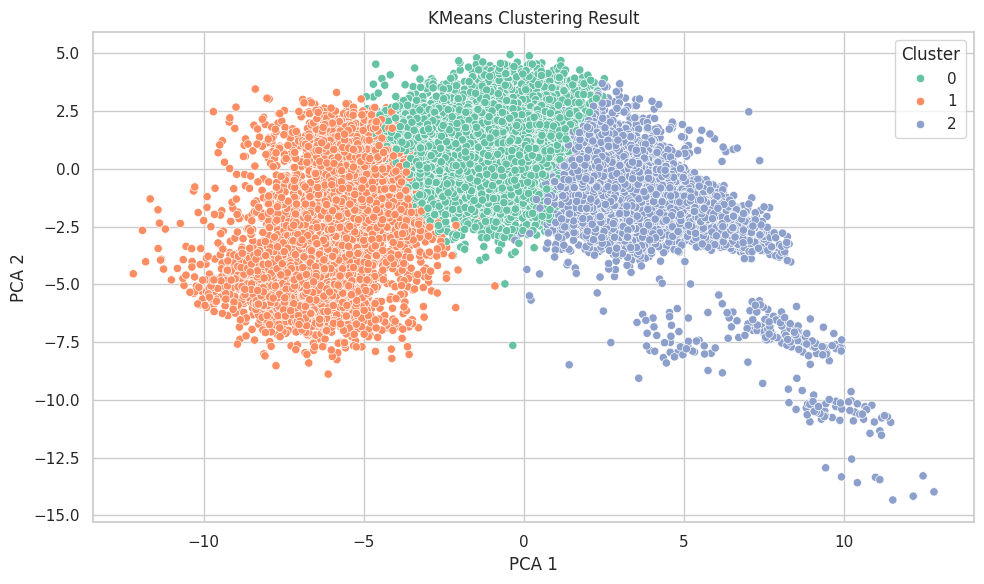

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged,
    x='pca1', y='pca2',
    hue='cluster',
    palette='Set2'
)
plt.title("KMeans Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# 1. ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏÑ†ÌÉù (cluster, Ï†ÑÌà¨Î†• Îì± Ï†úÏô∏)
drop_cols = ['cluster', 'Ï†ÑÌà¨Î†•'] if 'Ï†ÑÌà¨Î†•' in merged.columns else ['cluster']
numeric_cols = merged.select_dtypes(include='number').drop(columns=drop_cols).columns

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
cluster_means = merged.groupby('cluster')[numeric_cols].mean()

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Î∂ÑÏÇ∞ Í≥ÑÏÇ∞ ‚Üí Í∞ÄÏû• Ìé∏Ï∞® ÌÅ∞ ÌîºÏ≤ò ÏÉÅÏúÑ 50Í∞ú ÏÑ†ÌÉù
top_50_features = cluster_means.var().sort_values(ascending=False).head(50).index

# 4. Ìï¥Îãπ ÌîºÏ≤òÎì§Ïùò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∑†Í∞í ‚Üí z-score Î≥ÄÌôò
top_cluster_means = cluster_means[top_50_features]
zscore_df = top_cluster_means.apply(zscore, axis=0)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàúÏÑú Î≥ÄÍ≤Ω (1, 0, 2)
zscore_df_reordered = zscore_df.loc[[1, 0, 2]]

# Ïª¨Îüº ÏïåÌååÎ≤≥/ÌïúÍ∏Ä Ïù¥Î¶ÑÏàú Ï†ïÎ†¨
zscore_df_reordered = zscore_df_reordered[sorted(zscore_df_reordered.columns)]

# Í≤∞Í≥º ÌôïÏù∏
zscore_df_reordered.round(2)

ability_basic  ability_special  add_basic_score  add_special_score  \
cluster                                                                       
1                 1.38            -1.38            -1.26              -1.41   
0                -0.41             0.41             1.18               0.69   
2                -0.97             0.97             0.08               0.72   

         additional_potential_option_grade  artifact_basic  artifact_special  \
cluster                                                                        
1                                    -1.29           -0.57             -1.40   
0                                     0.14            1.41              0.56   
2                                     1.15           -0.84              0.85   

         base_basic_score  base_special_score  champion_badges  \
cluster                                                          
1                    0.78               -1.31            -1.40   
0                    0.63                0.18             0.55   
2                   -1.41                1.12             0.85   

         etc_basic_score  etc_special_score  exceptional_basic_score  \
cluster                                                                
1                  -0.46              -1.39                    -0.71   
0                   1.39               0.47                    -0.71   
2                  -0.93               0.92                     1.41   

         exceptional_special_score  hexa_main_basic  hexa_main_special  \
cluster                                                                  
1                            -0.71            -1.35              -0.97   
0                            -0.70             0.31              -0.40   
2                             1.41             1.04               1.38   

         hexa_sub_basic  hexa_sub_special  hyper_basic  hyper_special  level  \
cluster                                                                        
1                 -1.40             -1.10        -1.39          -1.38  -1.14   
0                  0.53             -0.22         0.90           0.42  -0.16   
2                  0.87              1.32         0.49           0.96   1.30   

         pca1  pca2  potential_option_grade  star_basic_score  \
cluster                                                         
1       -1.27 -1.25                   -1.41             -1.27   
0        0.10  1.19                    0.56              0.09   
2        1.17  0.06                    0.84              1.18   

         star_special_score  starforce  symbol_level  union_artifact_level  \
cluster                                                                      
1                     -1.26      -1.33         -1.11                 -1.32   
0                      0.08       0.26         -0.21                  0.22   
2                      1.18       1.07          1.32                  1.10   

         union_level    Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§   ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨    Ïó¨Î™Ö    Ïπ†Ìùë  
cluster                                                   
1              -1.33  0.25 -0.93 -1.37 -1.07 -1.41 -0.83  
0               0.26  1.08  1.39  0.39 -0.26  0.68 -0.58  
2               1.07 -1.33 -0.46  0.98  1.34  0.73  1.41

In [ ]:
sample = merged[merged['cluster'] == 1].sample(n=10, random_state=42)[['nickname', 'level', 'subclass', 'Í∏∞ÌÉÄ',	'Î£®ÌÉÄÎπÑÏä§',	'ÏïÑÏºÄÏù∏',	'ÏóêÌÖåÎ•¥ÎÑ¨',	'Ïó¨Î™Ö',	'Ïπ†Ìùë']]

sample

nickname  level subclass    Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨   Ïó¨Î™Ö   Ïπ†Ìùë
12547      Î≥¥ÎÅÑÏó•    280    Ïä§Ìä∏ÎùºÏù¥Ïª§  13.0   0.0  0.0   0.0  2.0  0.0
40393      Ï§ëÎ†•2    286   ÌîåÎ†àÏûÑÏúÑÏûêÎìú  11.0   2.0  1.0   1.0  0.0  0.0
33598       Î©∏Îßù    290      ÏÑÄÎèÑÏñ¥   7.0   0.0  0.0   1.0  0.0  0.0
19147       Í∑†Ï∫°    284       Ï∫°Ìã¥  20.0   3.0  0.0   1.0  0.0  0.0
22678     Î©îÎ•¥ÎîîÏïÑ    290    Î©îÎ•¥ÏÑ∏Îç∞Ïä§  11.0   3.0  0.0   1.0  0.0  2.0
24392       ÎÜîÏöî    287    Ìå®Ïä§ÌååÏù∏Îçî  17.0   3.0  2.0   1.0  1.0  0.0
29667   ÎΩÄÏãùÏù¥ÎÑ§ÏπºÎ¶¨    283       ÏπºÎ¶¨   8.0   0.0  0.0   1.0  0.0  0.0
8776      ÌåîÎùºÎîòe    285      ÌåîÎùºÎîò   9.0   0.0  0.0   1.0  0.0  0.0
44762     Î∞±Í≥ÑÎ£®ÎØ∏    282     Î£®ÎØ∏ÎÑàÏä§  21.0   2.0  1.0   0.0  0.0  0.0
2535        Îç∞Î†®    285   Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥  20.0   2.0  0.0   1.0  1.0  0.0

In [ ]:
sample = merged[merged['cluster'] == 0].sample(n=10, random_state=42)[['nickname', 'level', 'subclass', 'Í∏∞ÌÉÄ',	'Î£®ÌÉÄÎπÑÏä§',	'ÏïÑÏºÄÏù∏',	'ÏóêÌÖåÎ•¥ÎÑ¨',	'Ïó¨Î™Ö',	'Ïπ†Ìùë']]

sample

nickname  level    subclass    Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨   Ïó¨Î™Ö   Ïπ†Ìùë
36859     Ï¥àÍµ¨ÏïàÌÉÄ    288  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)  12.0   3.0  4.0   1.0  4.0  0.0
17532       ÎΩêÎΩÄ    285          ÏùÄÏõî  19.0   3.0  0.0   1.0  1.0  0.0
37921     Î¨∏ÏòàÏ∞ΩÏûë    282       Î∞∞ÌãÄÎ©îÏù¥ÏßÄ  16.0   3.0  0.0   1.0  2.0  1.0
28132     ÏÉõÎ≥ÑÎπõÎÇò    289      ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî  15.0   3.0  1.0   1.0  4.0  0.0
6705      Î¨¥ÏÉâÌè¥Ïïî    285          ÏïÑÎûÄ   8.0   3.0  4.0   1.0  2.0  6.0
292    HBÏÉ§ÌîÑÏïÑÏù¥Ï¶à    285         ÎØ∏ÌïòÏùº  15.0   0.0  3.0   5.0  0.0  1.0
12417  OSÏõêÎ¶¨ÏôÄÍµ¨Ï°∞    281       Ïä§Ìä∏ÎùºÏù¥Ïª§  12.0   3.0  5.0   0.0  4.0  0.0
43697   ÏóºÏ†ÑÎÖ∏ÏòàÏ†ïÎ†π    285          ÎùºÎùº  12.0   3.0  4.0   1.0  4.0  0.0
8254        Î∞úÍ≤¨    288         ÌåîÎùºÎîò  12.0   3.0  4.0   1.0  3.0  1.0
19646    Î≥¥ÎßàÎë•Îë•Ïù¥    290       Î≥¥Ïö∞ÎßàÏä§ÌÑ∞  14.0   3.0  4.0   1.0  2.0  0.0

In [ ]:
sample = merged[merged['cluster'] == 2].sample(n=10, random_state=42)[['nickname', 'level', 'subclass', 'Í∏∞ÌÉÄ',	'Î£®ÌÉÄÎπÑÏä§',	'ÏïÑÏºÄÏù∏',	'ÏóêÌÖåÎ•¥ÎÑ¨',	'Ïó¨Î™Ö',	'Ïπ†Ìùë']]

sample

nickname  level subclass    Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨   Ïó¨Î™Ö   Ïπ†Ìùë
33481      ÏÉõÎèóÏñ¥    290      ÏÑÄÎèÑÏñ¥   9.0   3.0  4.0   1.0  2.0  5.0
9970       ÎΩÄÌö®ÏßÄ    290       Ï†úÎ°ú  15.0   3.0  0.0   2.0  2.0  2.0
38829       ÎòêÎ°±    290       ÎπÑÏàç   5.0   0.0  3.0   5.0  2.0  9.0
7479        Ï©êÎ±å    286    Îã§ÌÅ¨ÎÇòÏù¥Ìä∏   6.0   0.0  0.0   8.0  2.0  8.0
26454       Ï£†Î¶∞    286      Ïπ¥Îç∞ÎÇò   6.0   0.0  4.0   4.0  2.0  8.0
28143      ÏïÖÌïòÎûå    289   ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî   9.0   0.0  1.0   4.0  2.0  8.0
30351       ÏùÄÌôî    292    ÎÇòÏù¥Ìä∏Î°úÎìú  15.0   3.0  0.0   1.0  2.0  3.0
9531        Î¨¥Ìçº    288      ÌûàÏñ¥Î°ú  10.0   0.0  0.0   4.0  3.0  7.0
25950       ÍøàÏÑ¨    288   ÏúàÎìúÎ∏åÎ†àÏù¥Ïª§   5.0   0.0  4.0   4.0  2.0  9.0
24601      ÎÇòÎøêÏï†    286    ÏôÄÏùºÎìúÌóåÌÑ∞  10.0   3.0  4.0   1.0  2.0  4.0

In [ ]:
# clusterÎ≥Ñ subclass Î∂ÑÌè¨ Í∞úÏàò
merged.groupby('cluster')['subclass'].value_counts().unstack(fill_value=0)

subclass  ÎÇòÏù¥Ìä∏Î°úÎìú  ÎÇòÏù¥Ìä∏ÏõåÏª§  Îã§ÌÅ¨ÎÇòÏù¥Ìä∏  Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥  Îç∞Î™¨Ïñ¥Î≤§Ï†∏  ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî   ÎùºÎùº  Î£®ÎØ∏ÎÑàÏä§  Î©îÎ•¥ÏÑ∏Îç∞Ïä§  Î©îÏπ¥Îãâ  \
cluster                                                                       
0           393    589    609     693    796     312  565   614    458  580   
1            43     94     54     105     45      29   95   114     60  214   
2           561    314    329     184    146     654  325   232    468  138   

subclass  ÎØ∏ÌïòÏùº  Î∞îÏù¥Ìçº  Î∞∞ÌãÄÎ©îÏù¥ÏßÄ  Î≥¥Ïö∞ÎßàÏä§ÌÑ∞  Î∏îÎûòÏä§ÌÑ∞   ÎπÑÏàç  ÏÑÄÎèÑÏñ¥  ÏÜåÏö∏ÎßàÏä§ÌÑ∞  Ïä§Ìä∏ÎùºÏù¥Ïª§   Ïã†Í∂Å   ÏïÑÎç∏   ÏïÑÎûÄ  \
cluster                                                                         
0         673  591    656    644   641  357  548    594    553  644  241  568   
1         169   86    146    104   223   29   58     72    263  189   37   75   
2         100  316    184    229    91  612  388    324     78  118  718  348   

subclass   ÏïÑÌÅ¨  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Î∂à,ÎèÖ)  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)   ÏóêÎ∞ò  ÏóîÏ†§Î¶≠Î≤ÑÏä§ÌÑ∞  ÏôÄÏùºÎìúÌóåÌÑ∞  ÏúàÎìúÎ∏åÎ†àÏù¥Ïª§   ÏùÄÏõî  ÏùºÎ¶¨ÏõÄ  \
cluster                                                                       
0         411         437         520  530     479    414     595  495  582   
1          44          41          30   57      54    258      53   88  192   
2         541         521         447  398     463     78     350  407  142   

subclass   Ï†úÎÖº   Ï†úÎ°ú  Ïπ¥Îç∞ÎÇò  Ïπ¥Ïù¥Ï†Ä   Ïπ¥Ïù∏   ÏπºÎ¶¨  Ï∫êÎÖºÎßàÏä§ÌÑ∞   Ï∫°Ìã¥  ÌÇ§ÎÑ§ÏãúÏä§  ÌåîÎùºÎîò  Ìå®Ïä§ÌååÏù∏Îçî   Ìå¨ÌÖÄ  \
cluster                                                                     
0         548  543  627  634  548  631    602  640   635  568    557  361   
1         103   48  113   88  104  168     91  178   191   67     61   39   
2         330  403  238  262  337  169    298  145   117  360    376  597   

subclass  ÌîåÎ†àÏûÑÏúÑÏûêÎìú   Ìò∏ÏòÅ  ÌûàÏñ¥Î°ú  
cluster                     
0            644  503  538  
1            170   67   51  
2            148  424  406

In [ ]:
# clusterÎ≥Ñ subclass ÎπÑÏú®
merged.groupby('cluster')['subclass'].value_counts(normalize=True).unstack(fill_value=0).round(3)

subclass  ÎÇòÏù¥Ìä∏Î°úÎìú  ÎÇòÏù¥Ìä∏ÏõåÏª§  Îã§ÌÅ¨ÎÇòÏù¥Ìä∏  Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥  Îç∞Î™¨Ïñ¥Î≤§Ï†∏  ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî     ÎùºÎùº   Î£®ÎØ∏ÎÑàÏä§  Î©îÎ•¥ÏÑ∏Îç∞Ïä§  \
cluster                                                                     
0         0.015  0.023  0.024   0.027  0.031   0.012  0.022  0.024  0.018   
1         0.009  0.020  0.012   0.023  0.010   0.006  0.020  0.024  0.013   
2         0.038  0.021  0.022   0.012  0.010   0.044  0.022  0.016  0.032   

subclass    Î©îÏπ¥Îãâ    ÎØ∏ÌïòÏùº    Î∞îÏù¥Ìçº  Î∞∞ÌãÄÎ©îÏù¥ÏßÄ  Î≥¥Ïö∞ÎßàÏä§ÌÑ∞   Î∏îÎûòÏä§ÌÑ∞     ÎπÑÏàç    ÏÑÄÎèÑÏñ¥  ÏÜåÏö∏ÎßàÏä§ÌÑ∞  \
cluster                                                                   
0         0.023  0.027  0.023  0.026  0.025  0.025  0.014  0.022  0.023   
1         0.046  0.036  0.018  0.031  0.022  0.048  0.006  0.012  0.015   
2         0.009  0.007  0.021  0.012  0.015  0.006  0.041  0.026  0.022   

subclass  Ïä§Ìä∏ÎùºÏù¥Ïª§     Ïã†Í∂Å     ÏïÑÎç∏     ÏïÑÎûÄ     ÏïÑÌÅ¨  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Î∂à,ÎèÖ)  ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)     ÏóêÎ∞ò  \
cluster                                                                      
0         0.022  0.025  0.010  0.022  0.016       0.017       0.021  0.021   
1         0.056  0.041  0.008  0.016  0.009       0.009       0.006  0.012   
2         0.005  0.008  0.048  0.023  0.037       0.035       0.030  0.027   

subclass  ÏóîÏ†§Î¶≠Î≤ÑÏä§ÌÑ∞  ÏôÄÏùºÎìúÌóåÌÑ∞  ÏúàÎìúÎ∏åÎ†àÏù¥Ïª§     ÏùÄÏõî    ÏùºÎ¶¨ÏõÄ     Ï†úÎÖº     Ï†úÎ°ú    Ïπ¥Îç∞ÎÇò    Ïπ¥Ïù¥Ï†Ä  \
cluster                                                                     
0          0.019  0.016   0.023  0.020  0.023  0.022  0.021  0.025  0.025   
1          0.012  0.055   0.011  0.019  0.041  0.022  0.010  0.024  0.019   
2          0.031  0.005   0.024  0.027  0.010  0.022  0.027  0.016  0.018   

subclass     Ïπ¥Ïù∏     ÏπºÎ¶¨  Ï∫êÎÖºÎßàÏä§ÌÑ∞     Ï∫°Ìã¥   ÌÇ§ÎÑ§ÏãúÏä§    ÌåîÎùºÎîò  Ìå®Ïä§ÌååÏù∏Îçî     Ìå¨ÌÖÄ  ÌîåÎ†àÏûÑÏúÑÏûêÎìú  \
cluster                                                                    
0         0.022  0.025  0.024  0.025  0.025  0.022  0.022  0.014   0.025   
1         0.022  0.036  0.020  0.038  0.041  0.014  0.013  0.008   0.036   
2         0.023  0.011  0.020  0.010  0.008  0.024  0.025  0.040   0.010   

subclass     Ìò∏ÏòÅ    ÌûàÏñ¥Î°ú  
cluster                 
0         0.020  0.021  
1         0.014  0.011  
2         0.029  0.027

### GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 1. GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû•
merged['gmm_cluster'] = gmm_labels

# 3. Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print("GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥:", gmm_silhouette)

GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥: 0.2304618565483953


In [ ]:
merged['gmm_cluster'].value_counts()

gmm_cluster
0    35162
1     9034
2      639
Name: count, dtype: int64

In [ ]:
merged.groupby('gmm_cluster').mean(numeric_only=True)

level  union_level  union_artifact_level  champion_badges  \
gmm_cluster                                                                   
0            287.616916  9303.457881             51.496445         1.000000   
1            284.909675  8926.117667             46.433584         0.349126   
2            291.602504  9586.679186             55.577465         0.998435   

             ability_special  ability_basic  symbol_level  artifact_special  \
gmm_cluster                                                                   
0                   3.000000       0.000000    178.286986        113.794039   
1                   2.725482       0.274518    168.209431         80.790015   
2                   2.857590       0.142410    193.528951        118.810642   

             artifact_basic  hyper_special  hyper_basic  hexa_main_special  \
gmm_cluster                                                                  
0                  0.695381      60.804277     7.042461          17.069791   
1                  0.696369      60.389971     6.537968          10.822116   
2                  0.674491      60.843505     6.730829          39.261346   

             hexa_main_basic  hexa_sub_special  hexa_sub_basic  \
gmm_cluster                                                      
0                   5.637393         41.558700       14.445140   
1                   3.349900         26.091875        9.566969   
2                   1.491393         66.192488        2.497653   

             potential_option_grade  additional_potential_option_grade  \
gmm_cluster                                                              
0                         75.379927                          54.046983   
1                         57.549258                          35.881337   
2                         79.251956                          76.298905   

              starforce  base_basic_score  base_special_score  \
gmm_cluster                                                     
0            308.010722      10446.845543         3363.370371   
1            206.096524      12693.130728         2541.929931   
2            389.464789       7116.619718         4852.175274   

             exceptional_basic_score  exceptional_special_score  \
gmm_cluster                                                       
0                           0.000000                   0.000000   
1                           0.000000                   0.000000   
2                         979.780908                  13.802817   

             add_basic_score  add_special_score  etc_basic_score  \
gmm_cluster                                                        
0                5402.513025         324.630851     11448.954240   
1                4740.491366         290.272305     10934.155302   
2                4511.863850         308.317684      4701.244131   

             etc_special_score  star_basic_score  star_special_score  \
gmm_cluster                                                            
0                  1037.105654       7723.093908         7456.868466   
1                   714.296546       4800.586894         4125.429046   
2                  1108.295775      11651.569640        12408.347418   

                    Í∏∞ÌÉÄ      Î£®ÌÉÄÎπÑÏä§       ÏïÑÏºÄÏù∏      ÏóêÌÖåÎ•¥ÎÑ¨        Ïó¨Î™Ö        Ïπ†Ìùë  \
gmm_cluster                                                                
0            13.290712  2.028383  1.883880  1.965389  2.228514  2.427763   
1            13.942772  1.756033  1.658844  0.964135  1.564534  0.799646   
2             5.917058  0.037559  1.682316  6.173709  1.862285  8.262911   

                      Ï†ÑÌà¨Î†•   cluster      pca1      pca2  
gmm_cluster                                              
0            1.611703e+08  0.778653  0.809572  0.259476  
1            7.352706e+07  0.623533 -3.644007 -0.682640  
2            4.600611e+08  1.996870  6.969931 -4.627094

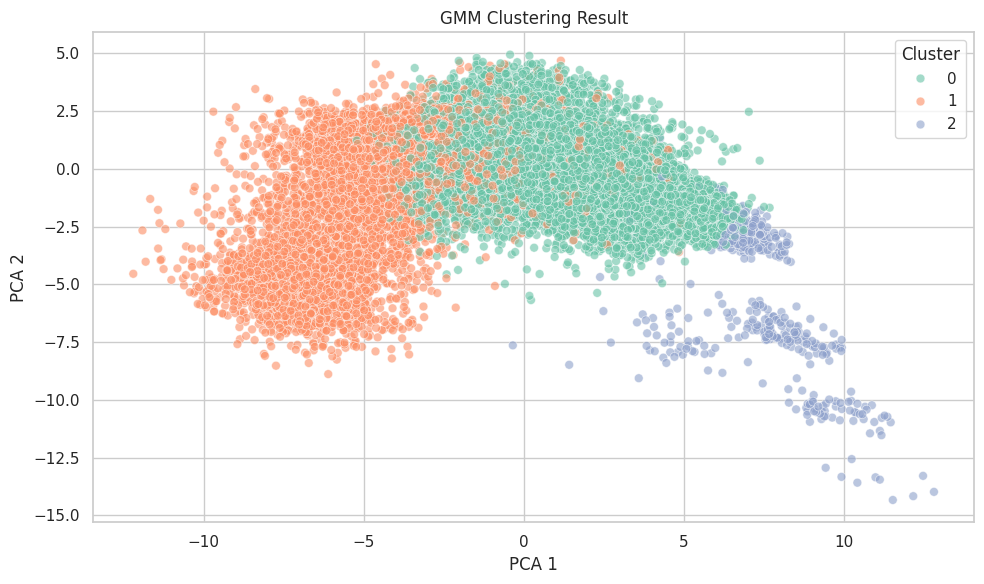

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged,
    x='pca1', y='pca2',
    hue='gmm_cluster',
    palette='Set2',
    alpha=0.6,
    s=40
)
plt.title("GMM Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

#### ÌôïÏù∏Ïö©

In [ ]:
# 1. ÌïúÍ∏Ä ‚Üí ÏòÅÏñ¥ Ïù¥Î¶Ñ Îß§Ìïë
col_name_map = {
    'level': 'Level',
    'artifact_special': 'Artifact (Special)',
    'artifact_basic': 'Artifact (Basic)',
    'hyper_special': 'Hyper (Special)',
    'hyper_basic': 'Hyper (Basic)',
    'hexa_main_special': 'Hexa Main (Special)',
    'hexa_main_basic': 'Hexa Main (Basic)',
    'hexa_sub_special': 'Hexa Sub (Special)',
    'hexa_sub_basic': 'Hexa Sub (Basic)',
    'Í∏∞ÌÉÄ': 'Etc Equip',
    'Î£®ÌÉÄÎπÑÏä§': 'Root Abyss',
    'ÏïÑÏºÄÏù∏': 'Arcane Shade',
    'ÏóêÌÖåÎ•¥ÎÑ¨': 'Eternal',
    'Ïó¨Î™Ö': 'Dawn',
    'Ïπ†Ìùë': 'Dark Boss Set'
}

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
cols_to_check = list(col_name_map.keys()) + ['Ï†ÑÌà¨Î†•']
corr_result = merged[cols_to_check].corr()['Ï†ÑÌà¨Î†•'].drop('Ï†ÑÌà¨Î†•')

# 3. Ïù¥Î¶Ñ Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•
corr_result.index = [col_name_map.get(col, col) for col in corr_result.index]
print(corr_result.sort_values(ascending=False).round(3))

Dark Boss Set          0.539
Hexa Main (Special)    0.474
Hexa Sub (Special)     0.444
Level                  0.394
Eternal                0.387
Artifact (Special)     0.334
Hexa Main (Basic)      0.066
Dawn                   0.033
Artifact (Basic)       0.032
Arcane Shade           0.025
Hyper (Basic)          0.025
Hexa Sub (Basic)       0.018
Hyper (Special)        0.011
Root Abyss            -0.097
Etc Equip             -0.322
Name: Ï†ÑÌà¨Î†•, dtype: float64


In [ ]:
# 1. ÌïúÍ∏Ä ‚Üí ÏòÅÏñ¥ Ïù¥Î¶Ñ Îß§Ìïë
col_name_map = {
    'level': 'Level',
    'Ï†ÑÌà¨Î†•': 'Power',
    'Í∏∞ÌÉÄ': 'Etc Equip',
    'Î£®ÌÉÄÎπÑÏä§': 'Root Abyss',
    'ÏïÑÏºÄÏù∏': 'Arcane Shade',
    'ÏóêÌÖåÎ•¥ÎÑ¨': 'Eternal',
    'Ïó¨Î™Ö': 'Dawn',
    'Ïπ†Ìùë': 'Dark Boss Set'
}

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
cols_to_check = list(col_name_map.keys()) + ['hexa_main_special']
corr_result = merged[cols_to_check].corr()['hexa_main_special'].drop('hexa_main_special')

# 3. Ïù¥Î¶Ñ Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•
corr_result.index = [col_name_map.get(col, col) for col in corr_result.index]
print(corr_result.sort_values(ascending=False).round(3))

Level            0.501
Power            0.474
Dark Boss Set    0.441
Eternal          0.315
Arcane Shade    -0.007
Dawn            -0.091
Root Abyss      -0.125
Etc Equip       -0.298
Name: hexa_main_special, dtype: float64


## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ + KNN

### KMeans - KNN

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# 1. ÏàòÏπòÌòï Ïª¨Îüº ÏÑ†ÌÉù
drop_cols = ['nickname', 'subclass']
numeric_cols = merged.drop(columns=drop_cols).select_dtypes(include='number').columns

# 2. feature_cols ÏÑ§Ï†ï (cluster, pca Ï†úÏô∏)
drop_cols += ['cluster', 'pca1', 'pca2']
feature_cols = [col for col in merged.columns if col in numeric_cols and col not in drop_cols]

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged[feature_cols])

# 4. KMeans ÌïôÏäµ + ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï†Îãπ
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
merged['cluster'] = kmeans.labels_

# 5. PCA ÏãúÍ∞ÅÌôîÏö©
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
merged['pca1'] = X_pca[:, 0]
merged['pca2'] = X_pca[:, 1]

# 6. Ïú†Ï†Ä Ï†ïÎ≥¥
new_user_info = {
    'level': 250,
    'symbol_level': 65,
    'starforce': 151,
    'Í∏∞ÌÉÄ': 24,
    'Î£®ÌÉÄÎπÑÏä§': 0,
    'ÏïÑÏºÄÏù∏': 0,
    'ÏóêÌÖåÎ•¥ÎÑ¨': 0,
    'Ïó¨Î™Ö': 0,
    'Ïπ†Ìùë': 0,
    'Ï†ÑÌà¨Î†•': 5181594,
    'subclass': 'ÎπÑÏàç'
}

# 7. Ïú†Ï†Ä feature Íµ¨ÏÑ±
new_user_full = {col: new_user_info.get(col, 0) for col in feature_cols}
user_df = pd.DataFrame([new_user_full])
new_scaled = scaler.transform(user_df[feature_cols])
target_subclass = new_user_info['subclass']
user_cluster = kmeans.predict(new_scaled)[0]

# 8. Ï∂îÏ≤ú ÎåÄÏÉÅ ÌïÑÌÑ∞ÎßÅ
filtered_df = merged[
    (merged['subclass'] == target_subclass) &
    (merged['cluster'] == user_cluster)
].copy()
filtered_scaled = X_scaled[
    (merged['subclass'] == target_subclass) &
    (merged['cluster'] == user_cluster)
]

# 9. KNN Ï∂îÏ≤ú
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(filtered_scaled)
distances, indices = knn.kneighbors(new_scaled)

# 10. Ï∂îÏ≤ú Í≤∞Í≥º Ï∂úÎ†•
output_columns = ['nickname', 'subclass', 'cluster'] + feature_cols
recommended_users = filtered_df.iloc[indices[0]][output_columns].copy()

pd.set_option('display.float_format', '{:.0f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

recommended_users

nickname subclass  cluster  level  union_level  union_artifact_level  champion_badges  ability_special  ability_basic  symbol_level  artifact_special  artifact_basic  hyper_special  \
38614       Î∞çÏûá       ÎπÑÏàç        1    291       9813           47                     0                2                1            178             0                 0              59       
38981   ÏÉàÎ°úÏ∫êÎ¶≠Ïù¥Î¶Ñ       ÎπÑÏàç        1    290       9445           50                     0                3                0            183             0                 0              51       
38691     Pool       ÎπÑÏàç        1    291       9229           52                     0                3                0            175             0                 0              59       
38453       ÎÉ•Ï≠ê       ÎπÑÏàç        1    291       9100           48                     1                3                0            178           105                 0              59       
38948     ÎπÑÏàçÌï†Î∞∞       ÎπÑÏàç        1    290       9111           51                     0                3                0            185             0                 0              59       

       hyper_basic  hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  potential_option_grade  additional_potential_option_grade  starforce  base_basic_score  base_special_score  \
38614          9            0                  8               32                 0              31                      22                                 65      13090              1062            
38981          6           10                  0               15                15              28                      18                                 35      12050               991            
38691          8            4                  4               24                 8              19                      15                                 42       2946               969            
38453         10           15                  0               14                11              12                      12                                 30        480               741            
38948          8           26                  0               54                 0              28                      18                                 52       4918              1135            

       exceptional_basic_score  exceptional_special_score  add_basic_score  add_special_score  etc_basic_score  etc_special_score  star_basic_score  star_special_score  Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨  Ïó¨Î™Ö  Ïπ†Ìùë  \
38614          0                        0                        293              272              12441              285               1696               830            9     0    0     1   0   1   
38981          0                        0                        200              351               6302              208                951               507            7     0    0     1   0   2   
38691          0                        0                        298              268               7593              225               1205               897            9     0    0     1   0   0   
38453          0                        0                          0              217                 32              122                876               474            3     0    0     1   0   0   
38948          0                        0                        336              309              12413              267               1400              1080            7     0    0     1   0   2   

            Ï†ÑÌà¨Î†•  
38614  32894952  
38981  25278269  
38691  24102333  
38453 100202363  
38948  23882176

In [ ]:
print("üìè Í±∞Î¶¨ Ï†ïÎ≥¥:")
for i, dist in enumerate(distances[0]):
    print(f"{i+1}Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: {dist:.6f}")

üìè Í±∞Î¶¨ Ï†ïÎ≥¥:
1Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 31.886684
2Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 31.967403
3Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.179958
4Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.336528
5Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.445612


### GMM - KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# 1. ÏàòÏπòÌòï Ïª¨Îüº ÏÑ†ÌÉù
drop_cols = ['nickname', 'subclass']
numeric_cols = merged.drop(columns=drop_cols).select_dtypes(include='number').columns
feature_cols = list(numeric_cols)

# 2. Ïä§ÏºÄÏùºÎßÅ (ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged[feature_cols])

# 3. PCAÎ°ú ÏãúÍ∞ÅÌôîÏö© Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
merged['pca1'] = X_pca[:, 0]
merged['pca2'] = X_pca[:, 1]

# 4. Ïú†Ï†Ä Ï†ïÎ≥¥
new_user_info = {
    'level': 250,
    'symbol_level': 65,
    'starforce': 151,
    'Í∏∞ÌÉÄ': 24,
    'Î£®ÌÉÄÎπÑÏä§': 0,
    'ÏïÑÏºÄÏù∏': 0,
    'ÏóêÌÖåÎ•¥ÎÑ¨': 0,
    'Ïó¨Î™Ö': 0,
    'Ïπ†Ìùë': 0,
    'Ï†ÑÌà¨Î†•': 5181594,
    'subclass': 'ÎπÑÏàç'
}

new_user_full = {col: new_user_info.get(col, 0) for col in feature_cols}
target_subclass = new_user_info['subclass']
user_df = pd.DataFrame([new_user_full])

# 5. GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
merged['gmm_cluster'] = gmm_labels

# 6. Ïú†Ï†Ä GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏°
new_scaled = scaler.transform(user_df[feature_cols])
user_gmm_cluster = gmm.predict(new_scaled)[0]

# 7. ÌïÑÌÑ∞ÎßÅ (subclass + gmm_cluster)
filtered_df = merged[
    (merged['subclass'] == target_subclass) &
    (merged['gmm_cluster'] == user_gmm_cluster)
].copy()
filtered_scaled = X_scaled[
    (merged['subclass'] == target_subclass) &
    (merged['gmm_cluster'] == user_gmm_cluster)
]

# 8. KNN Ï∂îÏ≤ú
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(filtered_scaled)
distances, indices = knn.kneighbors(new_scaled)

# 9. Í≤∞Í≥º Ï∂úÎ†•
output_columns = ['nickname', 'subclass', 'gmm_cluster'] + feature_cols
recommended_users = filtered_df.iloc[indices[0]][output_columns]

pd.set_option('display.float_format', '{:.0f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

recommended_users

nickname subclass  gmm_cluster  level  union_level  union_artifact_level  champion_badges  ability_special  ability_basic  symbol_level  artifact_special  artifact_basic  hyper_special  \
38940       ÏùÑÎπõ       ÎπÑÏàç          0      290       9029           51                     1                3                0            183           117                 0              50       
38947       Î£åÌúú       ÎπÑÏàç          0      290       9030           49                     1                2                1            187           105                 0              60       
38902       ÌïëÎ∑∞       ÎπÑÏàç          0      290       8911           50                     1                3                0            181           114                 0              55       
38501       Î≤†Î¶¨       ÎπÑÏàç          0      291       9659           51                     1                2                1            184           117                 0              55       
39017      Î©çÏàòÏïÑ       ÎπÑÏàç          0      290       9083           41                     0                3                0            186            74                 4              60       

       hyper_basic  hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  potential_option_grade  additional_potential_option_grade  starforce  base_basic_score  base_special_score  \
38940          0           13                  6               24                17              70                      43                                259       6004              3044            
38947          8           16                 10               64                30              79                      44                                261      10093              2764            
38902          5            0                  7               13                 0              64                      38                                218      22902              2858            
38501          2           23                  0               57                 0              62                      28                                171       7823              3148            
39017          6           27                  0               59                14              74                      50                                212       2983              3078            

       exceptional_basic_score  exceptional_special_score  add_basic_score  add_special_score  etc_basic_score  etc_special_score  star_basic_score  star_special_score  Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨  Ïó¨Î™Ö  Ïπ†Ìùë  \
38940          0                        0                       4992              329               4702              653               5920              4726           13     3    4     1   0   2   
38947          0                        0                       4614              269              11742              907               6010              6351           21     2    0     1   0   0   
38902          0                        0                       8140              327               5767              711               4667              4642           14     3    0     1   0   3   
38501          0                        0                       1385              365              14578              442               4315              2937           13     3    4     1   1   1   
39017          0                        0                       3831              486               9182              678               4945              5035           18     2    0     3   0   1   

           Ï†ÑÌà¨Î†•  cluster  pca1  pca2  
38940 65942909        0    -1    -1  
38947 73728323        0    -1     0  
38902 60407194        0    -3    -1  
38501 86759110        0    -2    -2  
39017 54755972        0    -2    -1

In [ ]:
# Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print("GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥:", gmm_silhouette)

GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥: 0.1826500075430714


In [ ]:
print("üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (GMM Í∏∞Î∞ò):")
for i, dist in enumerate(distances[0]):
    print(f"{i+1}Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: {dist:.6f}")

üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (GMM Í∏∞Î∞ò):
1Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.730909
2Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.785343
3Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.792688
4Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 33.038175
5Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 33.090188


### GMM - KNN ÌäúÎãù

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# 4. Ïú†Ï†Ä Ï†ïÎ≥¥
new_user_info = {
    'level': 250,
    'symbol_level': 65,
    'starforce': 151,
    'Í∏∞ÌÉÄ': 24,
    'Î£®ÌÉÄÎπÑÏä§': 0,
    'ÏïÑÏºÄÏù∏': 0,
    'ÏóêÌÖåÎ•¥ÎÑ¨': 0,
    'Ïó¨Î™Ö': 0,
    'Ïπ†Ìùë': 0,
    'Ï†ÑÌà¨Î†•': 5181594,
    'subclass': 'ÎπÑÏàç'
}

new_user_full = {col: new_user_info.get(col, 0) for col in feature_cols}
target_subclass = new_user_info['subclass']
user_df = pd.DataFrame([new_user_full])

# 5. GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ -> ÌäúÎãù
gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
merged['gmm_cluster'] = gmm_labels

# 6. Ïú†Ï†Ä GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏°
new_scaled = scaler.transform(user_df[feature_cols])
user_gmm_cluster = gmm.predict(new_scaled)[0]

# 7. ÌïÑÌÑ∞ÎßÅ (subclass + gmm_cluster)
filtered_df = merged[
    (merged['subclass'] == target_subclass) &
    (merged['gmm_cluster'] == user_gmm_cluster)
].copy()
filtered_scaled = X_scaled[
    (merged['subclass'] == target_subclass) &
    (merged['gmm_cluster'] == user_gmm_cluster)
]

# 8. KNN Ï∂îÏ≤ú
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(filtered_scaled)
distances, indices = knn.kneighbors(new_scaled)

# 9. Í≤∞Í≥º Ï∂úÎ†•
output_columns = ['nickname', 'subclass', 'gmm_cluster'] + feature_cols
recommended_users = filtered_df.iloc[indices[0]][output_columns]

pd.set_option('display.float_format', '{:.0f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

recommended_users

nickname subclass  gmm_cluster  level  union_level  union_artifact_level  champion_badges  ability_special  ability_basic  symbol_level  artifact_special  artifact_basic  hyper_special  \
38614       Î∞çÏûá       ÎπÑÏàç          1      291       9813           47                     0                2                1            178             0                 0              59       
38981   ÏÉàÎ°úÏ∫êÎ¶≠Ïù¥Î¶Ñ       ÎπÑÏàç          1      290       9445           50                     0                3                0            183             0                 0              51       
38691     Pool       ÎπÑÏàç          1      291       9229           52                     0                3                0            175             0                 0              59       
38453       ÎÉ•Ï≠ê       ÎπÑÏàç          1      291       9100           48                     1                3                0            178           105                 0              59       
38948     ÎπÑÏàçÌï†Î∞∞       ÎπÑÏàç          1      290       9111           51                     0                3                0            185             0                 0              59       

       hyper_basic  hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  potential_option_grade  additional_potential_option_grade  starforce  base_basic_score  base_special_score  \
38614          9            0                  8               32                 0              31                      22                                 65      13090              1062            
38981          6           10                  0               15                15              28                      18                                 35      12050               991            
38691          8            4                  4               24                 8              19                      15                                 42       2946               969            
38453         10           15                  0               14                11              12                      12                                 30        480               741            
38948          8           26                  0               54                 0              28                      18                                 52       4918              1135            

       exceptional_basic_score  exceptional_special_score  add_basic_score  add_special_score  etc_basic_score  etc_special_score  star_basic_score  star_special_score  Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨  Ïó¨Î™Ö  Ïπ†Ìùë  \
38614          0                        0                        293              272              12441              285               1696               830            9     0    0     1   0   1   
38981          0                        0                        200              351               6302              208                951               507            7     0    0     1   0   2   
38691          0                        0                        298              268               7593              225               1205               897            9     0    0     1   0   0   
38453          0                        0                          0              217                 32              122                876               474            3     0    0     1   0   0   
38948          0                        0                        336              309              12413              267               1400              1080            7     0    0     1   0   2   

            Ï†ÑÌà¨Î†•  cluster  pca1  pca2  
38614  32894952        1    -7    -5  
38981  25278269        1    -7    -7  
38691  24102333        1    -7    -7  
38453 100202363        1    -6    -7  
38948  23882176        1    -6    -7

In [ ]:
# Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print("GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥:", gmm_silhouette)

GMM Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥: 0.1776391007289814


In [ ]:
print("üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (GMM Í∏∞Î∞ò):")
for i, dist in enumerate(distances[0]):
    print(f"{i+1}Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: {dist:.6f}")

üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (GMM Í∏∞Î∞ò):
1Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.078100
2Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.207295
3Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.425704
4Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.590394
5Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.688177


### Ï†ÑÌà¨Î†• Íµ¨Í∞ÑÌôî - KNN

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

merged_ddff = merged.copy()

# 1. Ï†ÑÌà¨Î†• NaN Ï†úÍ±∞ ÌõÑ KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
power_values = merged_ddff[['Ï†ÑÌà¨Î†•']].dropna().values
power_kmeans = KMeans(n_clusters=3, random_state=42)
power_labels = power_kmeans.fit_predict(power_values)
merged_ddff.loc[merged_ddff['Ï†ÑÌà¨Î†•'].notna(), 'power_cluster'] = power_labels

# 2. Ï†ÑÏ≤¥ NaN Ï†úÍ±∞ ÌõÑ Ï∂îÏ≤úÏö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
merged_ddff = merged_ddff.dropna().reset_index(drop=True)

# 3. Ïä§ÏºÄÏùºÎßÅ feature Í≥†Ï†ï (ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ïÎ≥¥ Ï†úÏô∏)
drop_cols = ['nickname', 'subclass', 'gmm_cluster', 'power_cluster']
feature_cols = [col for col in merged_ddff.columns if col not in drop_cols]

# 4. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_ddff[feature_cols])

# 5. Ïú†Ï†Ä Ï†ïÎ≥¥ ÏûÖÎ†•
new_user_info = {
    'level': 250,
    'symbol_level': 65,
    'starforce': 151,
    'Í∏∞ÌÉÄ': 24,
    'Î£®ÌÉÄÎπÑÏä§': 0,
    'ÏïÑÏºÄÏù∏': 0,
    'ÏóêÌÖåÎ•¥ÎÑ¨': 0,
    'Ïó¨Î™Ö': 0,
    'Ïπ†Ìùë': 0,
    'Ï†ÑÌà¨Î†•': 5181594,
    'subclass': 'ÎπÑÏàç'
}

# 6. ÏûÖÎ†• feature Ï±ÑÏö∞Í∏∞
new_user_full = {col: new_user_info.get(col, 0) for col in feature_cols}
target_subclass = new_user_info['subclass']
target_power_cluster = power_kmeans.predict([[new_user_info['Ï†ÑÌà¨Î†•']]])[0]

# 7. user_df Î∞è Ïä§ÏºÄÏùºÎßÅ
user_df = pd.DataFrame([new_user_full])
new_scaled = scaler.transform(user_df[feature_cols])

# 8. ÌïÑÌÑ∞ÎßÅ (subclass + power_cluster)
filtered_df = merged_ddff[
    (merged_ddff['subclass'] == target_subclass) &
    (merged_ddff['power_cluster'] == target_power_cluster)
].copy()
filtered_scaled = X_scaled[
    (merged_ddff['subclass'] == target_subclass) &
    (merged_ddff['power_cluster'] == target_power_cluster)
]

# 9. KNN Ï∂îÏ≤ú
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(filtered_scaled)
distances, indices = knn.kneighbors(new_scaled)

# 10. Í≤∞Í≥º Ï∂úÎ†•
output_columns = ['nickname', 'subclass'] + feature_cols
recommended_users = filtered_df.iloc[indices[0]][output_columns].copy()

recommended_users

nickname subclass  level  union_level  union_artifact_level  champion_badges  ability_special  ability_basic  symbol_level  artifact_special  artifact_basic  hyper_special  hyper_basic  \
38614       Î∞çÏûá       ÎπÑÏàç    291       9813           47                     0                2                1            178             0                 0              59              9     
38981   ÏÉàÎ°úÏ∫êÎ¶≠Ïù¥Î¶Ñ       ÎπÑÏàç    290       9445           50                     0                3                0            183             0                 0              51              6     
38691     Pool       ÎπÑÏàç    291       9229           52                     0                3                0            175             0                 0              59              8     
38453       ÎÉ•Ï≠ê       ÎπÑÏàç    291       9100           48                     1                3                0            178           105                 0              59             10     
38948     ÎπÑÏàçÌï†Î∞∞       ÎπÑÏàç    290       9111           51                     0                3                0            185             0                 0              59              8     

       hexa_main_special  hexa_main_basic  hexa_sub_special  hexa_sub_basic  potential_option_grade  additional_potential_option_grade  starforce  base_basic_score  base_special_score  \
38614          0                  8               32                 0              31                      22                                 65      13090              1062            
38981         10                  0               15                15              28                      18                                 35      12050               991            
38691          4                  4               24                 8              19                      15                                 42       2946               969            
38453         15                  0               14                11              12                      12                                 30        480               741            
38948         26                  0               54                 0              28                      18                                 52       4918              1135            

       exceptional_basic_score  exceptional_special_score  add_basic_score  add_special_score  etc_basic_score  etc_special_score  star_basic_score  star_special_score  Í∏∞ÌÉÄ  Î£®ÌÉÄÎπÑÏä§  ÏïÑÏºÄÏù∏  ÏóêÌÖåÎ•¥ÎÑ¨  Ïó¨Î™Ö  Ïπ†Ìùë  \
38614          0                        0                        293              272              12441              285               1696               830            9     0    0     1   0   1   
38981          0                        0                        200              351               6302              208                951               507            7     0    0     1   0   2   
38691          0                        0                        298              268               7593              225               1205               897            9     0    0     1   0   0   
38453          0                        0                          0              217                 32              122                876               474            3     0    0     1   0   0   
38948          0                        0                        336              309              12413              267               1400              1080            7     0    0     1   0   2   

            Ï†ÑÌà¨Î†•  
38614  32894952  
38981  25278269  
38691  24102333  
38453 100202363  
38948  23882176

In [ ]:
print("üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (Ïú†ÏÇ¨ÎèÑ Í∏∞Ï§Ä):")
for i, dist in enumerate(distances[0]):
    print(f"{i+1}Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: {dist:.6f}")

üìè Í±∞Î¶¨ Ï†ïÎ≥¥ (Ïú†ÏÇ¨ÎèÑ Í∏∞Ï§Ä):
1Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 31.886684
2Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 31.967403
3Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.179958
4Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.336528
5Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: 32.445612


#### ÌôïÏù∏Ïö©

In [ ]:
print("ÏùºÎ¶¨ÏõÄ Ïú†Ï†Ä Ïàò:", merged[merged['subclass'] == 'ÏùºÎ¶¨ÏõÄ'].shape[0])

ÏùºÎ¶¨ÏõÄ Ïú†Ï†Ä Ïàò: 916


In [ ]:
pd.crosstab(merged['gmm_cluster'], merged_ddff['power_cluster'])

power_cluster    0.0    1.0   2.0
gmm_clu...                       
0                 17    269   353
1               8278    692    64
2              22380  10709  2073

In [ ]:
print(merged['gmm_cluster'].value_counts())
print(merged_ddff['power_cluster'].value_counts())

gmm_cluster
2    35162
1     9034
0      639
Name: count, dtype: int64
power_cluster
0.0    30675
1.0    11670
2.0     2490
Name: count, dtype: int64


## Î∂ÑÎ•òÎ™®Îç∏

In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ + Ï†ÑÏ≤¥ feature ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ + Ïû•ÎπÑ Ï†ïÎ≥¥ Í∏∞Î∞ò Î∂ÑÎ•òÎ™®Îç∏ ÎπÑÍµê

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Î∂ÑÎ•òÎ™®Îç∏Ïö© Ïû•ÎπÑ feature (potential_option_grade ~ Ïπ†Ìùë)
feature_cols = merged.loc[:, 'potential_option_grade':'Ïπ†Ìùë'].columns.tolist()
X_raw = merged[feature_cols].copy()

# 2. Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ
combat_bins = pd.qcut(merged['Ï†ÑÌà¨Î†•'], q=3, labels=False)
y = combat_bins

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© feature (Ï†ÑÌà¨Î†• Ï†úÏô∏Ìïú Î™®Îì† ÏàòÏπòÌòï)
cluster_cols = merged.select_dtypes(include='number').drop(columns='Ï†ÑÌà¨Î†•').columns.tolist()
X_cluster = merged[cluster_cols].copy()
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# 4. KMeans Íµ∞ÏßëÌôî
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# 5. Î∂ÑÎ•òÎ™®Îç∏Ïö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_clustered = X_raw.copy()
X_clustered['cluster'] = merged['cluster']

# 6. train-test Î∂ÑÌï† (cluster Ìè¨Ìï®/Ï†úÏô∏ Í∞ÅÍ∞Å)
X_train1, X_test1, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

# 7. Î™®Îç∏ ÌõàÎ†®
model1 = RandomForestClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model1.fit(X_train1, y_train)
model2.fit(X_train2, y_train)

# 8. ÏòàÏ∏° Î∞è Í≤∞Í≥º ÎπÑÍµê
print("üìä [Without Cluster Feature]")
y_pred1 = model1.predict(X_test1)
print(classification_report(y_test, y_pred1))

print("\nüìä [With Cluster Feature]")
y_pred2 = model2.predict(X_test2)
print(classification_report(y_test, y_pred2))

üìä [Without Cluster Feature]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4482
           1       0.50      0.54      0.52      4467
           2       0.67      0.65      0.66      4502

    accuracy                           0.65     13451
   macro avg       0.66      0.65      0.65     13451
weighted avg       0.66      0.65      0.65     13451


üìä [With Cluster Feature]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      4482
           1       0.51      0.54      0.53      4467
           2       0.67      0.65      0.66      4502

    accuracy                           0.65     13451
   macro avg       0.66      0.65      0.65     13451
weighted avg       0.66      0.65      0.65     13451



In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ + Ï†ÑÏ≤¥ feature ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ + Ïû•ÎπÑ Ï†ïÎ≥¥ Í∏∞Î∞ò Î∂ÑÎ•òÎ™®Îç∏ ÎπÑÍµê (ÌäúÎãù Ï†ÅÏö©)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Î∂ÑÎ•òÎ™®Îç∏Ïö© Ïû•ÎπÑ feature (potential_option_grade ~ Ïπ†Ìùë)
feature_cols = merged.loc[:, 'potential_option_grade':'Ïπ†Ìùë'].columns.tolist()
X_raw = merged[feature_cols].copy()

# 2. Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ
combat_bins = pd.qcut(merged['Ï†ÑÌà¨Î†•'], q=3, labels=False)
y = combat_bins

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© feature (Ï†ÑÌà¨Î†• Ï†úÏô∏Ìïú Î™®Îì† ÏàòÏπòÌòï)
cluster_cols = merged.select_dtypes(include='number').drop(columns='Ï†ÑÌà¨Î†•').columns.tolist()
X_cluster = merged[cluster_cols].copy()
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# 4. KMeans Íµ∞ÏßëÌôî
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# 5. Î∂ÑÎ•òÎ™®Îç∏Ïö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_clustered = X_raw.copy()
X_clustered['cluster'] = merged['cluster']

# 6. train-test Î∂ÑÌï† (cluster Ìè¨Ìï®/Ï†úÏô∏ Í∞ÅÍ∞Å)
X_train1, X_test1, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)
X_train2, X_test2, _, _ = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

# 7. Î™®Îç∏ ÌõàÎ†® (ÌäúÎãù Ï†ÅÏö©)
model1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model1.fit(X_train1, y_train)
model2.fit(X_train2, y_train)

# 8. ÏòàÏ∏° Î∞è Í≤∞Í≥º ÎπÑÍµê
print("üìä [Without Cluster Feature]")
y_pred1 = model1.predict(X_test1)
print(classification_report(y_test, y_pred1))

print("\nüìä [With Cluster Feature]")
y_pred2 = model2.predict(X_test2)
print(classification_report(y_test, y_pred2))

üìä [Without Cluster Feature]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4482
           1       0.50      0.56      0.53      4467
           2       0.68      0.65      0.66      4502

    accuracy                           0.66     13451
   macro avg       0.66      0.66      0.66     13451
weighted avg       0.66      0.66      0.66     13451


üìä [With Cluster Feature]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4482
           1       0.50      0.57      0.53      4467
           2       0.68      0.64      0.66      4502

    accuracy                           0.66     13451
   macro avg       0.67      0.66      0.66     13451
weighted avg       0.67      0.66      0.66     13451



In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ + Ï†ÑÏ≤¥ feature ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ + Ïû•ÎπÑ Ï†ïÎ≥¥ Í∏∞Î∞ò Î∂ÑÎ•òÎ™®Îç∏ ÎπÑÍµê (4Í∞ú Î™®Îç∏ ÎπÑÍµê)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Î∂ÑÎ•òÎ™®Îç∏Ïö© Ïû•ÎπÑ feature (potential_option_grade ~ Ïπ†Ìùë)
feature_cols = merged.loc[:, 'potential_option_grade':'Ïπ†Ìùë'].columns.tolist()
X_raw = merged[feature_cols].copy()

# 2. Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ (ÏÇ¨Î∂ÑÏúÑÏàò Í∏∞Ï§Ä 3Î∂ÑÌï†)
combat_bins = pd.qcut(merged['Ï†ÑÌà¨Î†•'], q=3, labels=False)
y = combat_bins

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© feature (Ï†ÑÌà¨Î†• Ï†úÏô∏Ìïú Î™®Îì† ÏàòÏπòÌòï)
cluster_cols = merged.select_dtypes(include='number').drop(columns='Ï†ÑÌà¨Î†•').columns.tolist()
X_cluster = merged[cluster_cols].copy()
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# 4. KMeans Íµ∞ÏßëÌôî
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# 5. Î∂ÑÎ•òÎ™®Îç∏Ïö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_clustered = X_raw.copy()
X_clustered['cluster'] = merged['cluster']

# 6. train-test Î∂ÑÌï† (cluster Ìè¨Ìï®)
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

# 7. Î™®Îç∏ Ï†ïÏùò
rf_model = RandomForestClassifier(random_state=42)
lgbm_model = LGBMClassifier(verbose=-1, random_state=42)
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# 8. Î™®Îç∏ ÌïôÏäµ
rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# 9. ÏòàÏ∏° Î∞è Í≤∞Í≥º ÎπÑÍµê
print("üìä [Random Forest]")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

print("\nüìä [LightGBM]")
y_pred_lgbm = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

print("\nüìä [XGBoost]")
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

print("\nüìä [CatBoost]")
y_pred_cat = cat_model.predict(X_test)
print(classification_report(y_test, y_pred_cat))

üìä [Random Forest]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      4482
           1       0.51      0.54      0.53      4467
           2       0.67      0.65      0.66      4502

    accuracy                           0.65     13451
   macro avg       0.66      0.65      0.65     13451
weighted avg       0.66      0.65      0.65     13451


üìä [LightGBM]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4482
           1       0.50      0.57      0.53      4467
           2       0.68      0.64      0.66      4502

    accuracy                           0.66     13451
   macro avg       0.67      0.66      0.66     13451
weighted avg       0.67      0.66      0.66     13451


üìä [XGBoost]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      4482
           1       0.50      0.54      0.52      4467
           2       0.

In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ + Ï†ÑÏ≤¥ feature ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ + Ïû•ÎπÑ Ï†ïÎ≥¥ Í∏∞Î∞ò LightGBM Î∂ÑÎ•òÎ™®Îç∏ (GridSearch ÌäúÎãù)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

# 1. Î∂ÑÎ•òÎ™®Îç∏Ïö© Ïû•ÎπÑ feature (potential_option_grade ~ Ïπ†Ìùë)
feature_cols = merged.loc[:, 'potential_option_grade':'Ïπ†Ìùë'].columns.tolist()
X_raw = merged[feature_cols].copy()

# 2. Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ ÎùºÎ≤®ÎßÅ (ÏÇ¨Î∂ÑÏúÑÏàò Í∏∞Ï§Ä 3Î∂ÑÌï†)
combat_bins = pd.qcut(merged['Ï†ÑÌà¨Î†•'], q=3, labels=False)
y = combat_bins

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© feature (Ï†ÑÌà¨Î†• Ï†úÏô∏Ìïú Î™®Îì† ÏàòÏπòÌòï)
cluster_cols = merged.select_dtypes(include='number').drop(columns='Ï†ÑÌà¨Î†•').columns.tolist()
X_cluster = merged[cluster_cols].copy()
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# 4. KMeans Íµ∞ÏßëÌôî
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# 5. Î∂ÑÎ•òÎ™®Îç∏Ïö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_clustered = X_raw.copy()
X_clustered['cluster'] = merged['cluster']

# 6. train-test Î∂ÑÌï† (cluster Ìè¨Ìï®)
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

# 7. LightGBM GridSearchCV Ï†ïÏùò
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 15, 20],
    'num_leaves': [31, 64, 128],
    'class_weight': ['balanced']
}

lgbm_grid = GridSearchCV(
    LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=1
)

# 8. Î™®Îç∏ ÌïôÏäµ
lgbm_grid.fit(X_train, y_train)

# 9. ÏòàÏ∏° Î∞è Í≤∞Í≥º Ï∂úÎ†•
print("\nüìä [LightGBM - GridSearch Best Model]")
y_pred_lgbm = lgbm_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

print("Best Parameters:")
print(lgbm_grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits

üìä [LightGBM - GridSearch Best Model]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4482
           1       0.50      0.57      0.53      4467
           2       0.68      0.64      0.66      4502

    accuracy                           0.66     13451
   macro avg       0.67      0.66      0.66     13451
weighted avg       0.67      0.66      0.66     13451

Best Parameters:
{'class_weight': 'balanced', 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 500, 'num_leaves': 31}


## **ÌöåÍ∑ÄÎ™®Îç∏**

In [ ]:
!pip install catboost

In [ ]:
numeric_cols = merged.select_dtypes(include='number').columns
correlation_with_power = merged[numeric_cols].corr()['Ï†ÑÌà¨Î†•'].drop('Ï†ÑÌà¨Î†•').abs().sort_values(ascending=False)
top_features = correlation_with_power.head(20)
print(top_features)

star_special_score                   0.657287
additional_potential_option_grade    0.634455
star_basic_score                     0.602970
Ïπ†Ìùë                                   0.538951
starforce                            0.526415
hexa_main_special                    0.473609
union_artifact_level                 0.450055
hexa_sub_special                     0.443555
potential_option_grade               0.436452
base_special_score                   0.435660
symbol_level                         0.434842
etc_special_score                    0.396676
level                                0.394079
ÏóêÌÖåÎ•¥ÎÑ¨                                 0.387429
artifact_special                     0.334446
Í∏∞ÌÉÄ                                   0.321882
champion_badges                      0.312047
base_basic_score                     0.269292
union_level                          0.257808
exceptional_special_score            0.227043
Name: Ï†ÑÌà¨Î†•, dtype: float64


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò ÏÉÅÏúÑ feature 20Í∞ú ÏÇ¨Ïö©)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# 1. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§Ä ÏÉÅÏúÑ 20Í∞ú feature ÏÇ¨Ïö©
top_features = [
    'star_special_score', 'additional_potential_option_grade', 'star_basic_score', 'Ïπ†Ìùë',
    'starforce', 'hexa_main_special', 'union_artifact_level', 'hexa_sub_special',
    'potential_option_grade', 'base_special_score', 'symbol_level', 'etc_special_score',
    'level', 'ÏóêÌÖåÎ•¥ÎÑ¨', 'artifact_special', 'Í∏∞ÌÉÄ',
    'champion_badges', 'base_basic_score', 'union_level', 'exceptional_special_score'
]

# 2. X, y Ï†ïÏùò
X = merged[top_features].copy()
y = merged['Ï†ÑÌà¨Î†•']

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. LightGBM ÌöåÍ∑ÄÎ™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print("üìä [LightGBM Regressor ÏÑ±Îä• ÌèâÍ∞Ä - ÏÉÅÏúÑ feature Í∏∞Î∞ò]")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R¬≤:", r2_score(y_test, y_pred))

üìä [LightGBM Regressor ÏÑ±Îä• ÌèâÍ∞Ä - ÏÉÅÏúÑ feature Í∏∞Î∞ò]
MAE: 46921938.62038661
RMSE: 70413520.19372396
R¬≤: 0.5592382322144192


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (Ï†ÑÏ≤¥ feature ÏÇ¨Ïö©)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# 1. ÏàòÏπòÌòï Ï†ÑÏ≤¥ feature ÏÇ¨Ïö© (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']

# 2. X, y Ï†ïÏùò
X = merged[feature_cols].copy()
y = merged['Ï†ÑÌà¨Î†•']

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. LightGBM ÌöåÍ∑ÄÎ™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print("üìä [LightGBM Regressor ÏÑ±Îä• ÌèâÍ∞Ä - Ï†ÑÏ≤¥ feature Í∏∞Î∞ò]")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R¬≤:", r2_score(y_test, y_pred))

üìä [LightGBM Regressor ÏÑ±Îä• ÌèâÍ∞Ä - Ï†ÑÏ≤¥ feature Í∏∞Î∞ò]
MAE: 46706096.67151324
RMSE: 70161073.50401208
R¬≤: 0.562393006703068


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (XGBoost & CatBoost ÎπÑÍµê)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# 1. ÏàòÏπòÌòï Ï†ÑÏ≤¥ feature ÏÇ¨Ïö© (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']

# 2. X, y Ï†ïÏùò
X = merged[feature_cols].copy()
y = merged['Ï†ÑÌà¨Î†•']

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. XGBoost ÌöåÍ∑ÄÎ™®Îç∏
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("üìä [XGBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R¬≤:", r2_score(y_test, y_pred_xgb))

# 5. CatBoost ÌöåÍ∑ÄÎ™®Îç∏
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("\nüìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]")
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("R¬≤:", r2_score(y_test, y_pred_cat))

üìä [XGBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 47620366.183892
RMSE: 72917196.51111054
R¬≤: 0.5273368678958457

üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 46753477.977053955
RMSE: 70076526.5730197
R¬≤: 0.5634470394929464


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (Log Î≥ÄÌôò Ï†ÅÏö© - XGBoost & CatBoost ÎπÑÍµê)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# 1. ÏàòÏπòÌòï Ï†ÑÏ≤¥ feature ÏÇ¨Ïö© (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']

# 2. X, y Ï†ïÏùò (log Î≥ÄÌôò Ï†ÅÏö©)
X = merged[feature_cols].copy()
y_log = np.log1p(merged['Ï†ÑÌà¨Î†•'])

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train_log, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

# 4. XGBoost ÌöåÍ∑ÄÎ™®Îç∏ (Î°úÍ∑∏ ÏòàÏ∏° ÌõÑ Ïó≠Î≥ÄÌôò)
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train_log)
y_pred_log_xgb = xgb_model.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)  # Ïó≠Î≥ÄÌôò

y_true = np.expm1(y_test)  # ÌÖåÏä§Ìä∏ÏÖãÎèÑ Ïó≠Î≥ÄÌôò

print("üìä [XGBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]")
print("MAE:", mean_absolute_error(y_true, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_xgb)))
print("R¬≤:", r2_score(y_true, y_pred_xgb))

# 5. CatBoost ÌöåÍ∑ÄÎ™®Îç∏
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train_log)
y_pred_log_cat = cat_model.predict(X_test)
y_pred_cat = np.expm1(y_pred_log_cat)

print("\nüìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]")
print("MAE:", mean_absolute_error(y_true, y_pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_cat)))
print("R¬≤:", r2_score(y_true, y_pred_cat))

üìä [XGBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]
MAE: 45187499.09724433
RMSE: 72398684.68267225
R¬≤: 0.5340351517987014

üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]
MAE: 44730120.36644443
RMSE: 71501640.1848268
R¬≤: 0.5455105447014704


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (Log Î≥ÄÌôò Ï†ÅÏö© - LightGBM, RandomForest ÎπÑÍµê)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

# 1. ÏàòÏπòÌòï Ï†ÑÏ≤¥ feature ÏÇ¨Ïö© (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']

# 2. X, y Ï†ïÏùò (log Î≥ÄÌôò Ï†ÅÏö©)
X = merged[feature_cols].copy()
y_log = np.log1p(merged['Ï†ÑÌà¨Î†•'])

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train_log, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

# 4. Ïó≠Î≥ÄÌôò ÎåÄÏÉÅ Ï§ÄÎπÑ
y_true = np.expm1(y_test)

# 5. LightGBM ÌöåÍ∑ÄÎ™®Îç∏
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train_log)
y_pred_lgbm = np.expm1(lgbm_model.predict(X_test))

print("üìä [LightGBM ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]")
print("MAE:", mean_absolute_error(y_true, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_lgbm)))
print("R¬≤:", r2_score(y_true, y_pred_lgbm))

# 6. RandomForest ÌöåÍ∑ÄÎ™®Îç∏
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train_log)
y_pred_rf = np.expm1(rf_model.predict(X_test))

print("\nüìä [RandomForest ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]")
print("MAE:", mean_absolute_error(y_true, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_rf)))
print("R¬≤:", r2_score(y_true, y_pred_rf))

üìä [LightGBM ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]
MAE: 45073565.426752865
RMSE: 72098027.55804722
R¬≤: 0.5378972318231515

üìä [RandomForest ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - log Î≥ÄÌôò]
MAE: 45626796.189992145
RMSE: 72426429.09732586
R¬≤: 0.5336779519650411


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (CatBoost + subclass ÏõêÌï´ Ïù∏ÏΩîÎî©)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# 1. ÏàòÏπòÌòï + subclass Ìè¨Ìï® (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']

# subclass ÏõêÌï´ Ïù∏ÏΩîÎî© Ï∂îÍ∞Ä
categorical_cols = ['subclass']
encoded = pd.get_dummies(merged[categorical_cols], drop_first=True)
X = pd.concat([merged[feature_cols], encoded], axis=1)

# 2. Ï†ÑÌà¨Î†• ÏÇ¨Ïö© (log Î≥ÄÌôò ÏóÜÏù¥)
y = merged['Ï†ÑÌà¨Î†•']

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÌïôÏäµ (ÌäúÎãù ÏóÜÏù¥)
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print("üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - subclass Ìè¨Ìï®]")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R¬≤:", r2_score(y_test, y_pred))

üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - subclass Ìè¨Ìï®]
MAE: 46804353.393482685
RMSE: 70340447.86547546
R¬≤: 0.560152567321264


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ (CatBoost + GridSearch ÌäúÎãù)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# 1. ÏàòÏπòÌòï featureÎßå ÏÇ¨Ïö© (Ï†ÑÌà¨Î†• Ï†úÏô∏)
numeric_cols = merged.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']
X = merged[feature_cols].copy()

# 2. Ï†ÑÌà¨Î†• ÏÇ¨Ïö© (log Î≥ÄÌôò ÏóÜÏù¥)
y = merged['Ï†ÑÌà¨Î†•']

# 3. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. CatBoost GridSearch ÌäúÎãù ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

model = CatBoostRegressor(verbose=0, random_state=42)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 5. ÌïôÏäµ Î∞è ÏòàÏ∏°
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 6. ÌèâÍ∞Ä
print("üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - ÌäúÎãù Ìè¨Ìï®, subclass Ï†úÏô∏]")
print("Best Params:", grid.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R¬≤:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
üìä [CatBoost ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä - ÌäúÎãù Ìè¨Ìï®, subclass Ï†úÏô∏]
Best Params: {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
MAE: 46904045.379601605
RMSE: 69941876.7262079
R¬≤: 0.5651230733504344


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï (Forward Selection with RandomForest)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (merged Í∏∞Ï§Ä, ÏàòÏπòÌòïÎßå ÏÇ¨Ïö©)
merged_clean = merged.dropna().reset_index(drop=True)
X = merged_clean.drop(columns=['Ï†ÑÌà¨Î†•']).select_dtypes(include='number')
y = merged_clean['Ï†ÑÌà¨Î†•']

# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Î™®Îç∏ Ï†ïÏùò
model = RandomForestRegressor(random_state=42)

# 4. Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï Ï†ÅÏö© (10Í∞ú feature ÏÑ†ÌÉù)
selector = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward', scoring='r2', cv=3)
selector.fit(X_train, y_train)

# 5. ÏÑ†ÌÉùÎêú featureÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
selected_features = X.columns[selector.get_support()]
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

# 6. ÌèâÍ∞Ä
print("ÏÑ†ÌÉùÎêú feature:", list(selected_features))
print("R¬≤:", r2_score(y_test, y_pred))

ÏÑ†ÌÉùÎêú feature: ['champion_badges', 'ability_special', 'ability_basic', 'artifact_basic', 'additional_potential_option_grade', 'exceptional_basic_score', 'exceptional_special_score', 'star_special_score', 'Ïó¨Î™Ö', 'Ïπ†Ìùë']
R¬≤: 0.4352188877374884


In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌõÑÏßÑ Ï†úÍ±∞Î≤ï (Backward Elimination with RandomForest) -> ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ pass

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (merged Í∏∞Ï§Ä, ÏàòÏπòÌòïÎßå ÏÇ¨Ïö©)
merged_clean = merged.dropna().reset_index(drop=True)
X = merged_clean.drop(columns=['Ï†ÑÌà¨Î†•']).select_dtypes(include='number')
y = merged_clean['Ï†ÑÌà¨Î†•']

# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Î™®Îç∏ Ï†ïÏùò
model = RandomForestRegressor(random_state=42)

# 4. ÌõÑÏßÑ Ï†úÍ±∞Î≤ï Ï†ÅÏö© (10Í∞ú feature ÏÑ†ÌÉù)
selector = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward', scoring='r2', cv=3)
selector.fit(X_train, y_train)

# 5. ÏÑ†ÌÉùÎêú featureÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
selected_features = X.columns[selector.get_support()]
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

# 6. ÌèâÍ∞Ä
print("ÏÑ†ÌÉùÎêú feature:", list(selected_features))
print("R¬≤:", r2_score(y_test, y_pred))

KeyboardInterrupt: 

#### item_excluded Ï†úÏô∏

In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏòàÏ∏° ÌöåÍ∑ÄÎ™®Îç∏ ÎπÑÍµê

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ± (final_df Í∏∞Ï§Ä, Í≤∞Ï∏°Ïπò Ï†úÍ±∞)
final_df = final_df.dropna().reset_index(drop=True)
numeric_cols = final_df.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Ï†ÑÌà¨Î†•']
X = final_df[feature_cols].copy()
y = final_df['Ï†ÑÌà¨Î†•']

# 2. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Î™®Îç∏ Ï†ïÏùò (Í∏∞Î≥∏ ÏÑ§Ï†ï)
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1)
}

# 4. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nüìä [{name} ÏÑ±Îä• ÌèâÍ∞Ä]")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R¬≤:", r2_score(y_test, y_pred))


üìä [RandomForest ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 48861888.29842045
RMSE: 71593671.77025759
R¬≤: 0.5229738631112466

üìä [CatBoost ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 48269956.0243975
RMSE: 71491552.05686933
R¬≤: 0.5243337327483806

üìä [LightGBM ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 48169301.968914784
RMSE: 71318729.24122012
R¬≤: 0.5266306928612015

üìä [XGBoost ÏÑ±Îä• ÌèâÍ∞Ä]
MAE: 49203973.89429257
RMSE: 74826648.50310104
R¬≤: 0.4789186979054888


### ÏãúÎÆ¨Î†àÏù¥ÏÖò

In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• ÏÉÅÏäπ ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ + Ïã§Ï†ú Ï†ÑÌà¨Î†• ÎπÑÍµê + Ïú†ÏÇ¨ Ïú†Ï†Ä ÌÉêÏÉâ Í∏∞Îä• Ìè¨Ìï®

import requests
import pandas as pd

# üîπ API ÌÇ§ Î∞è Ìó§Îçî ÏÑ§Ï†ï
token = "test_4bb9fe2d9c5f88d6d4d0fae33b021fd4cf424efe26141bea07f0aec9e4c3e272efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": token}

# üîπ Ïû•ÎπÑ ÏÑ∏Ìä∏ ÌÇ§ÏõåÎìú Ï†ïÏùò
set_keywords = {
    'Î£®ÌÉÄÎπÑÏä§': ['Ïù¥Í∏ÄÏïÑÏù¥', 'Ìä∏Î¶≠Ïä§ÌÑ∞', 'ÌïòÏù¥ÎÑ§Ïä§', 'ÌååÌîÑÎãàÎ•¥', 'Î£®ÌÉÄÎπÑÏä§'],
    'ÏïÑÏºÄÏù∏': ['ÏïÑÏºÄÏù∏'],
    'ÏóêÌÖåÎ•¥ÎÑ¨': ['ÏóêÌÖåÎ•¥ÎÑ¨', 'Ï†úÎÑ§ÏãúÏä§', 'Îç∞Ïä§Ìã∞Îãà'],
    'Ïπ†Ìùë': ['Î£®Ï¶à Ïª®Ìä∏Î°§ Î®∏Ïã† ÎßàÌÅ¨', 'ÎßàÎ†•Ïù¥ ÍπÉÎì† ÏïàÎåÄ', 'Î∏îÎûô ÌïòÌä∏', 'Ïª¥ÌîåÎ¶¨Ìä∏ Ïñ∏ÎçîÏª®Ìä∏Î°§', 'Î™ΩÌôòÏùò Î≤®Ìä∏',
           'Í≥†ÌÜµÏùò Í∑ºÏõê', 'Ï∞ΩÏÑ∏Ïùò Î±ÉÏßÄ', 'Ïª§Îß®Îçî Ìè¨Ïä§ Ïù¥Ïñ¥ÎßÅ', 'Í±∞ÎåÄÌïú Í≥µÌè¨', 'Ï†ÄÏ£ºÎ∞õÏùÄ ÎßàÎèÑÏÑú', 'ÎØ∏Ìä∏ÎùºÏùò Î∂ÑÎÖ∏'],
    'Ïó¨Î™Ö': ['Ìä∏ÏôÄÏùºÎùºÏù¥Ìä∏ ÎßàÌÅ¨', 'ÏóêÏä§ÌÖîÎùº Ïù¥Ïñ¥ÎßÅ', 'Îç∞Ïù¥Î∏åÎ†àÏù¥ÌÅ¨ ÌéúÎçòÌä∏', 'Ïó¨Î™ÖÏùò Í∞ÄÎîîÏñ∏ ÏóîÏ†§ ÎßÅ']
}

# üîπ ÏÑ∏Ìä∏ Î∂ÑÎ•ò Ìï®Ïàò
def classify_item_set(name):
    for set_name, keywords in set_keywords.items():
        for kw in keywords:
            if kw in str(name):
                return set_name
    return 'Í∏∞ÌÉÄ'

# üîπ ocid Ï°∞Ìöå Ìï®Ïàò
def fetch_ocid(nickname):
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={nickname}"
    res = requests.get(url, headers=headers)
    return res.json().get("ocid")

# üîπ Ïû•ÎπÑ Ï†ïÎ≥¥ ÏöîÏïΩ Ï∂îÏ∂ú Ìï®Ïàò
def fetch_equipment_summary(ocid):
    url = f"https://open.api.nexon.com/maplestory/v1/character/item-equipment?ocid={ocid}"
    res = requests.get(url, headers=headers)
    item_data = res.json()
    preset_items = item_data.get("item_equipment_preset_1", [])
    df = pd.DataFrame(preset_items)

    if df.empty:
        return {"starforce": 0, 'Í∏∞ÌÉÄ': 0, 'Î£®ÌÉÄÎπÑÏä§': 0, 'ÏïÑÏºÄÏù∏': 0, 'ÏóêÌÖåÎ•¥ÎÑ¨': 0, 'Ïπ†Ìùë': 0, 'Ïó¨Î™Ö': 0}

    df['equipment_set'] = df['item_name'].apply(classify_item_set)
    df['starforce'] = pd.to_numeric(df['starforce'], errors='coerce')
    starforce_sum = df['starforce'].fillna(0).sum()
    set_counts = df['equipment_set'].value_counts().to_dict()
    set_counts['starforce'] = int(starforce_sum)
    for key in ['Í∏∞ÌÉÄ', 'Î£®ÌÉÄÎπÑÏä§', 'ÏïÑÏºÄÏù∏', 'ÏóêÌÖåÎ•¥ÎÑ¨', 'Ïπ†Ìùë', 'Ïó¨Î™Ö']:
        set_counts.setdefault(key, 0)
    return set_counts

# üîπ Ï†ÑÌà¨Î†• ÏòàÏ∏° Ìï®Ïàò (CatBoost Î™®Îç∏ Í∏∞Î∞ò)
def predict_power(user_feature_dict):
    input_df = pd.DataFrame([user_feature_dict])
    input_df = input_df.reindex(columns=feature_cols, fill_value=0)
    return best_model.predict(input_df)[0]

# üîπ Ïã§Ï†ú Ï†ÑÌà¨Î†• Ï°∞Ìöå Ìï®Ïàò
def fetch_actual_combat_power(ocid):
    url = f"https://open.api.nexon.com/maplestory/v1/character/stat?ocid={ocid}"
    res = requests.get(url, headers=headers)
    stat_data = res.json().get("final_stat", [])
    for stat in stat_data:
        if stat.get("stat_name") == "Ï†ÑÌà¨Î†•":
            return int(stat.get("stat_value", 0))
    return None

# üîπ Ïú†ÏÇ¨ Ïú†Ï†Ä ÌÉêÏÉâ Ìï®Ïàò (merged DataFrameÏóêÏÑú Í≤ÄÏÉâ)
def find_similar_users(predicted_power, margin=200000):
    low = predicted_power - margin
    high = predicted_power + margin
    nearby = merged[(merged['Ï†ÑÌà¨Î†•'] >= low) & (merged['Ï†ÑÌà¨Î†•'] <= high)]
    return nearby[['nickname', 'level', 'subclass', 'Ï†ÑÌà¨Î†•']].sort_values(by='Ï†ÑÌà¨Î†•')

# üîπ ÏÇ¨Ïö©Ïûê Ïù∏ÌÑ∞ÎûôÏÖò Í∏∞Î∞ò Ïã§Ìñâ Ìï®Ïàò
def run_simulation():
    nickname = input("üîç ÎãâÎÑ§ÏûÑÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: ")
    ocid = fetch_ocid(nickname)
    equip_stats = fetch_equipment_summary(ocid)

    print("\nüì¶ ÌòÑÏû¨ Ï∞©Ïö© ÏÑ∏Ìä∏")
    for k, v in equip_stats.items():
        print(f"{k}: {v}")

    print("\n‚ûï Ï∂îÍ∞ÄÌï† ÏÑ∏Ìä∏ ÏàòÎ•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî (ÏûÖÎ†•ÌïòÏßÄ ÏïäÏúºÎ©¥ 0ÏúºÎ°ú Ï≤òÎ¶¨Îê©ÎãàÎã§)")
    added_equips = {}
    for k in ['Í∏∞ÌÉÄ', 'Î£®ÌÉÄÎπÑÏä§', 'ÏïÑÏºÄÏù∏', 'ÏóêÌÖåÎ•¥ÎÑ¨', 'Ïπ†Ìùë', 'Ïó¨Î™Ö']:
        try:
            val = int(input(f"{k} Ï∂îÍ∞Ä Ïàò: ") or 0)
        except:
            val = 0
        added_equips[k] = val

    try:
        val = int(input("Ï∂îÍ∞ÄÌï† Ïä§ÌÉÄÌè¨Ïä§ Ïàò: ") or 0)
    except:
        val = 0
    added_equips['starforce'] = val

    # ÏòàÏ∏° Î∞è Ïã§Ï†úÍ∞í Ï°∞Ìöå
    before = predict_power(equip_stats)
    actual = fetch_actual_combat_power(ocid)
    updated = equip_stats.copy()
    for k, v in added_equips.items():
        updated[k] = int(updated.get(k, 0)) + int(v)
    after = predict_power(updated)

    print("\nüìå ÌòÑÏû¨ Ï†ÑÌà¨Î†• (ÏòàÏ∏°Í∞í):", int(before))
    if actual:
        print("üéØ ÌòÑÏû¨ Ï†ÑÌà¨Î†• (Ïã§Ï†úÍ∞í):", actual)
    print("üõ† Î≥ÄÍ≤Ω ÌõÑ Ï†ÑÌà¨Î†•:", int(after))
    print("üìà Ï†ÑÌà¨Î†• ÏÉÅÏäπÎüâ:", f"{int(after - before):+}")

    print("\nüë• ÎÇòÏôÄ Ïú†ÏÇ¨Ìïú Ï†ÑÌà¨Î†•ÏùÑ Í∞ÄÏßÑ Ïú†Ï†Ä:")
    similar = find_similar_users(after)
    print(similar.head(5).to_string(index=False))

# Ïã§Ìñâ
run_simulation()

üîç ÎãâÎÑ§ÏûÑÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: ÎπÑÎîúÎü¨

üì¶ ÌòÑÏû¨ Ï∞©Ïö© ÏÑ∏Ìä∏
Í∏∞ÌÉÄ: 16
starforce: 122
Î£®ÌÉÄÎπÑÏä§: 0
ÏïÑÏºÄÏù∏: 0
ÏóêÌÖåÎ•¥ÎÑ¨: 0
Ïπ†Ìùë: 0
Ïó¨Î™Ö: 0

‚ûï Ï∂îÍ∞ÄÌï† ÏÑ∏Ìä∏ ÏàòÎ•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî (ÏûÖÎ†•ÌïòÏßÄ ÏïäÏúºÎ©¥ 0ÏúºÎ°ú Ï≤òÎ¶¨Îê©ÎãàÎã§)
Í∏∞ÌÉÄ Ï∂îÍ∞Ä Ïàò: 0
Î£®ÌÉÄÎπÑÏä§ Ï∂îÍ∞Ä Ïàò: 0
ÏïÑÏºÄÏù∏ Ï∂îÍ∞Ä Ïàò: 4
ÏóêÌÖåÎ•¥ÎÑ¨ Ï∂îÍ∞Ä Ïàò: 0
Ïπ†Ìùë Ï∂îÍ∞Ä Ïàò: 0
Ïó¨Î™Ö Ï∂îÍ∞Ä Ïàò: 0
Ï∂îÍ∞ÄÌï† Ïä§ÌÉÄÌè¨Ïä§ Ïàò: 0

üìå ÌòÑÏû¨ Ï†ÑÌà¨Î†• (ÏòàÏ∏°Í∞í): 7001327
üéØ ÌòÑÏû¨ Ï†ÑÌà¨Î†• (Ïã§Ï†úÍ∞í): 900845
üõ† Î≥ÄÍ≤Ω ÌõÑ Ï†ÑÌà¨Î†•: 8837640
üìà Ï†ÑÌà¨Î†• ÏÉÅÏäπÎüâ: +1836313

üë• ÎÇòÏôÄ Ïú†ÏÇ¨Ìïú Ï†ÑÌà¨Î†•ÏùÑ Í∞ÄÏßÑ Ïú†Ï†Ä:
nickname  level subclass       Ï†ÑÌà¨Î†•
      Ï©°Î≤å    282   Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥ 8645032.0
     Í∞ÅÏñºÏùå    280       Ïã†Í∂Å 8705490.0
    Ï°¥Î†àÏä§ÌÑ∞    281     ÌÇ§ÎÑ§ÏãúÏä§ 8773461.0
     Ïö±ÎûÄÏûâ    285       ÏïÑÎûÄ 8911696.0
      Ï•êÎãò    281       Ï∫°Ìã¥ 8929111.0


# KNN Í∏∞Î∞ò Ï∂îÏ≤ú

In [ ]:
# ‚úÖ Ï†ÑÌà¨Î†• Í∏∞Î∞ò ÏÉÅÏúÑ Ïú†Ï†Ä ÏÑ∏ÌåÖ Ï∂îÏ≤ú (KNN Í∏∞Î∞ò)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. feature Íµ¨ÏÑ±: Ïû•ÎπÑ + Ïä§ÌÉØ + ÏÑ±Ïû• Í¥ÄÎ†® ÏöîÏÜå
equip_cols = merged.loc[:, 'potential_option_grade':'Ïπ†Ìùë'].columns.tolist()
stat_cols = [
    'symbol_level', 'hyper_special', 'hyper_basic',
    'ability_special', 'ability_basic',
    'union_level', 'artifact_special', 'artifact_basic',
    'starforce', 'base_special_score', 'add_special_score', 'etc_special_score'
]
feature_cols = list(dict.fromkeys(equip_cols + stat_cols))  # Ï§ëÎ≥µ Ï†úÍ±∞

# 2. Í∏∞Ï§Ä Ïú†Ï†Ä ÏûÖÎ†•Í∞í ÏòàÏãú (Ïã§Ï†ú streamlitÏóêÏÑúÎäî ÏÇ¨Ïö©Ïûê ÏûÖÎ†•Í∞íÏúºÎ°ú ÎåÄÏ≤¥)
new_user_info = {
    'level': 260,
    'symbol_level': 65,
    'hyper_special': 55,
    'hyper_basic': 5,
    'ability_special': 3,
    'ability_basic': 0,
    'union_level': 8000,
    'artifact_special': 50,
    'artifact_basic': 0,
    'starforce': 220,
    'base_special_score': 4000,
    'add_special_score': 3000,
    'etc_special_score': 2000,
    'potential_option_grade': 3,
    'additional_potential_option_grade': 2,
    'Í∏∞ÌÉÄ': 21,
    'Î£®ÌÉÄÎπÑÏä§': 1,
    'ÏïÑÏºÄÏù∏': 3,
    'ÏóêÌÖåÎ•¥ÎÑ¨': 0,
    'Ïó¨Î™Ö': 2,
    'Ïπ†Ìùë': 2,
    'Ï†ÑÌà¨Î†•': 5000000
}

# 3. Ï∂îÏ≤ú ÎåÄÏÉÅ: ÌòÑÏû¨ Ïú†Ï†ÄÎ≥¥Îã§ Ï†ÑÌà¨Î†•Ïù¥ ÎÜíÏùÄ Ïú†Ï†ÄÎßå ÌïÑÌÑ∞
filtered = merged[merged['Ï†ÑÌà¨Î†•'] > new_user_info['Ï†ÑÌà¨Î†•']].copy()

# 4. Ïä§ÏºÄÏùºÎßÅ Ï§ÄÎπÑ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered[feature_cols])

# 5. ÏûÖÎ†• Ïú†Ï†Ä Î≤°ÌÑ∞ Ï§ÄÎπÑ
new_user_vector = pd.DataFrame([{col: new_user_info.get(col, 0) for col in feature_cols}])
new_scaled = scaler.transform(new_user_vector)

# 6. KNN ÌïôÏäµ Î∞è Ï∂îÏ≤ú
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_scaled)
distances, indices = knn.kneighbors(new_scaled)

# 7. Ï∂îÏ≤ú Í≤∞Í≥º
recommended_users = filtered.iloc[indices[0]].copy()
print("\nüîç Ï∂îÏ≤úÎêú ÏÉÅÏúÑ Ïú†Ï†Ä ÏÑ∏ÌåÖ:")
print(recommended_users[['nickname', 'level', 'Ï†ÑÌà¨Î†•'] + feature_cols])

print("\nüìè Í±∞Î¶¨ Ï†ïÎ≥¥:")
for i, dist in enumerate(distances[0]):
    print(f"{i+1}Î≤àÏß∏ Ïú†Ï†ÄÏôÄÏùò Í±∞Î¶¨: {dist:.2f}")


üîç Ï∂îÏ≤úÎêú ÏÉÅÏúÑ Ïú†Ï†Ä ÏÑ∏ÌåÖ:
       nickname  level          Ï†ÑÌà¨Î†•  potential_option_grade  \
43747      ÎùºÎ∂ïÏù¥o    285   24130667.0                    31.0   
10138  Dackness    289  152390782.0                    79.0   
9867        Ï∞¨Ïù¥Î∞§    292  104395074.0                    80.0   
14284       Î∂ÄÏóâÏûÑ    281   23269671.0                    39.0   
542          ÏΩîÏãú    282   56244971.0                    69.0   

       additional_potential_option_grade  starforce  base_basic_score  \
43747                               19.0       73.0           15774.0   
10138                               44.0      290.0           13306.0   
9867                                39.0      276.0            4860.0   
14284                               16.0       95.0           13282.0   
542                                 43.0      296.0            7892.0   

       base_special_score  exceptional_basic_score  exceptional_special_score  \
43747              3407.0          